# Coby White Analysis - FINAL (ANALYSIS)

# PACKAGE SET-UP

In [4]:
pip install nba_api pandas

Note: you may need to restart the kernel to use updated packages.


In [479]:
# Import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import time
import random
import requests
import re
from concurrent.futures import ThreadPoolExecutor, as_completed
from scipy.stats import percentileofscore
from matplotlib.patches import Patch

# ANALYSIS

In [7]:
os.getcwd()

'C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis'

## I. Game Logs

### ALL PLAYER GAME LOGS:

##### *Data Set-Up*

In [11]:
all_players_game_log_24_25 = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_game_log_24_25.csv")
all_players_game_log_24_25

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER_ID,FULL_NAME
0,22024,1630173,22401188,13-Apr-25,NYK @ BKN,W,33,8,18,0.444,...,2,2,0,2,4,18,19,2,1630173,Precious Achiuwa
1,22024,1630173,22401175,11-Apr-25,NYK vs. CLE,L,15,0,5,0.000,...,0,2,1,1,2,0,-9,2,1630173,Precious Achiuwa
2,22024,1630173,22401167,10-Apr-25,NYK @ DET,L,40,8,13,0.615,...,3,2,3,0,3,18,-7,1,1630173,Precious Achiuwa
3,22024,1630173,22401128,5-Apr-25,NYK @ ATL,W,25,3,8,0.375,...,0,0,2,1,2,6,-10,1,1630173,Precious Achiuwa
4,22024,1630173,22401103,2-Apr-25,NYK @ CLE,L,21,5,9,0.556,...,1,1,2,0,1,13,-10,1,1630173,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24960,22024,203967,22400139,1-Nov-24,DEN @ MIN,L,5,0,3,0.000,...,0,0,0,0,0,0,-11,1,203967,Dario Šarić
24961,22024,203967,22400113,29-Oct-24,DEN @ BKN,W,12,1,2,0.500,...,0,0,0,0,0,3,-3,1,203967,Dario Šarić
24962,22024,203967,22400107,28-Oct-24,DEN @ TOR,W,5,0,3,0.000,...,1,0,0,2,0,0,-9,1,203967,Dario Šarić
24963,22024,203967,22400087,26-Oct-24,DEN vs. LAC,L,11,0,2,0.000,...,0,0,0,0,2,0,-12,1,203967,Dario Šarić


In [12]:
all_players_game_log_24_25.shape[0]

24965

In [13]:
all_players_game_log_23_24 = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_game_log_23_24.csv")
all_players_game_log_23_24

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER_ID,FULL_NAME
0,22023,1630173,22301190,"APR 14, 2024",NYK vs. CHI,W,19,2,3,0.667,...,2,0,1,2,3,4,-2,1,1630173,Precious Achiuwa
1,22023,1630173,22301175,"APR 12, 2024",NYK vs. BKN,W,8,2,2,1.000,...,0,0,0,0,0,5,3,1,1630173,Precious Achiuwa
2,22023,1630173,22301167,"APR 11, 2024",NYK @ BOS,W,16,1,6,0.167,...,0,0,1,1,0,2,-9,1,1630173,Precious Achiuwa
3,22023,1630173,22301139,"APR 07, 2024",NYK @ MIL,W,5,0,1,0.000,...,0,0,0,0,1,0,5,1,1630173,Precious Achiuwa
4,22023,1630173,22301119,"APR 05, 2024",NYK @ CHI,L,19,0,2,0.000,...,1,1,0,1,4,0,-2,1,1630173,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22290,22023,203967,22300126,"NOV 01, 2023",GSW vs. SAC,W,20,6,9,0.667,...,2,0,0,4,1,15,3,1,203967,Dario Šarić
22291,22023,203967,22300108,"OCT 30, 2023",GSW @ NOP,W,21,2,7,0.286,...,2,0,1,0,2,6,14,1,203967,Dario Šarić
22292,22023,203967,22300096,"OCT 29, 2023",GSW @ HOU,W,21,1,6,0.167,...,5,0,1,1,0,4,6,1,203967,Dario Šarić
22293,22023,203967,22300087,"OCT 27, 2023",GSW @ SAC,W,14,2,5,0.400,...,1,1,0,1,4,5,-6,1,203967,Dario Šarić


In [14]:
all_players_game_log_23_24.shape[0]

22295

### NUMBER OF GAMES:

##### *Create tables for each date range for each player*

In [38]:
# Convert game_date into datetime object
all_players_game_log_24_25["GAME_DATE"] = pd.to_datetime(all_players_game_log_24_25["GAME_DATE"])
all_players_game_log_24_25["GAME_DATE"] 

0       2025-04-13
1       2025-04-11
2       2025-04-10
3       2025-04-05
4       2025-04-02
           ...    
24960   2024-11-01
24961   2024-10-29
24962   2024-10-28
24963   2024-10-26
24964   2024-10-24
Name: GAME_DATE, Length: 24965, dtype: datetime64[ns]

In [18]:
# Cutoff date for all-star
all_star_date = pd.to_datetime("2025-02-14")

In [19]:
# Table for 2024-25 pre all-star
all_players_game_log_24_25_1H = all_players_game_log_24_25[all_players_game_log_24_25["GAME_DATE"] < all_star_date]
all_players_game_log_24_25_1H

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER_ID,FULL_NAME
24,22024,1630173,22400773,2025-02-12,NYK vs. ATL,W,42,12,16,0.750,...,1,1,2,0,2,26,2,1,1630173,Precious Achiuwa
25,22024,1630173,22400765,2025-02-11,NYK @ IND,W,33,3,8,0.375,...,2,0,1,1,0,9,-2,1,1630173,Precious Achiuwa
26,22024,1630173,22400748,2025-02-08,NYK vs. BOS,L,33,1,4,0.250,...,2,0,0,0,1,3,-37,1,1630173,Precious Achiuwa
27,22024,1630173,22400713,2025-02-04,NYK @ TOR,W,36,7,11,0.636,...,2,3,2,3,6,17,-14,1,1630173,Precious Achiuwa
28,22024,1630173,22400702,2025-02-03,NYK vs. HOU,W,34,2,3,0.667,...,0,2,0,0,1,7,4,1,1630173,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24960,22024,203967,22400139,2024-11-01,DEN @ MIN,L,5,0,3,0.000,...,0,0,0,0,0,0,-11,1,203967,Dario Šarić
24961,22024,203967,22400113,2024-10-29,DEN @ BKN,W,12,1,2,0.500,...,0,0,0,0,0,3,-3,1,203967,Dario Šarić
24962,22024,203967,22400107,2024-10-28,DEN @ TOR,W,5,0,3,0.000,...,1,0,0,2,0,0,-9,1,203967,Dario Šarić
24963,22024,203967,22400087,2024-10-26,DEN vs. LAC,L,11,0,2,0.000,...,0,0,0,0,2,0,-12,1,203967,Dario Šarić


In [20]:
# Table for 2024-25 post all-star
all_players_game_log_24_25_2H = all_players_game_log_24_25[all_players_game_log_24_25["GAME_DATE"] >= all_star_date]
all_players_game_log_24_25_2H

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER_ID,FULL_NAME
0,22024,1630173,22401188,2025-04-13,NYK @ BKN,W,33,8,18,0.444,...,2,2,0,2,4,18,19,2,1630173,Precious Achiuwa
1,22024,1630173,22401175,2025-04-11,NYK vs. CLE,L,15,0,5,0.000,...,0,2,1,1,2,0,-9,2,1630173,Precious Achiuwa
2,22024,1630173,22401167,2025-04-10,NYK @ DET,L,40,8,13,0.615,...,3,2,3,0,3,18,-7,1,1630173,Precious Achiuwa
3,22024,1630173,22401128,2025-04-05,NYK @ ATL,W,25,3,8,0.375,...,0,0,2,1,2,6,-10,1,1630173,Precious Achiuwa
4,22024,1630173,22401103,2025-04-02,NYK @ CLE,L,21,5,9,0.556,...,1,1,2,0,1,13,-10,1,1630173,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24942,22024,1628427,22400975,2025-03-15,DEN vs. WAS,L,3,0,1,0.000,...,0,0,0,1,1,0,0,1,1628427,Vlatko Čančar
24943,22024,1628427,22400952,2025-03-12,DEN vs. MIN,L,5,0,0,0.000,...,0,0,0,0,0,0,6,1,1628427,Vlatko Čančar
24944,22024,1628427,22400920,2025-03-09,DEN @ OKC,L,1,0,0,0.000,...,0,0,0,0,0,0,-2,1,1628427,Vlatko Čančar
24949,22024,203967,22401110,2025-04-02,DEN vs. SAS,L,7,2,2,1.000,...,1,0,0,1,1,4,-6,1,203967,Dario Šarić


##### *Find number of games per player for each date range*

In [342]:
player_game_counts_24_25_1H = all_players_game_log_24_25_1H.groupby('FULL_NAME').size().reset_index(name='num_games_24_25_1H')
player_game_counts_24_25_2H = all_players_game_log_24_25_2H.groupby('FULL_NAME').size().reset_index(name='num_games_24_25_2H')
player_game_counts_23_24 = all_players_game_log_23_24.groupby('FULL_NAME').size().reset_index(name='num_games_23_24')

In [344]:
player_game_counts_24_25_1H

,FULL_NAME,num_games_24_25_1H
0,A.J. Lawson,4
1,AJ Green,46
2,AJ Johnson,10
3,Aaron Gordon,32
4,Aaron Holiday,39
...,...,...
502,Zach Edey,40
503,Zach LaVine,48
504,Ziaire Williams,40
505,Zion Williamson,18


In [340]:
Coby_White_game_counts_24_25_1H = player_game_counts_24_25_1H[player_game_counts_24_25_1H['FULL_NAME'] == 'Coby White']

,FULL_NAME,num_games_24_25_1H
86,Coby White,48


In [336]:
player_game_counts_23_24[player_game_counts_23_24['FULL_NAME'] == 'Coby White']

,FULL_NAME,num_games_23_24
68,Coby White,79


## II. General Stats

#### Coby White Game Logs

In [48]:
Coby_White_game_logs_24_25_1H = all_players_game_log_24_25_1H[all_players_game_log_24_25_1H['FULL_NAME'] == 'Coby White']
Coby_White_game_logs_24_25_1H

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER_ID,FULL_NAME
23671,22024,1629632,22400775,2025-02-12,CHI vs. DET,L,35,2,14,0.143,...,3,1,2,2,1,7,-28,1,1629632,Coby White
23672,22024,1629632,22400766,2025-02-11,CHI vs. DET,L,28,2,13,0.154,...,2,1,0,2,1,5,-30,1,1629632,Coby White
23673,22024,1629632,22400745,2025-02-08,CHI vs. GSW,L,34,7,12,0.583,...,4,0,0,2,0,27,-27,1,1629632,Coby White
23674,22024,1629632,22400723,2025-02-05,CHI @ MIN,L,32,5,11,0.455,...,4,0,0,1,4,20,-15,1,1629632,Coby White
23675,22024,1629632,22400714,2025-02-04,CHI vs. MIA,W,32,7,16,0.438,...,7,0,0,2,0,22,11,1,1629632,Coby White
23676,22024,1629632,22400695,2025-02-02,CHI @ DET,L,34,5,17,0.294,...,3,0,0,4,3,22,-18,1,1629632,Coby White
23677,22024,1629632,22400682,2025-01-31,CHI @ TOR,W,33,9,16,0.563,...,6,1,0,3,2,25,11,1,1629632,Coby White
23678,22024,1629632,22400666,2025-01-29,CHI @ BOS,L,31,6,15,0.400,...,3,0,0,4,1,16,-15,1,1629632,Coby White
23679,22024,1629632,22400597,2025-01-19,CHI @ POR,L,27,4,10,0.400,...,0,0,0,2,0,9,-8,1,1629632,Coby White
23680,22024,1629632,22400584,2025-01-17,CHI vs. CHA,L,33,6,7,0.857,...,8,1,0,3,2,18,4,1,1629632,Coby White


In [50]:
Coby_White_game_logs_24_25_2H = all_players_game_log_24_25_2H[all_players_game_log_24_25_2H['FULL_NAME'] == 'Coby White']
Coby_White_game_logs_24_25_2H

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER_ID,FULL_NAME
23645,22024,1629632,22401191,2025-04-13,CHI @ PHI,W,19,1,6,0.167,...,4,0,1,3,1,2,-14,2,1629632,Coby White
23646,22024,1629632,22401176,2025-04-11,CHI vs. WAS,W,28,6,11,0.545,...,4,1,1,2,2,16,30,2,1629632,Coby White
23647,22024,1629632,22401160,2025-04-09,CHI vs. MIA,W,36,5,14,0.357,...,4,0,1,4,3,18,3,1,1629632,Coby White
23648,22024,1629632,22401133,2025-04-06,CHI @ CHA,W,35,12,16,0.750,...,5,2,0,1,2,37,14,1,1629632,Coby White
23649,22024,1629632,22401122,2025-04-04,CHI vs. POR,W,35,9,16,0.563,...,7,0,0,4,2,31,-2,1,1629632,Coby White
23650,22024,1629632,22401099,2025-04-01,CHI vs. TOR,W,34,10,16,0.625,...,6,2,0,3,2,28,19,1,1629632,Coby White
23651,22024,1629632,22401094,2025-03-31,CHI @ OKC,L,23,2,5,0.400,...,1,1,0,4,1,7,-39,1,1629632,Coby White
23652,22024,1629632,22401077,2025-03-29,CHI vs. DAL,L,35,8,16,0.500,...,2,0,0,4,0,25,9,1,1629632,Coby White
23653,22024,1629632,22401063,2025-03-27,CHI vs. LAL,W,38,9,20,0.450,...,9,0,0,2,2,26,-1,1,1629632,Coby White
23654,22024,1629632,22401042,2025-03-24,CHI @ DEN,W,40,11,22,0.500,...,4,2,1,1,1,37,16,1,1629632,Coby White


In [52]:
Coby_White_game_logs_23_24 = all_players_game_log_23_24[all_players_game_log_23_24['FULL_NAME'] == 'Coby White']
Coby_White_game_logs_23_24

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYER_ID,FULL_NAME
21182,22023,1629632,22301190,"APR 14, 2024",CHI @ NYK,L,43,12,18,0.667,...,4,2,0,2,1,26,1,1,1629632,Coby White
21183,22023,1629632,22301172,"APR 12, 2024",CHI @ WAS,W,27,7,16,0.438,...,4,1,0,1,1,20,0,1,1629632,Coby White
21184,22023,1629632,22301166,"APR 11, 2024",CHI @ DET,W,37,7,15,0.467,...,5,0,1,3,3,18,24,1,1629632,Coby White
21185,22023,1629632,22301149,"APR 09, 2024",CHI vs. NYK,L,42,11,22,0.500,...,6,1,0,2,3,24,-10,1,1629632,Coby White
21186,22023,1629632,22301136,"APR 07, 2024",CHI @ ORL,L,38,4,11,0.364,...,6,0,0,3,3,11,-18,1,1629632,Coby White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21256,22023,1629632,22300124,"NOV 01, 2023",CHI @ DAL,L,33,4,12,0.333,...,4,0,0,3,3,10,-6,1,1629632,Coby White
21257,22023,1629632,22300102,"OCT 30, 2023",CHI @ IND,W,25,3,6,0.500,...,3,1,0,1,4,7,5,1,1629632,Coby White
21258,22023,1629632,22300088,"OCT 28, 2023",CHI @ DET,L,28,0,4,0.000,...,1,0,0,1,1,0,-10,1,1629632,Coby White
21259,22023,1629632,22300082,"OCT 27, 2023",CHI vs. TOR,W,40,5,15,0.333,...,8,1,0,3,2,17,-1,1,1629632,Coby White


#### Coby White Averages

In [54]:
Coby_White_game_logs_23_24.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'PLAYER_ID', 'FULL_NAME'],
      dtype='object')

In [56]:
# Specify stats that need to be averaged
general_stat_columns = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

##### 2024-25 Pre All-Star

In [58]:
# Find number of games for Coby
Coby_White_num_games_24_25_1H = Coby_White_game_logs_24_25_1H.shape[0]  # Number of rows
Coby_White_num_games_24_25_1H

48

In [60]:
Coby_White_general_stats_24_25_1H = Coby_White_game_logs_24_25_1H[['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']].sum()/Coby_White_num_games_24_25_1H
Coby_White_general_stats_24_25_1H

MIN        32.583333
FGM         6.083333
FGA        14.250000
FG_PCT      0.426312
FG3M        3.041667
FG3A        8.208333
FG3_PCT     0.366104
FTM         2.979167
FTA         3.333333
FT_PCT      0.793000
OREB        0.354167
DREB        2.958333
REB         3.312500
AST         4.541667
STL         0.916667
BLK         0.208333
TOV         2.416667
PF          2.187500
PTS        18.187500
dtype: float64

In [62]:
# Convert Series to DataFrame
Coby_White_general_stats_24_25_1H = Coby_White_general_stats_24_25_1H.to_frame().T  # Transpose to make it a single-row DataFrame

# Add a season column for clarity
Coby_White_general_stats_24_25_1H.insert(0, "SEASON", "2024-25 1H")

# Display the DataFrame
Coby_White_general_stats_24_25_1H

,SEASON,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2024-25 1H,32.583333,6.083333,14.25,0.426312,3.041667,8.208333,0.366104,2.979167,3.333333,0.793,0.354167,2.958333,3.3125,4.541667,0.916667,0.208333,2.416667,2.1875,18.1875


##### 2024-25 Post All-Star

In [64]:
# Find number of games for Coby
Coby_White_num_games_24_25_2H = Coby_White_game_logs_24_25_2H.shape[0]  # Number of rows
Coby_White_num_games_24_25_2H

26

In [66]:
Coby_White_general_stats_24_25_2H = Coby_White_game_logs_24_25_2H[['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']].sum()/Coby_White_num_games_24_25_2H
Coby_White_general_stats_24_25_2H

MIN        34.038462
FGM         8.307692
FGA        16.807692
FG_PCT      0.483385
FG3M        2.692308
FG3A        7.307692
FG3_PCT     0.360000
FTM         5.153846
FTA         5.653846
FT_PCT      0.848962
OREB        0.307692
DREB        4.076923
REB         4.384615
AST         4.307692
STL         0.961538
BLK         0.230769
TOV         2.346154
PF          1.884615
PTS        24.461538
dtype: float64

In [68]:
# Convert Series to DataFrame
Coby_White_general_stats_24_25_2H = Coby_White_general_stats_24_25_2H.to_frame().T  # Transpose to make it a single-row DataFrame

# Add a season column for clarity
Coby_White_general_stats_24_25_2H.insert(0, "SEASON", "2024-25 2H")

# Display the DataFrame
Coby_White_general_stats_24_25_2H

,SEASON,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2024-25 2H,34.038462,8.307692,16.807692,0.483385,2.692308,7.307692,0.36,5.153846,5.653846,0.848962,0.307692,4.076923,4.384615,4.307692,0.961538,0.230769,2.346154,1.884615,24.461538


##### 2023-24

In [70]:
# Find number of games for Coby
Coby_White_num_games_23_24 = Coby_White_game_logs_23_24.shape[0]  # Number of rows
Coby_White_num_games_23_24

79

In [72]:
Coby_White_general_stats_23_24 = Coby_White_game_logs_23_24[['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']].sum()/Coby_White_num_games_23_24
Coby_White_general_stats_23_24

MIN        36.455696
FGM         6.848101
FGA        15.303797
FG_PCT      0.444278
FG3M        2.645570
FG3A        7.037975
FG3_PCT     0.349595
FTM         2.759494
FTA         3.291139
FT_PCT      0.683772
OREB        0.556962
DREB        3.974684
REB         4.531646
AST         5.126582
STL         0.670886
BLK         0.227848
TOV         2.101266
PF          2.354430
PTS        19.101266
dtype: float64

In [74]:
# Convert Series to DataFrame
Coby_White_general_stats_23_24 = Coby_White_general_stats_23_24.to_frame().T  # Transpose to make it a single-row DataFrame

# Add a season column for clarity
Coby_White_general_stats_23_24.insert(0, "SEASON", "2023-24")

# Display the DataFrame
Coby_White_general_stats_23_24

,SEASON,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2023-24,36.455696,6.848101,15.303797,0.444278,2.64557,7.037975,0.349595,2.759494,3.291139,0.683772,0.556962,3.974684,4.531646,5.126582,0.670886,0.227848,2.101266,2.35443,19.101266


##### Combined Stats from all 3 seasons

In [76]:
Coby_White_general_stats = pd.concat([Coby_White_general_stats_24_25_2H, Coby_White_general_stats_24_25_1H, Coby_White_general_stats_23_24], axis=0, ignore_index=True)
Coby_White_general_stats

,SEASON,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2024-25 2H,34.038462,8.307692,16.807692,0.483385,2.692308,7.307692,0.360000,5.153846,5.653846,0.848962,0.307692,4.076923,4.384615,4.307692,0.961538,0.230769,2.346154,1.884615,24.461538
1,2024-25 1H,32.583333,6.083333,14.250000,0.426312,3.041667,8.208333,0.366104,2.979167,3.333333,0.793000,0.354167,2.958333,3.312500,4.541667,0.916667,0.208333,2.416667,2.187500,18.187500
2,2023-24,36.455696,6.848101,15.303797,0.444278,2.645570,7.037975,0.349595,2.759494,3.291139,0.683772,0.556962,3.974684,4.531646,5.126582,0.670886,0.227848,2.101266,2.354430,19.101266


## III. Role Upgrade

### USAGE:

#### All Player Totals

##### *Data Set-Up*

In [88]:
usage_24_25_2H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/usage_24_25_2H.csv")
usage_24_25_2H

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,22400524,1610612766,CHA,Charlotte,1630182,Josh Green,Josh,F,NaN,33.000000:46,...,0.080,0.100,0.091,0.286,0.200,0.000,0.00,0.250,0.071,0.063
1,22400524,1610612766,CHA,Charlotte,1628970,Miles Bridges,Miles,F,NaN,33.000000:24,...,0.185,0.176,0.000,0.167,0.500,0.333,0.50,0.273,0.308,0.433
2,22400524,1610612766,CHA,Charlotte,1631109,Mark Williams,Mark,C,NaN,29.000000:02,...,0.333,0.346,0.200,0.077,0.000,0.000,0.00,0.429,0.333,0.169
3,22400524,1610612766,CHA,Charlotte,1641733,Nick Smith Jr.,Nick,G,NaN,28.000000:50,...,0.105,0.087,0.091,0.250,0.111,0.000,0.00,0.000,0.000,0.194
4,22400524,1610612766,CHA,Charlotte,1630163,LaMelo Ball,LaMelo,G,NaN,33.000000:15,...,0.208,0.156,0.462,0.231,0.125,0.000,0.25,0.091,0.429,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20714,22401200,1610612758,SAC,Sacramento,203926,Doug McDermott,Doug,NaN,NaN,14.000000:43,...,0.000,0.000,0.200,0.000,0.000,0.000,0.00,0.000,0.000,0.207
20715,22401200,1610612758,SAC,Sacramento,1628365,Markelle Fultz,Markelle,NaN,NaN,12.000000:00,...,0.200,0.182,0.500,0.200,0.000,0.500,0.00,0.333,1.000,0.174
20716,22401200,1610612758,SAC,Sacramento,1642403,Isaac Jones,Isaac,NaN,NaN,7.000000:53,...,0.143,0.250,0.000,0.333,0.000,1.000,0.00,0.000,0.000,0.154
20717,22401200,1610612758,SAC,Sacramento,1629056,Terence Davis,Terence,NaN,NaN,7.000000:53,...,0.143,0.125,0.250,0.000,0.000,0.000,0.00,0.000,0.000,0.000


In [86]:
usage_24_25_1H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/usage_24_25_1H.csv")
usage_24_25_1H

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,22400062,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,16.000000:00,...,0.154,0.125,0.143,0.100,1.000,0.000,0.500,0.625,0.250,0.222
1,22400062,1610612750,MIN,Minnesota,203944,Julius Randle,Julius,F,NaN,34.000000:19,...,0.240,0.257,0.400,0.200,0.000,0.000,0.167,0.250,0.313,0.222
2,22400062,1610612750,MIN,Minnesota,203497,Rudy Gobert,Rudy,C,NaN,35.000000:20,...,0.379,0.412,0.133,0.077,0.000,1.000,0.500,0.235,0.278,0.178
3,22400062,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,G,NaN,41.000000:04,...,0.182,0.143,0.214,0.308,0.000,0.000,0.000,0.176,0.167,0.300
4,22400062,1610612750,MIN,Minnesota,201144,Mike Conley,Mike,G,NaN,20.000000:13,...,0.154,0.235,0.286,0.250,0.500,0.000,0.200,0.083,0.100,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41792,22400784,1610612745,HOU,Houston,1631466,Nate Williams,Nate,NaN,NaN,18.000000:18,...,0.067,0.087,0.231,0.500,0.250,0.667,0.000,0.286,0.000,0.224
41793,22400784,1610612745,HOU,Houston,1629111,Jock Landale,Jock,NaN,NaN,15.000000:48,...,0.417,0.400,0.100,0.000,0.333,0.000,0.000,0.167,0.000,0.333
41794,22400784,1610612745,HOU,Houston,1642368,N'Faly Dante,N'Faly,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41795,22400784,1610612745,HOU,Houston,1631106,Tari Eason,Tari,NaN,DND - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
usage_23_24 = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/usage_23_24.csv")
usage_23_24

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,22300061,1610612747,LAL,Los Angeles,1627752,Taurean Prince,Taurean,F,NaN,29.000000:53,...,0.091,0.094,0.067,0.125,0.000,0.25,0.00,0.000,0.100,0.273
1,22300061,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,29.000000:01,...,0.368,0.296,0.278,0.000,0.500,0.00,0.20,0.083,0.111,0.276
2,22300061,1610612747,LAL,Los Angeles,203076,Anthony Davis,Anthony,C,NaN,34.000000:09,...,0.318,0.267,0.250,0.200,0.000,0.50,0.50,0.231,0.273,0.224
3,22300061,1610612747,LAL,Los Angeles,1630559,Austin Reaves,Austin,G,NaN,31.000000:20,...,0.174,0.242,0.267,0.222,0.667,0.00,0.25,0.200,0.364,0.206
4,22300061,1610612747,LAL,Los Angeles,1626156,D'Angelo Russell,D'Angelo,G,NaN,36.000000:11,...,0.167,0.121,0.350,0.429,0.250,0.00,0.40,0.200,0.167,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62825,22301189,1610612748,MIA,Miami,201988,Patty Mills,Patty,NaN,NaN,7.000000:57,...,0.333,0.200,0.500,0.000,0.000,0.00,0.00,0.000,0.000,0.000
62826,22301189,1610612748,MIA,Miami,1631306,Cole Swider,Cole,NaN,NaN,1.000000:53,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.500,0.000,0.000
62827,22301189,1610612748,MIA,Miami,1631115,Orlando Robinson,Orlando,NaN,NaN,1.000000:53,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000
62828,22301189,1610612748,MIA,Miami,1631214,Alondes Williams,Alondes,NaN,NaN,1.000000:53,...,0.000,0.000,0.000,1.000,0.000,1.00,0.00,0.250,0.000,1.000


##### *Test Coby White Stats*

In [84]:
Coby_White_usage_totals_23_24 = usage_23_24[usage_23_24["PLAYER_NAME"] == "Coby White"]
Coby_White_usage_totals_23_24

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
271,22300070,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,30.000000:35,...,0.167,0.154,0.250,0.000,0.000,0.000,0.333,0.200,0.333,0.221
529,22300070,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,30.000000:35,...,0.167,0.154,0.250,0.000,0.000,0.000,0.333,0.200,0.333,0.221
1243,22300082,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,40.000000:22,...,0.200,0.154,0.500,0.231,0.125,0.000,0.000,0.125,0.217,0.210
1299,22300082,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,40.000000:22,...,0.200,0.154,0.500,0.231,0.125,0.000,0.000,0.125,0.217,0.210
1707,22300088,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,27.000000:55,...,0.143,0.111,0.250,0.143,0.000,0.000,0.000,0.063,0.071,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61059,22301166,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,37.000000:04,...,0.136,0.103,0.217,0.429,0.000,0.333,0.000,0.250,0.100,0.171
61680,22301172,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,26.000000:43,...,0.105,0.125,0.286,0.200,0.125,0.000,0.500,0.071,0.571,0.286
62010,22301172,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,26.000000:43,...,0.105,0.125,0.286,0.200,0.125,0.000,0.500,0.071,0.571,0.286
62112,22301190,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,43.000000:15,...,0.118,0.067,0.174,0.182,0.143,0.000,0.000,0.077,0.231,0.255


In [90]:
Coby_White_usage_totals_24_25_1H = usage_24_25_1H[usage_24_25_1H["PLAYER_NAME"] == "Coby White"]
Coby_White_usage_totals_24_25_1H

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
167,22400069,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,34.000000:47,...,0.296,0.235,0.286,0.267,0.333,1.0,0.143,0.083,0.071,0.118
424,22400069,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,34.000000:47,...,0.296,0.235,0.286,0.267,0.333,1.0,0.143,0.083,0.071,0.118
915,22400083,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,34.000000:22,...,0.231,0.171,0.217,0.500,0.500,0.0,0.000,0.091,0.222,0.354
1458,22400091,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,29.000000:48,...,0.129,0.105,0.214,0.188,0.500,0.0,0.000,0.300,0.500,0.167
2572,22400108,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,31.000000:60,...,0.040,0.061,0.185,0.000,0.000,0.0,0.167,0.400,0.385,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39857,22400745,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,33.000000:35,...,0.211,0.182,0.267,0.154,0.000,0.0,0.000,0.000,0.429,0.355
40085,22400745,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,33.000000:35,...,0.211,0.182,0.267,0.154,0.000,0.0,0.000,0.000,0.429,0.355
40923,22400766,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,27.000000:57,...,0.143,0.136,0.143,0.250,0.250,0.0,0.250,0.200,0.375,0.098
40950,22400766,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,27.000000:57,...,0.143,0.136,0.143,0.250,0.250,0.0,0.250,0.200,0.375,0.098


##### *Josh Giddey Stats*

In [92]:
Josh_Giddey_usage_totals_24_25_1H = usage_24_25_1H[usage_24_25_1H["PLAYER_NAME"] == "Josh Giddey"]
Josh_Giddey_usage_totals_24_25_1H

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
168,22400069,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,30.000000:29,...,0.211,0.208,0.250,0.231,0.00,0.000,0.429,0.091,0.286,0.222
425,22400069,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,30.000000:29,...,0.211,0.208,0.250,0.231,0.00,0.000,0.429,0.091,0.286,0.222
916,22400083,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,24.000000:28,...,0.316,0.273,0.529,0.167,0.00,0.000,0.333,0.000,0.250,0.262
1459,22400091,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,26.000000:26,...,0.161,0.189,0.364,0.250,0.00,0.000,0.500,0.200,0.000,0.298
2573,22400108,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,27.000000:56,...,0.409,0.433,0.333,0.667,0.50,0.250,0.333,0.167,0.400,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39858,22400745,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,30.000000:38,...,0.250,0.300,0.250,0.091,0.25,0.750,0.333,0.154,0.231,0.162
40086,22400745,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,30.000000:38,...,0.250,0.300,0.250,0.091,0.25,0.750,0.333,0.154,0.231,0.162
40924,22400766,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,22.000000:41,...,0.308,0.316,0.364,0.250,0.20,1.000,0.000,0.500,0.500,0.306
40951,22400766,1610612741,CHI,Chicago,1630581,Josh Giddey,Josh,G,NaN,22.000000:41,...,0.308,0.316,0.364,0.250,0.20,1.000,0.000,0.500,0.500,0.306


#### All Player Averages

In [94]:
usage_23_24.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN',
       'USG_PCT', 'PCT_FGM', 'PCT_FGA', 'PCT_FG3M', 'PCT_FG3A', 'PCT_FTM',
       'PCT_FTA', 'PCT_OREB', 'PCT_DREB', 'PCT_REB', 'PCT_AST', 'PCT_TOV',
       'PCT_STL', 'PCT_BLK', 'PCT_BLKA', 'PCT_PF', 'PCT_PFD', 'PCT_PTS'],
      dtype='object')

##### *Convert MIN column*

In [96]:
usage_23_24['MIN'].dtype

dtype('O')

In [98]:
usage_23_24['MIN'].unique()

array(['29.000000:53', '29.000000:01', '34.000000:09', ...,
       '46.000000:21', '44.000000:29', '52.000000:30'], dtype=object)

In [100]:
# Convert minutes column from object to float
def convert_minutes(min_str):
    try:
        if isinstance(min_str, str) and ':' in min_str:
            min_part, sec_part = min_str.split(':')
            # Take the part before the decimal
            mins = float(min_part.split('.')[0])
            secs = float(sec_part)
            return mins + secs / 60
    except:
        pass
    return None
    
usage_24_25_2H['MIN'] = usage_24_25_2H['MIN'].apply(convert_minutes)
usage_24_25_1H['MIN'] = usage_24_25_1H['MIN'].apply(convert_minutes)
usage_23_24['MIN'] = usage_23_24['MIN'].apply(convert_minutes)

In [102]:
usage_23_24

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,22300061,1610612747,LAL,Los Angeles,1627752,Taurean Prince,Taurean,F,NaN,29.883333,...,0.091,0.094,0.067,0.125,0.000,0.25,0.00,0.000,0.100,0.273
1,22300061,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,29.016667,...,0.368,0.296,0.278,0.000,0.500,0.00,0.20,0.083,0.111,0.276
2,22300061,1610612747,LAL,Los Angeles,203076,Anthony Davis,Anthony,C,NaN,34.150000,...,0.318,0.267,0.250,0.200,0.000,0.50,0.50,0.231,0.273,0.224
3,22300061,1610612747,LAL,Los Angeles,1630559,Austin Reaves,Austin,G,NaN,31.333333,...,0.174,0.242,0.267,0.222,0.667,0.00,0.25,0.200,0.364,0.206
4,22300061,1610612747,LAL,Los Angeles,1626156,D'Angelo Russell,D'Angelo,G,NaN,36.183333,...,0.167,0.121,0.350,0.429,0.250,0.00,0.40,0.200,0.167,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62825,22301189,1610612748,MIA,Miami,201988,Patty Mills,Patty,NaN,NaN,7.950000,...,0.333,0.200,0.500,0.000,0.000,0.00,0.00,0.000,0.000,0.000
62826,22301189,1610612748,MIA,Miami,1631306,Cole Swider,Cole,NaN,NaN,1.883333,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.500,0.000,0.000
62827,22301189,1610612748,MIA,Miami,1631115,Orlando Robinson,Orlando,NaN,NaN,1.883333,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000
62828,22301189,1610612748,MIA,Miami,1631214,Alondes Williams,Alondes,NaN,NaN,1.883333,...,0.000,0.000,0.000,1.000,0.000,1.00,0.00,0.250,0.000,1.000


##### 2024-25 Pre All-Star Averages

In [105]:
# Specify stats that need to be averaged
stat_columns = ['MIN', 'USG_PCT', 'PCT_FGM', 'PCT_FGA', 'PCT_FG3M', 'PCT_FG3A', 'PCT_FTM',
       'PCT_FTA', 'PCT_AST', 'PCT_TOV', 'PCT_BLKA', 'PCT_PF', 'PCT_PFD', 'PCT_PTS']

In [107]:
# Get average of stat columns
usage_avg_24_25_1H_stats = usage_24_25_1H.groupby("PLAYER_ID")[stat_columns].mean().reset_index()

# Get important player info columns
player_info_24_25_1H = usage_24_25_1H.groupby('PLAYER_ID')[['PLAYER_NAME', 'TEAM_ABBREVIATION']].first().reset_index()

# Combine into one table
usage_avg_24_25_1H = player_info_24_25_1H.merge(usage_avg_24_25_1H_stats, on='PLAYER_ID')
usage_avg_24_25_1H

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_AST,PCT_TOV,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,2544,LeBron James,LAL,34.500000,0.304677,0.310591,0.293194,0.249355,0.217753,0.286753,0.293430,0.456484,0.396796,0.249806,0.126989,0.283699,0.299366
1,101108,Chris Paul,SAS,29.068590,0.137923,0.123173,0.136154,0.201462,0.190904,0.115712,0.102019,0.445154,0.166692,0.040058,0.208635,0.122481,0.132096
2,200768,Kyle Lowry,PHI,18.997917,0.091886,0.067312,0.096031,0.149656,0.163812,0.094219,0.089313,0.288281,0.107375,0.083312,0.254500,0.133375,0.082750
3,201142,Kevin Durant,PHX,36.582700,0.299759,0.317190,0.297873,0.250810,0.232342,0.370772,0.368911,0.205443,0.262152,0.159316,0.120785,0.374747,0.315987
4,201143,Al Horford,BOS,26.855144,0.105919,0.121000,0.136420,0.166519,0.176000,0.040395,0.036914,0.133679,0.133975,0.037852,0.157185,0.055877,0.118259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1642484,RayJ Dennis,IND,1.900000,0.232000,0.166667,0.194500,0.166667,0.291667,0.166667,0.166667,0.083333,0.250000,0.000000,0.166667,0.166667,0.250000
541,1642486,Boo Buie III,NYK,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,1642502,Malevy Leons,OKC,3.575000,0.057250,0.000000,0.062500,0.000000,0.066600,0.250000,0.250000,0.050000,0.100000,0.100000,0.266700,0.099900,0.075700
543,1642505,Alex Ducas,OKC,4.786207,0.082360,0.124828,0.152828,0.168966,0.179517,0.000000,0.000000,0.031034,0.051724,0.034483,0.160897,0.000000,0.131586


In [109]:
# Drop rows with null values
usage_avg_24_25_1H_clean = usage_avg_24_25_1H.dropna(subset=stat_columns)
usage_avg_24_25_1H_clean.sort_values(by = "USG_PCT", ascending = False)

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_AST,PCT_TOV,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
234,1630164,James Wiseman,IND,4.633333,0.465000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.462000
233,1630163,LaMelo Ball,CHA,33.033077,0.356600,0.336708,0.358292,0.376338,0.387831,0.419169,0.395077,0.409815,0.346154,0.297385,0.242462,0.370615,0.351508
52,203507,Giannis Antetokounmpo,MIL,34.903292,0.343129,0.401198,0.333395,0.014321,0.031247,0.478272,0.571420,0.296123,0.354852,0.454679,0.179815,0.525519,0.368827
160,1628983,Shai Gilgeous-Alexander,OKC,33.989796,0.336950,0.345255,0.325500,0.200388,0.204337,0.630551,0.600020,0.329714,0.322571,0.290429,0.147286,0.477347,0.370643
345,1631094,Paolo Banchero,ORL,33.236364,0.330727,0.319318,0.320227,0.215591,0.237227,0.360455,0.398409,0.333818,0.323318,0.348182,0.161864,0.363364,0.320591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1631303,Justin Minaya,POR,2.936111,0.009259,0.000000,0.027833,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.500000,0.041667,0.000000
78,1626143,Jahlil Okafor,IND,3.366667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000
332,1630644,Mac McClung,ORL,4.883333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000
25,202687,Bismack Biyombo,SAS,0.433333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### 2024-25 Post All-Star Averages

In [112]:
# Get average of stat columns
usage_avg_24_25_2H_stats = usage_24_25_2H.groupby("PLAYER_ID")[stat_columns].mean().reset_index()

# Get important player info columns
player_info_24_25_2H = usage_24_25_2H.groupby('PLAYER_ID')[['PLAYER_NAME', 'TEAM_ABBREVIATION']].first().reset_index()

# Combine into one table
usage_avg_24_25_2H = player_info_24_25_2H.merge(usage_avg_24_25_2H_stats, on='PLAYER_ID')
usage_avg_24_25_2H

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_AST,PCT_TOV,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,2544,LeBron James,LAL,35.692683,0.295829,0.309927,0.295976,0.186049,0.202390,0.284634,0.282854,0.347610,0.296268,0.253366,0.104195,0.269683,0.293854
1,101108,Chris Paul,SAS,25.721429,0.141375,0.124089,0.134804,0.193482,0.188875,0.059607,0.055393,0.406982,0.239786,0.041661,0.219054,0.065625,0.128036
2,200768,Kyle Lowry,PHI,18.191667,0.079000,0.059000,0.080500,0.250000,0.179000,0.000000,0.000000,0.161000,0.100000,0.000000,0.083500,0.100000,0.061000
3,200782,P.J. Tucker,NYK,19.288889,0.007636,0.051000,0.045333,0.121667,0.081000,0.000000,0.000000,0.000000,0.047667,0.000000,0.202000,0.025667,0.052000
4,201142,Kevin Durant,PHX,36.610163,0.265854,0.266659,0.258220,0.263537,0.223488,0.335098,0.313976,0.175317,0.271780,0.231707,0.102220,0.342854,0.278902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1642450,Daniss Jenkins,DET,4.805556,0.068300,0.255667,0.275667,0.166667,0.218000,0.000000,0.222333,0.111000,0.000000,0.000000,0.333333,0.133333,0.236000
532,1642461,Spencer Jones,DEN,9.966667,0.072385,0.046842,0.143526,0.000000,0.167211,0.116947,0.114000,0.076316,0.141158,0.000000,0.276105,0.115789,0.052105
533,1642484,RayJ Dennis,IND,12.270370,0.065000,0.101444,0.209778,0.244444,0.505333,0.000000,0.000000,0.447111,0.129667,0.126000,0.186667,0.017111,0.098333
534,1642505,Alex Ducas,OKC,9.058333,0.071667,0.066833,0.054833,0.130500,0.064000,0.041667,0.041667,0.068333,0.333333,0.000000,0.226833,0.027833,0.079167


In [114]:
# Drop rows with null values
usage_avg_24_25_2H_clean = usage_avg_24_25_2H.dropna(subset=stat_columns)
usage_avg_24_25_2H_clean.sort_values(by = "USG_PCT", ascending = False)

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_AST,PCT_TOV,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
457,1641779,Jalen Bridges,PHX,1.750000,0.530000,0.333333,0.483333,0.333333,0.666667,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.444333
175,1629029,Luka Dončić,LAL,35.939456,0.344204,0.293245,0.320408,0.318143,0.311837,0.532735,0.506735,0.399878,0.370408,0.277184,0.182449,0.442918,0.333041
342,1631094,Paolo Banchero,ORL,35.491304,0.343457,0.337543,0.331478,0.261391,0.263587,0.500500,0.520174,0.290848,0.292174,0.390913,0.140565,0.421326,0.358913
153,1628983,Shai Gilgeous-Alexander,OKC,34.466667,0.342714,0.342238,0.333333,0.197952,0.203238,0.585667,0.521048,0.362286,0.296952,0.311667,0.135333,0.450286,0.360333
51,203507,Giannis Antetokounmpo,MIL,33.138776,0.338857,0.358204,0.310020,0.026265,0.046408,0.536490,0.584224,0.388408,0.335102,0.350816,0.199429,0.502837,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1629057,Robert Williams III,POR,25.283333,0.009889,0.182000,0.111000,0.000000,0.000000,0.000000,0.000000,0.071000,0.000000,0.500000,0.182000,0.000000,0.140000
3,200782,P.J. Tucker,NYK,19.288889,0.007636,0.051000,0.045333,0.121667,0.081000,0.000000,0.000000,0.000000,0.047667,0.000000,0.202000,0.025667,0.052000
16,201949,James Johnson,IND,1.911111,0.003111,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
525,1642399,Jesse Edwards,MIN,2.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.444667,0.666667,0.000000


##### 2023-24 Averages

In [117]:
# Get average of stat columns
usage_avg_23_24_stats = usage_23_24.groupby("PLAYER_ID")[stat_columns].mean().reset_index()

# Get important player info columns
player_info_23_24 = usage_23_24.groupby('PLAYER_ID')[['PLAYER_NAME', 'TEAM_ABBREVIATION']].first().reset_index()

# Combine into one table
usage_avg_23_24 = player_info_23_24.merge(usage_avg_23_24_stats, on='PLAYER_ID')
usage_avg_23_24

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_AST,PCT_TOV,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,2544,LeBron James,LAL,35.292926,0.280930,0.293180,0.278820,0.237892,0.226266,0.339460,0.348273,0.388453,0.350014,0.229554,0.099288,0.304590,0.293439
1,101108,Chris Paul,GSW,26.524708,0.158052,0.156491,0.164711,0.177772,0.172535,0.082009,0.080053,0.416816,0.175711,0.065667,0.176904,0.113965,0.150325
2,200768,Kyle Lowry,MIA,28.170198,0.127008,0.114051,0.122780,0.206068,0.204669,0.094246,0.093322,0.292424,0.178788,0.086288,0.223102,0.156441,0.120398
3,200782,P.J. Tucker,PHI,15.618056,0.021852,0.032550,0.059150,0.069300,0.099483,0.015867,0.014300,0.058833,0.071483,0.027767,0.308583,0.044133,0.036433
4,201142,Kevin Durant,PHX,37.202928,0.282107,0.300412,0.286142,0.235324,0.217959,0.309358,0.300182,0.230919,0.266939,0.184568,0.131622,0.309257,0.297730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1641936,Miles Norris,ATL,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,1641945,Jaylin Galloway,MIL,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,1641970,Maozinha Pereira,MEM,15.923077,0.187562,0.309615,0.245538,0.232462,0.160308,0.101308,0.127462,0.014538,0.063538,0.070462,0.172462,0.135769,0.295615
584,1641998,Trey Jemison III,WAS,22.744898,0.117220,0.138796,0.116918,0.000000,0.000000,0.139449,0.136714,0.091041,0.178959,0.184327,0.310837,0.154878,0.123163


In [119]:
# Drop rows with null values
usage_avg_23_24_clean = usage_avg_23_24.dropna(subset=stat_columns)
usage_avg_23_24_clean.sort_values(by = "USG_PCT", ascending = False)

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_AST,PCT_TOV,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
227,1629029,Luka Dončić,DAL,37.539012,0.360370,0.333156,0.339170,0.349844,0.341296,0.533156,0.501785,0.495407,0.431089,0.256726,0.155104,0.432896,0.360289
91,203954,Joel Embiid,PHI,33.818000,0.358171,0.385920,0.356680,0.166013,0.160120,0.578067,0.562440,0.299853,0.445600,0.339600,0.219013,0.516360,0.406160
198,1628983,Shai Gilgeous-Alexander,OKC,34.038851,0.324752,0.331545,0.310897,0.134428,0.152717,0.564083,0.548255,0.337779,0.275345,0.292483,0.181310,0.472897,0.345331
74,203507,Giannis Antetokounmpo,MIL,35.083097,0.323560,0.350979,0.288298,0.041447,0.060745,0.488383,0.549170,0.320390,0.369766,0.361879,0.216149,0.540206,0.336376
520,1641705,Victor Wembanyama,SAS,29.763768,0.316507,0.304094,0.303870,0.235486,0.244486,0.415072,0.413500,0.198957,0.376442,0.124101,0.230036,0.444667,0.312007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1631210,Jacob Toppin,NYK,4.238889,0.011889,0.055556,0.038000,0.037000,0.047111,0.037000,0.027778,0.185222,0.022222,0.055556,0.037000,0.012333,0.049556
163,1628382,Justin Jackson,MIN,0.358333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
481,1631199,Ron Harper Jr.,TOR,3.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,0.333000,0.000000,0.000000
414,1630608,Malcolm Cazalon,DET,2.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Coby White Averages + Percentiles

##### *Data Set-Up*

In [123]:
Coby_White_usage_avg_24_25_2H = usage_avg_24_25_2H_clean[usage_avg_24_25_2H_clean["PLAYER_NAME"] == "Coby White"]
Coby_White_usage_avg_24_25_2H.T

,200
PLAYER_ID,1629632
PLAYER_NAME,Coby White
TEAM_ABBREVIATION,CHI
MIN,34.064966
USG_PCT,0.256388
PCT_FGM,0.257898
PCT_FGA,0.254
PCT_FG3M,0.258551
PCT_FG3A,0.261184
PCT_FTM,0.378408


In [125]:
Coby_White_usage_avg_24_25_1H = usage_avg_24_25_1H_clean[usage_avg_24_25_1H_clean["PLAYER_NAME"] == "Coby White"]
Coby_White_usage_avg_24_25_1H.T

,204
PLAYER_ID,1629632
PLAYER_NAME,Coby White
TEAM_ABBREVIATION,CHI
MIN,32.544444
USG_PCT,0.227158
PCT_FGM,0.211828
PCT_FGA,0.230387
PCT_FG3M,0.275129
PCT_FG3A,0.275022
PCT_FTM,0.285763


In [127]:
Coby_White_usage_avg_23_24 = usage_avg_23_24_clean[usage_avg_23_24_clean["PLAYER_NAME"] == "Coby White"]
Coby_White_usage_avg_23_24.T

,256
PLAYER_ID,1629632
PLAYER_NAME,Coby White
TEAM_ABBREVIATION,CHI
MIN,36.506427
USG_PCT,0.226118
PCT_FGM,0.211033
PCT_FGA,0.227046
PCT_FG3M,0.268373
PCT_FG3A,0.283353
PCT_FTM,0.225288


##### *Get percentiles*

In [130]:
Coby_White_usage_avg_24_25_1H.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'MIN', 'USG_PCT',
       'PCT_FGM', 'PCT_FGA', 'PCT_FG3M', 'PCT_FG3A', 'PCT_FTM', 'PCT_FTA',
       'PCT_AST', 'PCT_TOV', 'PCT_BLKA', 'PCT_PF', 'PCT_PFD', 'PCT_PTS'],
      dtype='object')

In [132]:
# Specify stats that need to find percentile ranks for:
stat_columns_percentiles = ['MIN', 'USG_PCT',
       'PCT_FGM', 'PCT_FGA', 'PCT_FG3M', 'PCT_FG3A', 'PCT_FTM', 'PCT_FTA',
       'PCT_AST', 'PCT_TOV', 'PCT_BLKA', 'PCT_PF', 'PCT_PFD', 'PCT_PTS']

In [134]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season pre all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_usage_summary_24_25_1H = Coby_White_usage_avg_24_25_1H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_usage_summary_24_25_1H[f'{col}_percentile'] = Coby_White_usage_summary_24_25_1H[col].apply(
        lambda x: get_percentile(x, usage_avg_24_25_1H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'PLAYER_NAME']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_usage_summary_24_25_1H = Coby_White_usage_summary_24_25_1H[final_columns]
Coby_White_usage_summary_24_25_1H

,PLAYER_ID,PLAYER_NAME,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,...,PCT_FG3M_percentile,PCT_FG3A_percentile,PCT_FTM_percentile,PCT_FTA_percentile,PCT_AST_percentile,PCT_TOV_percentile,PCT_BLKA_percentile,PCT_PF_percentile,PCT_PFD_percentile,PCT_PTS_percentile
204,1629632,Coby White,32.544444,0.227158,0.211828,0.230387,0.275129,0.275022,0.285763,0.260237,...,84.24015,80.675422,86.116323,82.739212,74.296435,80.675422,88.555347,50.281426,85.741088,79.549719


In [136]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season post all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_usage_summary_24_25_2H = Coby_White_usage_avg_24_25_2H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_usage_summary_24_25_2H[f'{col}_percentile'] = Coby_White_usage_summary_24_25_2H[col].apply(
        lambda x: get_percentile(x, usage_avg_24_25_2H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'PLAYER_NAME']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_usage_summary_24_25_2H = Coby_White_usage_summary_24_25_2H[final_columns]
Coby_White_usage_summary_24_25_2H

,PLAYER_ID,PLAYER_NAME,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,...,PCT_FG3M_percentile,PCT_FG3A_percentile,PCT_FTM_percentile,PCT_FTA_percentile,PCT_AST_percentile,PCT_TOV_percentile,PCT_BLKA_percentile,PCT_PF_percentile,PCT_PFD_percentile,PCT_PTS_percentile
200,1629632,Coby White,34.064966,0.256388,0.257898,0.254,0.258551,0.261184,0.378408,0.341653,...,76.1079,74.759152,92.678227,91.32948,70.327553,86.319846,91.32948,40.655106,93.44894,88.824663


In [138]:
# Function to calculate percentrank for Coby's stats against all other players in 2023-24
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_usage_summary_23_24 = Coby_White_usage_avg_23_24.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_usage_summary_23_24[f'{col}_percentile'] = Coby_White_usage_summary_23_24[col].apply(
        lambda x: get_percentile(x, usage_avg_23_24_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'PLAYER_NAME']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_usage_summary_23_24 = Coby_White_usage_summary_23_24[final_columns]
Coby_White_usage_summary_23_24

,PLAYER_ID,PLAYER_NAME,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,...,PCT_FG3M_percentile,PCT_FG3A_percentile,PCT_FTM_percentile,PCT_FTA_percentile,PCT_AST_percentile,PCT_TOV_percentile,PCT_BLKA_percentile,PCT_PF_percentile,PCT_PFD_percentile,PCT_PTS_percentile
256,1629632,Coby White,36.506427,0.226118,0.211033,0.227046,0.268373,0.283353,0.225288,0.218797,...,85.48951,84.265734,80.594406,76.748252,81.468531,84.965035,81.468531,35.48951,87.062937,77.797203


##### *Combined table with all 3 date ranges*

In [141]:
# Add season labels
usage_summary_24_25_2H = Coby_White_usage_summary_24_25_2H.copy()
usage_summary_24_25_2H['Season'] = '2024-25 2H'

usage_summary_24_25_1H = Coby_White_usage_summary_24_25_1H.copy()
usage_summary_24_25_1H['Season'] = '2024-25 1H'

usage_summary_23_24 = Coby_White_usage_summary_23_24.copy()
usage_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_usage_summary = pd.concat([usage_summary_24_25_2H, usage_summary_24_25_1H, usage_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_usage_summary.columns if col != 'Season']
Coby_White_usage_summary = Coby_White_usage_summary[cols]

# Remove unnecessary tables
Coby_White_usage_summary.drop(['PLAYER_ID', 'PLAYER_NAME'], axis=1, inplace=True)
Coby_White_usage_summary

,Season,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_AST,...,PCT_FG3M_percentile,PCT_FG3A_percentile,PCT_FTM_percentile,PCT_FTA_percentile,PCT_AST_percentile,PCT_TOV_percentile,PCT_BLKA_percentile,PCT_PF_percentile,PCT_PFD_percentile,PCT_PTS_percentile
0,2024-25 2H,34.064966,0.256388,0.257898,0.254000,0.258551,0.261184,0.378408,0.341653,0.226469,...,76.10790,74.759152,92.678227,91.329480,70.327553,86.319846,91.329480,40.655106,93.448940,88.824663
1,2024-25 1H,32.544444,0.227158,0.211828,0.230387,0.275129,0.275022,0.285763,0.260237,0.225925,...,84.24015,80.675422,86.116323,82.739212,74.296435,80.675422,88.555347,50.281426,85.741088,79.549719
2,2023-24,36.506427,0.226118,0.211033,0.227046,0.268373,0.283353,0.225288,0.218797,0.266333,...,85.48951,84.265734,80.594406,76.748252,81.468531,84.965035,81.468531,35.489510,87.062937,77.797203


In [143]:
# Reorder columns to place perentile columns next to respective stat

all_columns = list(Coby_White_usage_summary.columns)

# Separate columns
percentile_cols = [col for col in all_columns if col.endswith('_percentile')]
base_cols = [col for col in all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_usage_summary = Coby_White_usage_summary[fixed_order]
Coby_White_usage_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
MIN,34.064966,32.544444,36.506427
MIN_percentile,93.641618,88.930582,98.951049
USG_PCT,0.256388,0.227158,0.226118
USG_PCT_percentile,92.678227,85.178236,85.314685
PCT_FGM,0.257898,0.211828,0.211033
PCT_FGM_percentile,87.090559,73.921201,74.65035
PCT_FGA,0.254,0.230387,0.227046
PCT_FGA_percentile,84.77842,78.04878,77.097902
PCT_FG3M,0.258551,0.275129,0.268373


#### Other Player Stats

##### *Josh Giddey*

In [147]:
Josh_Giddey_usage_avg_24_25_2H = usage_avg_24_25_2H_clean[usage_avg_24_25_2H_clean["PLAYER_NAME"] == "Josh Giddey"]
Josh_Giddey_usage_avg_24_25_2H.T

,313
PLAYER_ID,1630581
PLAYER_NAME,Josh Giddey
TEAM_ABBREVIATION,CHI
MIN,34.852381
USG_PCT,0.236324
PCT_FGM,0.222029
PCT_FGA,0.221371
PCT_FG3M,0.170514
PCT_FG3A,0.1528
PCT_FTM,0.363086


In [149]:
Josh_Giddey_usage_avg_24_25_1H = usage_avg_24_25_1H_clean[usage_avg_24_25_1H_clean["PLAYER_NAME"] == "Josh Giddey"]
Josh_Giddey_usage_avg_24_25_1H.T

,317
PLAYER_ID,1630581
PLAYER_NAME,Josh Giddey
TEAM_ABBREVIATION,CHI
MIN,28.793939
USG_PCT,0.204465
PCT_FGM,0.178141
PCT_FGA,0.188384
PCT_FG3M,0.146111
PCT_FG3A,0.154313
PCT_FTM,0.182889


### AGGRESSIVENESS:

#### All Player Totals

##### *Data Set-Up*

In [151]:
misc_24_25_2H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/box_score_misc_24_25_2H.csv")
misc_24_25_2H

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLK,BLKA,PF,PFD
0,22400524,1610612766,CHA,Charlotte,1630182,Josh Green,Josh,F,NaN,33.000000:46,...,2.0,2.0,8.0,2.0,17.0,28.0,0.0,0.0,3.0,1.0
1,22400524,1610612766,CHA,Charlotte,1628970,Miles Bridges,Miles,F,NaN,33.000000:24,...,0.0,8.0,16.0,5.0,18.0,26.0,1.0,2.0,3.0,4.0
2,22400524,1610612766,CHA,Charlotte,1631109,Mark Williams,Mark,C,NaN,29.000000:02,...,2.0,6.0,14.0,5.0,21.0,28.0,0.0,0.0,3.0,3.0
3,22400524,1610612766,CHA,Charlotte,1641733,Nick Smith Jr.,Nick,G,NaN,28.000000:50,...,0.0,0.0,13.0,2.0,19.0,32.0,0.0,0.0,0.0,0.0
4,22400524,1610612766,CHA,Charlotte,1630163,LaMelo Ball,LaMelo,G,NaN,33.000000:15,...,3.0,6.0,10.0,5.0,16.0,30.0,0.0,1.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21359,22401189,1610612739,CLE,Cleveland,1629643,Chuma Okeke,Chuma,NaN,NaN,21.000000:51,...,3.0,0.0,4.0,9.0,8.0,28.0,1.0,0.0,0.0,0.0
21360,22401189,1610612739,CLE,Cleveland,1631247,Luke Travers,Luke,NaN,NaN,27.000000:40,...,0.0,4.0,10.0,4.0,10.0,38.0,0.0,1.0,1.0,0.0
21361,22401189,1610612739,CLE,Cleveland,1641734,Emoni Bates,Emoni,NaN,NaN,41.000000:49,...,6.0,4.0,17.0,15.0,18.0,64.0,1.0,0.0,2.0,0.0
21362,22401189,1610612739,CLE,Cleveland,1630171,Isaac Okoro,Isaac,NaN,DND - Rest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
misc_24_25_2H.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN',
       'PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT',
       'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',
       'BLK', 'BLKA', 'PF', 'PFD'],
      dtype='object')

In [155]:
misc_24_25_1H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/box_score_misc_24_25_1H.csv")
misc_24_25_1H

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLK,BLKA,PF,PFD
0,22400062,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,16.000000:00,...,0.0,6.0,9.0,7.0,7.0,18.0,0.0,1.0,5.0,2.0
1,22400062,1610612750,MIN,Minnesota,203944,Julius Randle,Julius,F,NaN,34.000000:19,...,0.0,8.0,15.0,12.0,11.0,44.0,0.0,1.0,3.0,5.0
2,22400062,1610612750,MIN,Minnesota,203497,Rudy Gobert,Rudy,C,NaN,35.000000:20,...,2.0,10.0,15.0,13.0,15.0,54.0,1.0,3.0,4.0,5.0
3,22400062,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,G,NaN,41.000000:04,...,2.0,6.0,15.0,13.0,15.0,58.0,0.0,0.0,3.0,3.0
4,22400062,1610612750,MIN,Minnesota,201144,Mike Conley,Mike,G,NaN,20.000000:13,...,0.0,2.0,17.0,8.0,15.0,38.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41725,22400784,1610612745,HOU,Houston,1631466,Nate Williams,Nate,NaN,NaN,18.000000:18,...,0.0,6.0,9.0,10.0,2.0,14.0,2.0,0.0,2.0,0.0
41726,22400784,1610612745,HOU,Houston,1629111,Jock Landale,Jock,NaN,NaN,15.000000:48,...,2.0,8.0,5.0,6.0,2.0,8.0,0.0,0.0,1.0,0.0
41727,22400784,1610612745,HOU,Houston,1642368,N'Faly Dante,N'Faly,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41728,22400784,1610612745,HOU,Houston,1631106,Tari Eason,Tari,NaN,DND - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
misc_23_24 = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/box_score_misc_23_24.csv")
misc_23_24

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLK,BLKA,PF,PFD
0,22300062,1610612756,PHX,Phoenix,1629006,Josh Okogie,Josh,F,NaN,31.000000:38,...,2.0,12.0,13.0,13.0,7.0,32.0,0.0,0.0,2.0,5.0
1,22300062,1610612756,PHX,Phoenix,201142,Kevin Durant,Kevin,F,NaN,36.000000:47,...,2.0,6.0,15.0,17.0,7.0,30.0,1.0,2.0,1.0,5.0
2,22300062,1610612756,PHX,Phoenix,203994,Jusuf Nurkić,Jusuf,C,NaN,27.000000:52,...,0.0,6.0,13.0,13.0,5.0,24.0,1.0,0.0,5.0,2.0
3,22300062,1610612756,PHX,Phoenix,1628960,Grayson Allen,Grayson,G,NaN,20.000000:55,...,0.0,0.0,14.0,9.0,6.0,18.0,0.0,0.0,2.0,0.0
4,22300062,1610612756,PHX,Phoenix,1626164,Devin Booker,Devin,G,NaN,36.000000:58,...,4.0,14.0,15.0,13.0,9.0,38.0,0.0,1.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62503,22301194,1610612750,MIN,Minnesota,1631111,Wendell Moore Jr.,Wendell,NaN,NaN,4.000000:34,...,0.0,2.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
62504,22301194,1610612750,MIN,Minnesota,1631169,Josh Minott,Josh,NaN,NaN,4.000000:34,...,0.0,2.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
62505,22301194,1610612750,MIN,Minnesota,1631159,Leonard Miller,Leonard,NaN,NaN,4.000000:34,...,0.0,2.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
62506,22301194,1610612750,MIN,Minnesota,1630568,Luka Garza,Luka,NaN,NaN,4.000000:34,...,0.0,6.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,2.0


##### *Test Coby White Stats*

In [160]:
Coby_White_misc_23_24 = misc_23_24[misc_23_24["PLAYER_NAME"] == "Coby White"]
Coby_White_misc_23_24

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLK,BLKA,PF,PFD
380,22300070,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,30.000000:35,...,4.0,4.0,8.0,7.0,9.0,16.0,0.0,1.0,3.0,4.0
408,22300070,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,30.000000:35,...,4.0,4.0,8.0,7.0,9.0,16.0,0.0,1.0,3.0,4.0
900,22300082,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,40.000000:22,...,5.0,6.0,14.0,8.0,9.0,42.0,0.0,0.0,2.0,5.0
1445,22300082,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,40.000000:22,...,5.0,6.0,14.0,8.0,9.0,42.0,0.0,0.0,2.0,5.0
1545,22300088,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,27.000000:55,...,0.0,0.0,10.0,10.0,8.0,40.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60794,22301166,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,37.000000:04,...,3.0,6.0,7.0,11.0,10.0,34.0,1.0,0.0,3.0,1.0
61068,22301172,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,26.000000:43,...,0.0,10.0,5.0,3.0,21.0,24.0,0.0,1.0,1.0,4.0
61586,22301172,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,26.000000:43,...,0.0,10.0,5.0,3.0,21.0,24.0,0.0,1.0,1.0,4.0
61900,22301190,1610612741,CHI,Chicago,1629632,Coby White,Coby,G,NaN,43.000000:15,...,4.0,22.0,11.0,26.0,15.0,54.0,0.0,0.0,1.0,3.0


#### All Player Averages

In [163]:
misc_23_24.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN',
       'PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT',
       'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',
       'BLK', 'BLKA', 'PF', 'PFD'],
      dtype='object')

##### *Convert MIN columns*

In [166]:
misc_23_24['MIN'].dtype

dtype('O')

In [168]:
# Convert minutes column from object to float
def convert_minutes(min_str):
    try:
        if isinstance(min_str, str) and ':' in min_str:
            min_part, sec_part = min_str.split(':')
            # Take the part before the decimal
            mins = float(min_part.split('.')[0])
            secs = float(sec_part)
            return mins + secs / 60
    except:
        pass
    return None
    
misc_24_25_2H['MIN'] = misc_24_25_2H['MIN'].apply(convert_minutes)
misc_24_25_1H['MIN'] = misc_24_25_1H['MIN'].apply(convert_minutes)
misc_23_24['MIN'] = misc_23_24['MIN'].apply(convert_minutes)

In [170]:
misc_23_24

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLK,BLKA,PF,PFD
0,22300062,1610612756,PHX,Phoenix,1629006,Josh Okogie,Josh,F,NaN,31.633333,...,2.0,12.0,13.0,13.0,7.0,32.0,0.0,0.0,2.0,5.0
1,22300062,1610612756,PHX,Phoenix,201142,Kevin Durant,Kevin,F,NaN,36.783333,...,2.0,6.0,15.0,17.0,7.0,30.0,1.0,2.0,1.0,5.0
2,22300062,1610612756,PHX,Phoenix,203994,Jusuf Nurkić,Jusuf,C,NaN,27.866667,...,0.0,6.0,13.0,13.0,5.0,24.0,1.0,0.0,5.0,2.0
3,22300062,1610612756,PHX,Phoenix,1628960,Grayson Allen,Grayson,G,NaN,20.916667,...,0.0,0.0,14.0,9.0,6.0,18.0,0.0,0.0,2.0,0.0
4,22300062,1610612756,PHX,Phoenix,1626164,Devin Booker,Devin,G,NaN,36.966667,...,4.0,14.0,15.0,13.0,9.0,38.0,0.0,1.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62503,22301194,1610612750,MIN,Minnesota,1631111,Wendell Moore Jr.,Wendell,NaN,NaN,4.566667,...,0.0,2.0,3.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
62504,22301194,1610612750,MIN,Minnesota,1631169,Josh Minott,Josh,NaN,NaN,4.566667,...,0.0,2.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
62505,22301194,1610612750,MIN,Minnesota,1631159,Leonard Miller,Leonard,NaN,NaN,4.566667,...,0.0,2.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
62506,22301194,1610612750,MIN,Minnesota,1630568,Luka Garza,Luka,NaN,NaN,4.566667,...,0.0,6.0,3.0,3.0,0.0,4.0,0.0,0.0,0.0,2.0


In [172]:
misc_23_24['MIN'].dtype

dtype('float64')

##### 2024-25 Pre All-Star Averages

In [175]:
# Specify stats that need to be averaged
stat_columns = ['MIN', 'PTS_OFF_TOV', 'PTS_FB', 'PTS_PAINT', 'PFD']

In [177]:
# Get average of stat columns
misc_avg_24_25_1H_stats = misc_24_25_1H.groupby("PLAYER_ID")[stat_columns].mean().reset_index()

# Get important player info columns
player_info_24_25_1H = misc_24_25_1H.groupby('PLAYER_ID')[['PLAYER_NAME', 'TEAM_ABBREVIATION']].first().reset_index()

# Combine into one table
misc_avg_24_25_1H = player_info_24_25_1H.merge(misc_avg_24_25_1H_stats, on='PLAYER_ID')
misc_avg_24_25_1H

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
0,2544,LeBron James,LAL,34.555376,3.483871,4.548387,11.268817,3.752688
1,101108,Chris Paul,SAS,29.068590,0.980769,0.673077,1.269231,1.326923
2,200768,Kyle Lowry,PHI,18.882308,0.276923,0.307692,0.553846,1.107692
3,201142,Kevin Durant,PHX,36.394792,3.600000,3.237500,9.875000,5.575000
4,201143,Al Horford,BOS,26.740650,0.792683,0.634146,2.097561,0.463415
...,...,...,...,...,...,...,...,...
540,1642484,RayJ Dennis,IND,1.900000,0.333333,0.000000,0.000000,0.166667
541,1642486,Boo Buie III,NYK,NaN,NaN,NaN,NaN,NaN
542,1642502,Malevy Leons,OKC,3.494444,0.000000,0.166667,0.000000,0.333333
543,1642505,Alex Ducas,OKC,4.733333,0.200000,0.600000,0.133333,0.000000


In [179]:
# Drop rows with null values
misc_avg_24_25_1H_clean = misc_avg_24_25_1H.dropna(subset=stat_columns)
misc_avg_24_25_1H_clean.sort_values(by = "PFD", ascending = False)

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
52,203507,Giannis Antetokounmpo,MIL,34.854167,4.697368,5.565789,21.026316,7.881579
67,203954,Joel Embiid,PHI,30.225758,3.181818,0.575758,9.333333,6.363636
155,1628973,Jalen Brunson,NYK,35.190566,3.622642,2.377358,10.528302,6.358491
160,1628983,Shai Gilgeous-Alexander,OKC,33.992698,5.628571,3.733333,13.961905,6.057143
199,1629627,Zion Williamson,NOP,28.282353,3.529412,2.823529,18.058824,5.676471
...,...,...,...,...,...,...,...,...
469,1641798,Jaylen Martin,BKN,1.591667,0.750000,0.000000,0.000000,0.000000
211,1629643,Chuma Okeke,PHI,2.183333,0.000000,0.000000,0.000000,0.000000
390,1631214,Alondes Williams,DET,3.716667,2.000000,0.000000,2.000000,0.000000
415,1631466,Nate Williams,HOU,5.600000,1.285714,0.571429,2.285714,0.000000


##### 2024-25 Post All-Star Averages

In [182]:
# Get average of stat columns
misc_avg_24_25_2H_stats = misc_24_25_2H.groupby("PLAYER_ID")[stat_columns].mean().reset_index()

# Get important player info columns
player_info_24_25_2H = misc_24_25_2H.groupby('PLAYER_ID')[['PLAYER_NAME', 'TEAM_ABBREVIATION']].first().reset_index()

# Combine into one table
misc_avg_24_25_2H = player_info_24_25_2H.merge(misc_avg_24_25_2H_stats, on='PLAYER_ID')
misc_avg_24_25_2H

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
0,2544,LeBron James,LAL,35.702917,3.300000,4.700000,12.050000,3.800000
1,101108,Chris Paul,SAS,26.020000,1.233333,0.700000,1.000000,0.533333
2,200768,Kyle Lowry,PHI,18.191667,0.000000,0.000000,0.000000,0.500000
3,200782,P.J. Tucker,NYK,19.288889,1.000000,0.000000,0.000000,0.333333
4,201142,Kevin Durant,PHX,36.634127,2.571429,1.761905,7.238095,4.761905
...,...,...,...,...,...,...,...,...
531,1642450,Daniss Jenkins,DET,6.100000,0.000000,0.000000,1.000000,1.000000
532,1642461,Spencer Jones,DEN,9.788333,0.900000,0.900000,1.800000,0.200000
533,1642484,RayJ Dennis,IND,11.796667,1.200000,0.000000,1.200000,0.200000
534,1642505,Alex Ducas,OKC,9.058333,0.000000,0.000000,0.000000,0.166667


In [184]:
# Drop rows with null values
misc_avg_24_25_2H_clean = misc_avg_24_25_2H.dropna(subset=stat_columns)
misc_avg_24_25_2H_clean.sort_values(by = "PFD", ascending = False)

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
51,203507,Giannis Antetokounmpo,MIL,32.979487,4.076923,4.115385,16.846154,7.000000
73,203999,Nikola Jokić,DEN,38.508730,4.476190,2.142857,16.095238,6.761905
153,1628983,Shai Gilgeous-Alexander,OKC,34.793023,4.093023,4.046512,13.302326,6.372093
175,1629029,Luka Dončić,LAL,36.033333,5.083333,2.500000,7.958333,6.291667
342,1631094,Paolo Banchero,ORL,35.492963,5.022222,5.088889,11.733333,6.288889
...,...,...,...,...,...,...,...,...
178,1629056,Terence Davis,SAC,7.883333,0.000000,0.000000,0.000000,0.000000
322,1630604,E.J. Liddell,CHI,3.171212,0.000000,0.000000,0.545455,0.000000
468,1641815,Isaiah Stevens,MIA,1.850000,0.000000,0.000000,0.000000,0.000000
218,1629667,Jalen McDaniels,WAS,1.837500,0.000000,0.000000,0.000000,0.000000


##### 2023-24 Averages

In [187]:
# Get average of stat columns
misc_avg_23_24_stats = misc_23_24.groupby("PLAYER_ID")[stat_columns].mean().reset_index()

# Get important player info columns
player_info_23_24 = misc_23_24.groupby('PLAYER_ID')[['PLAYER_NAME', 'TEAM_ABBREVIATION']].first().reset_index()

# Combine into one table
misc_avg_23_24 = player_info_23_24.merge(misc_avg_23_24_stats, on='PLAYER_ID')
misc_avg_23_24

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
0,2544,LeBron James,LAL,35.289294,3.795620,5.167883,13.591241,4.372263
1,101108,Chris Paul,GSW,26.384862,1.330275,0.266055,2.018349,0.972477
2,200768,Kyle Lowry,MIA,28.170115,1.163793,1.120690,1.793103,1.681034
3,200782,P.J. Tucker,PHI,15.688172,0.129032,0.258065,0.258065,0.354839
4,201142,Kevin Durant,PHX,37.131134,3.756944,3.416667,8.888889,4.763889
...,...,...,...,...,...,...,...,...
581,1641936,Miles Norris,ATL,NaN,NaN,NaN,NaN,NaN
582,1641945,Jaylin Galloway,MIL,NaN,NaN,NaN,NaN,NaN
583,1641970,Maozinha Pereira,MEM,17.376190,1.285714,1.142857,3.714286,1.142857
584,1641998,Trey Jemison III,WAS,23.615972,0.666667,0.312500,6.000000,1.187500


In [189]:
# Drop rows with null values
misc_avg_23_24_clean = misc_avg_23_24.dropna(subset=stat_columns)
misc_avg_23_24_clean.sort_values(by = "PFD", ascending = False)

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
74,203507,Giannis Antetokounmpo,MIL,35.242606,3.922535,5.584507,20.408451,8.288732
91,203954,Joel Embiid,PHI,33.562162,3.337838,2.108108,14.081081,7.513514
227,1629029,Luka Doncic,DAL,37.479259,4.355556,2.874074,11.096296,6.874074
225,1629027,Trae Young,ATL,35.916352,3.547170,2.311321,7.566038,6.358491
198,1628983,Shai Gilgeous-Alexander,OKC,33.942708,5.034722,3.458333,14.180556,6.298611
...,...,...,...,...,...,...,...,...
550,1641745,Adam Flagler,OKC,7.008333,0.000000,0.000000,0.000000,0.000000
419,1630622,Jalen Crutcher,NOP,2.650000,0.000000,0.000000,0.000000,0.000000
240,1629308,Juan Toscano-Anderson,SAC,4.901587,0.000000,0.190476,0.380952,0.000000
517,1631376,Dmytro Skapintsev,NYK,1.066667,0.000000,0.000000,0.000000,0.000000


#### Coby White Averages + Percentiles

##### *Data Set-Up*

In [192]:
Coby_White_misc_avg_24_25_2H = misc_avg_24_25_2H_clean[misc_avg_24_25_2H_clean["PLAYER_NAME"] == "Coby White"]
Coby_White_misc_avg_24_25_2H

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
200,1629632,Coby White,CHI,34.509028,4.041667,6.833333,10.166667,4.708333


In [194]:
Coby_White_misc_avg_24_25_1H = misc_avg_24_25_1H_clean[misc_avg_24_25_1H_clean["PLAYER_NAME"] == "Coby White"]
Coby_White_misc_avg_24_25_1H

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
204,1629632,Coby White,CHI,32.492908,2.691489,3.340426,5.531915,3.053191


In [196]:
Coby_White_misc_avg_23_24 = misc_avg_23_24_clean[misc_avg_23_24_clean["PLAYER_NAME"] == "Coby White"]
Coby_White_misc_avg_23_24

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD
256,1629632,Coby White,CHI,36.403974,3.092715,3.033113,7.099338,3.741722


##### *Get percentiles*

In [198]:
misc_23_24['PTS_OFF_TOV'].dtype

dtype('float64')

In [200]:
# Specify stats that need to find percentile ranks for:
stat_columns_percentiles = ['MIN', 'PTS_OFF_TOV', 'PTS_FB', 'PTS_PAINT', 'PFD']

In [202]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season pre all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_misc_summary_24_25_1H = Coby_White_misc_avg_24_25_1H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_misc_summary_24_25_1H[f'{col}_percentile'] = Coby_White_misc_summary_24_25_1H[col].apply(
        lambda x: get_percentile(x, misc_avg_24_25_1H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'PLAYER_NAME']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_misc_summary_24_25_1H = Coby_White_misc_summary_24_25_1H[final_columns]
Coby_White_misc_summary_24_25_1H

,PLAYER_ID,PLAYER_NAME,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD,MIN_percentile,PTS_OFF_TOV_percentile,PTS_FB_percentile,PTS_PAINT_percentile,PFD_percentile
204,1629632,Coby White,32.492908,2.691489,3.340426,5.531915,3.053191,88.930582,87.617261,95.309568,75.234522,87.804878


In [204]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season post all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_misc_summary_24_25_2H = Coby_White_misc_avg_24_25_2H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_misc_summary_24_25_2H[f'{col}_percentile'] = Coby_White_misc_summary_24_25_2H[col].apply(
        lambda x: get_percentile(x, misc_avg_24_25_2H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'PLAYER_NAME']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_misc_summary_24_25_2H = Coby_White_misc_summary_24_25_2H[final_columns]
Coby_White_misc_summary_24_25_2H

,PLAYER_ID,PLAYER_NAME,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD,MIN_percentile,PTS_OFF_TOV_percentile,PTS_FB_percentile,PTS_PAINT_percentile,PFD_percentile
200,1629632,Coby White,34.509028,4.041667,6.833333,10.166667,4.708333,94.026975,97.109827,99.807322,94.026975,96.242775


In [206]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season pre all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_misc_summary_23_24 = Coby_White_misc_avg_23_24.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_misc_summary_23_24[f'{col}_percentile'] = Coby_White_misc_summary_23_24[col].apply(
        lambda x: get_percentile(x, misc_avg_23_24_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'PLAYER_NAME']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_misc_summary_23_24 = Coby_White_misc_summary_23_24[final_columns]
Coby_White_misc_summary_23_24

,PLAYER_ID,PLAYER_NAME,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD,MIN_percentile,PTS_OFF_TOV_percentile,PTS_FB_percentile,PTS_PAINT_percentile,PFD_percentile
256,1629632,Coby White,36.403974,3.092715,3.033113,7.099338,3.741722,98.949212,94.045534,95.271454,85.113835,92.819615


##### *Combined table with all 3 date ranges*

In [209]:
# Add season labels
misc_summary_24_25_2H = Coby_White_misc_summary_24_25_2H.copy()
misc_summary_24_25_2H['Season'] = '2024-25 2H'

misc_summary_24_25_1H = Coby_White_misc_summary_24_25_1H.copy()
misc_summary_24_25_1H['Season'] = '2024-25 1H'

misc_summary_23_24 = Coby_White_misc_summary_23_24.copy()
misc_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_misc_summary = pd.concat([misc_summary_24_25_2H, misc_summary_24_25_1H, misc_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_misc_summary.columns if col != 'Season']
Coby_White_misc_summary = Coby_White_misc_summary[cols]

# Remove unnecessary tables
Coby_White_misc_summary.drop(['PLAYER_ID', 'PLAYER_NAME'], axis=1, inplace=True)
Coby_White_misc_summary

,Season,MIN,PTS_OFF_TOV,PTS_FB,PTS_PAINT,PFD,MIN_percentile,PTS_OFF_TOV_percentile,PTS_FB_percentile,PTS_PAINT_percentile,PFD_percentile
0,2024-25 2H,34.509028,4.041667,6.833333,10.166667,4.708333,94.026975,97.109827,99.807322,94.026975,96.242775
1,2024-25 1H,32.492908,2.691489,3.340426,5.531915,3.053191,88.930582,87.617261,95.309568,75.234522,87.804878
2,2023-24,36.403974,3.092715,3.033113,7.099338,3.741722,98.949212,94.045534,95.271454,85.113835,92.819615


In [211]:
# Reorder columns to place perentile columns next to respective stat

all_columns = list(Coby_White_misc_summary.columns)

# Separate columns
percentile_cols = [col for col in all_columns if col.endswith('_percentile')]
base_cols = [col for col in all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_misc_summary = Coby_White_misc_summary[fixed_order]
Coby_White_misc_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
MIN,34.509028,32.492908,36.403974
MIN_percentile,94.026975,88.930582,98.949212
PTS_OFF_TOV,4.041667,2.691489,3.092715
PTS_OFF_TOV_percentile,97.109827,87.617261,94.045534
PTS_FB,6.833333,3.340426,3.033113
PTS_FB_percentile,99.807322,95.309568,95.271454
PTS_PAINT,10.166667,5.531915,7.099338
PTS_PAINT_percentile,94.026975,75.234522,85.113835
PFD,4.708333,3.053191,3.741722


### UNASSISTED SHOTS:

#### All Player Totals

##### *Data Set-Up*

In [213]:
all_players_unassisted_shots_24_25_1H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_unassisted_shots_24_25_1H.csv")
all_players_unassisted_shots_24_25_1H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME
0,Assisted Shot,Assisted,72,72,1.0,8,8,1.0,1.056,0,...,1,1,1,2,1,1,1,2,1630173,Precious Achiuwa
1,Assisted Shot,Unassisted,27,27,1.0,0,0,0.0,1.000,0,...,2,1,2,1,2,1,2,1,1630173,Precious Achiuwa
2,Assisted Shot,Assisted,210,210,1.0,33,33,1.0,1.079,0,...,1,1,1,2,1,2,1,2,1628389,Bam Adebayo
3,Assisted Shot,Unassisted,120,120,1.0,7,7,1.0,1.029,0,...,2,1,2,1,2,1,2,1,1628389,Bam Adebayo
4,Assisted Shot,Assisted,176,176,1.0,73,73,1.0,1.207,0,...,1,1,1,2,1,2,1,2,1630534,Ochai Agbaji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,Assisted Shot,Assisted,115,115,1.0,0,0,0.0,1.000,0,...,1,1,1,2,1,1,1,2,1631109,Mark Williams
650,Assisted Shot,Unassisted,25,25,1.0,0,0,0.0,1.000,0,...,1,1,2,1,1,1,2,1,1631109,Mark Williams
651,Assisted Shot,Assisted,4,4,1.0,1,1,1.0,1.125,0,...,1,1,1,1,1,1,1,1,1628427,Vlatko Čančar
652,Assisted Shot,Assisted,14,14,1.0,6,6,1.0,1.214,0,...,1,1,1,2,1,1,1,2,203967,Dario Šarić


In [215]:
all_players_unassisted_shots_24_25_2H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_unassisted_shots_24_25_2H.csv")
all_players_unassisted_shots_24_25_2H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME
0,Assisted Shot,Assisted,12,12,1.0,0,0,0.0,1.000,0,...,1,1,1,2,1,1,1,2,203500,Steven Adams
1,Assisted Shot,Unassisted,24,24,1.0,0,0,0.0,1.000,0,...,1,1,2,1,1,1,2,1,203500,Steven Adams
2,Assisted Shot,Assisted,139,139,1.0,37,37,1.0,1.133,0,...,1,1,1,2,1,2,1,2,1628389,Bam Adebayo
3,Assisted Shot,Unassisted,71,71,1.0,2,2,1.0,1.014,0,...,2,1,2,1,2,1,2,1,1628389,Bam Adebayo
4,Assisted Shot,Assisted,45,45,1.0,2,2,1.0,1.022,0,...,1,1,1,2,1,1,1,2,1630173,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,Assisted Shot,Assisted,27,27,1.0,15,15,1.0,1.278,0,...,1,1,1,2,1,2,1,2,1641783,Tristan da Silva
708,Assisted Shot,Unassisted,11,11,1.0,2,2,1.0,1.091,0,...,2,1,2,1,2,1,2,1,1641783,Tristan da Silva
709,Assisted Shot,Assisted,3,3,1.0,1,1,1.0,1.167,0,...,1,1,1,1,1,1,1,1,203967,Dario Šarić
710,Assisted Shot,Assisted,4,4,1.0,3,3,1.0,1.375,0,...,1,1,1,2,1,1,1,2,1628427,Vlatko Čančar


In [217]:
all_players_unassisted_shots_23_24 = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_unassisted_shots_23_24.csv")
all_players_unassisted_shots_23_24

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME
0,Assisted Shot,Assisted,149,149,1.0,25,25,1.0,1.084,0,...,1,1,1,2,1,2,1,2,1630173,Precious Achiuwa
1,Assisted Shot,Unassisted,86,86,1.0,1,1,1.0,1.006,0,...,2,1,2,1,2,1,2,1,1630173,Precious Achiuwa
2,Assisted Shot,Assisted,310,310,1.0,15,15,1.0,1.024,0,...,1,1,1,2,1,1,1,2,1628389,Bam Adebayo
3,Assisted Shot,Unassisted,220,220,1.0,0,0,0.0,1.000,0,...,2,1,2,1,2,1,2,1,1628389,Bam Adebayo
4,Assisted Shot,Assisted,148,148,1.0,61,61,1.0,1.206,0,...,1,1,1,2,1,2,1,2,1630534,Ochai Agbaji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,Assisted Shot,Unassisted,309,309,1.0,116,116,1.0,1.188,0,...,2,1,2,1,2,1,2,1,1629027,Trae Young
866,Assisted Shot,Assisted,260,260,1.0,0,0,0.0,1.000,0,...,1,1,1,2,1,1,1,2,1627826,Ivica Zubac
867,Assisted Shot,Unassisted,77,77,1.0,0,0,0.0,1.000,0,...,1,1,2,1,1,1,2,1,1627826,Ivica Zubac
868,Assisted Shot,Assisted,144,144,1.0,74,74,1.0,1.257,0,...,1,1,1,2,1,1,1,2,203967,Dario Šarić


##### *Test Coby White Stats*

In [219]:
Coby_White_unassisted_totals_23_24 = all_players_unassisted_shots_23_24[all_players_unassisted_shots_23_24["FULL_NAME"] == "Coby White"]
Coby_White_unassisted_totals_23_24.T

,821,822
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,270,271
FGA,270,271
FG_PCT,1.0,1.0
FG3M,174,35
FG3A,174,35
FG3_PCT,1.0,1.0
EFG_PCT,1.322,1.065
BLKA,0,0


##### *Combine shot location tables with game count tables*

In [221]:
# Totals for 2024-25 Pre All-Star

# Merge using an outer join to catch all player data and see where some data may be missing
unassisted_totals_24_25_1H = pd.merge(all_players_unassisted_shots_24_25_1H, player_game_counts_24_25_1H, on = 'FULL_NAME', how = 'outer')
unassisted_totals_24_25_1H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_1H
0,Assisted Shot,Assisted,4.0,4.0,1.0,2.0,2.0,1.0,1.250,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1630639.0,A.J. Lawson,4.0
1,Assisted Shot,Assisted,107.0,107.0,1.0,93.0,93.0,1.0,1.435,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,46.0
2,Assisted Shot,Unassisted,12.0,12.0,1.0,6.0,6.0,1.0,1.250,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AJ Johnson,10.0
4,Assisted Shot,Assisted,83.0,83.0,1.0,29.0,29.0,1.0,1.175,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203932.0,Aaron Gordon,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Assisted Shot,Assisted,201.0,201.0,1.0,78.0,78.0,1.0,1.194,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203897.0,Zach LaVine,48.0
830,Assisted Shot,Unassisted,206.0,206.0,1.0,70.0,70.0,1.0,1.170,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,203897.0,Zach LaVine,48.0
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ziaire Williams,40.0
832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zion Williamson,18.0


In [223]:
# Totals for 2024-25 Post All-Star

# Merge using an outer join to catch all player data and see where some data may be missing
unassisted_totals_24_25_2H = pd.merge(all_players_unassisted_shots_24_25_2H, player_game_counts_24_25_2H, on = 'FULL_NAME', how = 'outer')
unassisted_totals_24_25_2H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_2H
0,Assisted Shot,Assisted,57.0,57.0,1.0,29.0,29.0,1.0,1.254,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630639.0,A.J. Lawson,22.0
1,Assisted Shot,Unassisted,19.0,19.0,1.0,2.0,2.0,1.0,1.053,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630639.0,A.J. Lawson,22.0
2,Assisted Shot,Assisted,59.0,59.0,1.0,53.0,53.0,1.0,1.449,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,27.0
3,Assisted Shot,Unassisted,4.0,4.0,1.0,3.0,3.0,1.0,1.375,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,27.0
4,Assisted Shot,Assisted,40.0,40.0,1.0,13.0,13.0,1.0,1.163,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1642358.0,AJ Johnson,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zach LaVine,26.0
845,Assisted Shot,Assisted,28.0,28.0,1.0,10.0,10.0,1.0,1.179,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630192.0,Zeke Nnaji,NaN
846,Assisted Shot,Unassisted,5.0,5.0,1.0,1.0,1.0,1.0,1.100,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630192.0,Zeke Nnaji,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ziaire Williams,23.0


In [225]:
# Totals for 2023-24

# Merge using an outer join to catch all player data and see where some data may be missing
unassisted_totals_23_24 = pd.merge(all_players_unassisted_shots_23_24, player_game_counts_23_24, on = 'FULL_NAME', how = 'outer')
unassisted_totals_23_24

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
0,Assisted Shot,Assisted,38.0,38.0,1.0,13.0,13.0,1.0,1.171,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1630639.0,A.J. Lawson,42.0
1,Assisted Shot,Unassisted,16.0,16.0,1.0,0.0,0.0,0.0,1.000,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630639.0,A.J. Lawson,42.0
2,Assisted Shot,Assisted,77.0,77.0,1.0,65.0,65.0,1.0,1.422,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,56.0
3,Assisted Shot,Unassisted,6.0,6.0,1.0,4.0,4.0,1.0,1.333,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,56.0
4,Assisted Shot,Assisted,264.0,264.0,1.0,34.0,34.0,1.0,1.064,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203932.0,Aaron Gordon,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Assisted Shot,Unassisted,24.0,24.0,1.0,0.0,0.0,0.0,1.000,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630192.0,Zeke Nnaji,58.0
868,Assisted Shot,Assisted,111.0,111.0,1.0,52.0,52.0,1.0,1.234,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630533.0,Ziaire Williams,51.0
869,Assisted Shot,Unassisted,39.0,39.0,1.0,6.0,6.0,1.0,1.077,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630533.0,Ziaire Williams,51.0
870,Assisted Shot,Assisted,298.0,298.0,1.0,5.0,5.0,1.0,1.008,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1629627.0,Zion Williamson,70.0


In [227]:
Coby_White_unassisted_totals_23_24 = unassisted_totals_23_24[unassisted_totals_23_24["FULL_NAME"] == "Coby White"]
Coby_White_unassisted_totals_23_24.T

,143,144
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,270.0,271.0
FGA,270.0,271.0
FG_PCT,1.0,1.0
FG3M,174.0,35.0
FG3A,174.0,35.0
FG3_PCT,1.0,1.0
EFG_PCT,1.322,1.065
BLKA,0.0,0.0


#### All Player Averages

In [229]:
unassisted_totals_23_24.columns

Index(['GROUP_SET', 'GROUP_VALUE', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'EFG_PCT', 'BLKA', 'PCT_AST_2PM', 'PCT_UAST_2PM',
       'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'EFG_PCT_RANK', 'BLKA_RANK', 'PCT_AST_2PM_RANK',
       'PCT_UAST_2PM_RANK', 'PCT_AST_3PM_RANK', 'PCT_UAST_3PM_RANK',
       'PCT_AST_FGM_RANK', 'PCT_UAST_FGM_RANK', 'PLAYER_ID', 'FULL_NAME',
       'num_games_23_24'],
      dtype='object')

In [231]:
# Specify stats that need to be averaged
stat_columns = ['FGM', 'FGA', 'FG3M', 'FG3A','BLKA']

##### 2024-25 Pre All-Star Averages

In [233]:
unassisted_avg_24_25_1H = unassisted_totals_24_25_1H.copy().reset_index(drop=True)

for col in stat_columns:
    unassisted_avg_24_25_1H[col] = unassisted_avg_24_25_1H[col]/unassisted_avg_24_25_1H["num_games_24_25_1H"]

unassisted_avg_24_25_1H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_1H
0,Assisted Shot,Assisted,1.000000,1.000000,1.0,0.500000,0.500000,1.0,1.250,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1630639.0,A.J. Lawson,4.0
1,Assisted Shot,Assisted,2.326087,2.326087,1.0,2.021739,2.021739,1.0,1.435,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,46.0
2,Assisted Shot,Unassisted,0.260870,0.260870,1.0,0.130435,0.130435,1.0,1.250,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AJ Johnson,10.0
4,Assisted Shot,Assisted,2.593750,2.593750,1.0,0.906250,0.906250,1.0,1.175,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203932.0,Aaron Gordon,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Assisted Shot,Assisted,4.187500,4.187500,1.0,1.625000,1.625000,1.0,1.194,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203897.0,Zach LaVine,48.0
830,Assisted Shot,Unassisted,4.291667,4.291667,1.0,1.458333,1.458333,1.0,1.170,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,203897.0,Zach LaVine,48.0
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ziaire Williams,40.0
832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zion Williamson,18.0


In [235]:
# Drop rows with null values
unassisted_avg_24_25_1H_clean = unassisted_avg_24_25_1H.dropna(subset=stat_columns)
unassisted_avg_24_25_1H_clean

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_1H
0,Assisted Shot,Assisted,1.000000,1.000000,1.0,0.500000,0.500000,1.0,1.250,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1630639.0,A.J. Lawson,4.0
1,Assisted Shot,Assisted,2.326087,2.326087,1.0,2.021739,2.021739,1.0,1.435,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,46.0
2,Assisted Shot,Unassisted,0.260870,0.260870,1.0,0.130435,0.130435,1.0,1.250,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,46.0
4,Assisted Shot,Assisted,2.593750,2.593750,1.0,0.906250,0.906250,1.0,1.175,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203932.0,Aaron Gordon,32.0
5,Assisted Shot,Unassisted,1.625000,1.625000,1.0,0.218750,0.218750,1.0,1.067,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,203932.0,Aaron Gordon,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Assisted Shot,Unassisted,0.791667,0.791667,1.0,0.020833,0.020833,1.0,1.013,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1642258.0,Zaccharie Risacher,48.0
827,Assisted Shot,Assisted,2.650000,2.650000,1.0,0.350000,0.350000,1.0,1.066,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1641744.0,Zach Edey,40.0
828,Assisted Shot,Unassisted,1.250000,1.250000,1.0,0.000000,0.000000,0.0,1.000,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1641744.0,Zach Edey,40.0
829,Assisted Shot,Assisted,4.187500,4.187500,1.0,1.625000,1.625000,1.0,1.194,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203897.0,Zach LaVine,48.0


In [237]:
unassisted_avg_24_25_1H.shape[0]

834

In [239]:
unassisted_avg_24_25_1H_clean.shape[0]

628

##### 2024-25 Post All-Star

In [243]:
unassisted_avg_24_25_2H = unassisted_totals_24_25_2H.copy().reset_index(drop=True)

for col in stat_columns:
    unassisted_avg_24_25_2H[col] = unassisted_avg_24_25_2H[col]/unassisted_avg_24_25_2H["num_games_24_25_2H"]

unassisted_avg_24_25_2H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_2H
0,Assisted Shot,Assisted,2.590909,2.590909,1.0,1.318182,1.318182,1.0,1.254,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630639.0,A.J. Lawson,22.0
1,Assisted Shot,Unassisted,0.863636,0.863636,1.0,0.090909,0.090909,1.0,1.053,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630639.0,A.J. Lawson,22.0
2,Assisted Shot,Assisted,2.185185,2.185185,1.0,1.962963,1.962963,1.0,1.449,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,27.0
3,Assisted Shot,Unassisted,0.148148,0.148148,1.0,0.111111,0.111111,1.0,1.375,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,27.0
4,Assisted Shot,Assisted,2.105263,2.105263,1.0,0.684211,0.684211,1.0,1.163,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1642358.0,AJ Johnson,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zach LaVine,26.0
845,Assisted Shot,Assisted,NaN,NaN,1.0,NaN,NaN,1.0,1.179,NaN,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630192.0,Zeke Nnaji,NaN
846,Assisted Shot,Unassisted,NaN,NaN,1.0,NaN,NaN,1.0,1.100,NaN,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630192.0,Zeke Nnaji,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ziaire Williams,23.0


##### 2024-25 Post All-Star Averages

In [245]:
unassisted_avg_24_25_2H = unassisted_totals_24_25_2H.copy().reset_index(drop=True)

for col in stat_columns:
    unassisted_avg_24_25_2H[col] = unassisted_avg_24_25_2H[col]/unassisted_avg_24_25_2H["num_games_24_25_2H"]

unassisted_avg_24_25_2H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_2H
0,Assisted Shot,Assisted,2.590909,2.590909,1.0,1.318182,1.318182,1.0,1.254,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630639.0,A.J. Lawson,22.0
1,Assisted Shot,Unassisted,0.863636,0.863636,1.0,0.090909,0.090909,1.0,1.053,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630639.0,A.J. Lawson,22.0
2,Assisted Shot,Assisted,2.185185,2.185185,1.0,1.962963,1.962963,1.0,1.449,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,27.0
3,Assisted Shot,Unassisted,0.148148,0.148148,1.0,0.111111,0.111111,1.0,1.375,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,27.0
4,Assisted Shot,Assisted,2.105263,2.105263,1.0,0.684211,0.684211,1.0,1.163,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1642358.0,AJ Johnson,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zach LaVine,26.0
845,Assisted Shot,Assisted,NaN,NaN,1.0,NaN,NaN,1.0,1.179,NaN,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630192.0,Zeke Nnaji,NaN
846,Assisted Shot,Unassisted,NaN,NaN,1.0,NaN,NaN,1.0,1.100,NaN,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630192.0,Zeke Nnaji,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ziaire Williams,23.0


In [247]:
# Drop rows with null values
unassisted_avg_24_25_2H_clean = unassisted_avg_24_25_2H.dropna(subset=stat_columns)
unassisted_avg_24_25_2H_clean

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_2H
0,Assisted Shot,Assisted,2.590909,2.590909,1.0,1.318182,1.318182,1.0,1.254,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630639.0,A.J. Lawson,22.0
1,Assisted Shot,Unassisted,0.863636,0.863636,1.0,0.090909,0.090909,1.0,1.053,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630639.0,A.J. Lawson,22.0
2,Assisted Shot,Assisted,2.185185,2.185185,1.0,1.962963,1.962963,1.0,1.449,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,27.0
3,Assisted Shot,Unassisted,0.148148,0.148148,1.0,0.111111,0.111111,1.0,1.375,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,27.0
4,Assisted Shot,Assisted,2.105263,2.105263,1.0,0.684211,0.684211,1.0,1.163,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1642358.0,AJ Johnson,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Assisted Shot,Unassisted,0.500000,0.500000,1.0,0.000000,0.000000,0.0,1.000,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1641879.0,Yuri Collins,2.0
839,Assisted Shot,Assisted,4.555556,4.555556,1.0,2.111111,2.111111,1.0,1.232,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1642258.0,Zaccharie Risacher,27.0
840,Assisted Shot,Unassisted,1.037037,1.037037,1.0,0.074074,0.074074,1.0,1.036,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1642258.0,Zaccharie Risacher,27.0
841,Assisted Shot,Assisted,2.851852,2.851852,1.0,0.629630,0.629630,1.0,1.110,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1628380.0,Zach Collins,27.0


##### 2023-24 Averages

In [249]:
unassisted_avg_23_24 = unassisted_totals_23_24.copy().reset_index(drop=True)

for col in stat_columns:
    unassisted_avg_23_24[col] = unassisted_avg_23_24[col]/unassisted_avg_23_24["num_games_23_24"]

unassisted_avg_23_24

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
0,Assisted Shot,Assisted,0.904762,0.904762,1.0,0.309524,0.309524,1.0,1.171,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1630639.0,A.J. Lawson,42.0
1,Assisted Shot,Unassisted,0.380952,0.380952,1.0,0.000000,0.000000,0.0,1.000,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630639.0,A.J. Lawson,42.0
2,Assisted Shot,Assisted,1.375000,1.375000,1.0,1.160714,1.160714,1.0,1.422,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,56.0
3,Assisted Shot,Unassisted,0.107143,0.107143,1.0,0.071429,0.071429,1.0,1.333,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,56.0
4,Assisted Shot,Assisted,3.616438,3.616438,1.0,0.465753,0.465753,1.0,1.064,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203932.0,Aaron Gordon,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Assisted Shot,Unassisted,0.413793,0.413793,1.0,0.000000,0.000000,0.0,1.000,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630192.0,Zeke Nnaji,58.0
868,Assisted Shot,Assisted,2.176471,2.176471,1.0,1.019608,1.019608,1.0,1.234,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630533.0,Ziaire Williams,51.0
869,Assisted Shot,Unassisted,0.764706,0.764706,1.0,0.117647,0.117647,1.0,1.077,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630533.0,Ziaire Williams,51.0
870,Assisted Shot,Assisted,4.257143,4.257143,1.0,0.071429,0.071429,1.0,1.008,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1629627.0,Zion Williamson,70.0


In [251]:
# Drop rows with null values
unassisted_avg_23_24_clean = unassisted_avg_23_24.dropna(subset=stat_columns)
unassisted_avg_23_24_clean

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
0,Assisted Shot,Assisted,0.904762,0.904762,1.0,0.309524,0.309524,1.0,1.171,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1630639.0,A.J. Lawson,42.0
1,Assisted Shot,Unassisted,0.380952,0.380952,1.0,0.000000,0.000000,0.0,1.000,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630639.0,A.J. Lawson,42.0
2,Assisted Shot,Assisted,1.375000,1.375000,1.0,1.160714,1.160714,1.0,1.422,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1631260.0,AJ Green,56.0
3,Assisted Shot,Unassisted,0.107143,0.107143,1.0,0.071429,0.071429,1.0,1.333,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1631260.0,AJ Green,56.0
4,Assisted Shot,Assisted,3.616438,3.616438,1.0,0.465753,0.465753,1.0,1.064,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,203932.0,Aaron Gordon,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Assisted Shot,Unassisted,0.413793,0.413793,1.0,0.000000,0.000000,0.0,1.000,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630192.0,Zeke Nnaji,58.0
868,Assisted Shot,Assisted,2.176471,2.176471,1.0,1.019608,1.019608,1.0,1.234,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1630533.0,Ziaire Williams,51.0
869,Assisted Shot,Unassisted,0.764706,0.764706,1.0,0.117647,0.117647,1.0,1.077,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1630533.0,Ziaire Williams,51.0
870,Assisted Shot,Assisted,4.257143,4.257143,1.0,0.071429,0.071429,1.0,1.008,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1629627.0,Zion Williamson,70.0


##### *Test Coby Averages*

In [253]:
unassisted_avg_23_24[unassisted_avg_23_24['FULL_NAME'] == 'Coby White']

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
143,Assisted Shot,Assisted,3.417722,3.417722,1.0,2.202532,2.202532,1.0,1.322,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1629632.0,Coby White,79.0
144,Assisted Shot,Unassisted,3.430380,3.430380,1.0,0.443038,0.443038,1.0,1.065,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1629632.0,Coby White,79.0


In [255]:
test_totals = Coby_White_unassisted_totals_23_24[['FULL_NAME', 'GROUP_VALUE', 'FGM', 'num_games_23_24']]
test_totals

,FULL_NAME,GROUP_VALUE,FGM,num_games_23_24
143,Coby White,Assisted,270.0,79.0
144,Coby White,Unassisted,271.0,79.0


In [257]:
test_avg = test_totals['FGM']/test_totals['num_games_23_24']
test_avg

143    3.417722
144    3.430380
dtype: float64

#### Coby White Unassisted Shots Averages + Percentiles

##### *Data Set-Up*

In [259]:
Coby_White_unassisted_avg_24_25_1H = unassisted_avg_24_25_1H_clean[unassisted_avg_24_25_1H_clean["FULL_NAME"] == "Coby White"]
Coby_White_unassisted_avg_24_25_1H.T

,135,136
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,3.541667,2.541667
FGA,3.541667,2.541667
FG_PCT,1.0,1.0
FG3M,2.416667,0.625
FG3A,2.416667,0.625
FG3_PCT,1.0,1.0
EFG_PCT,1.341,1.123
BLKA,0.0,0.0


In [261]:
Coby_White_unassisted_avg_24_25_2H = unassisted_avg_24_25_2H_clean[unassisted_avg_24_25_2H_clean["FULL_NAME"] == "Coby White"]
Coby_White_unassisted_avg_24_25_2H.T

,133,134
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,3.538462,4.769231
FGA,3.538462,4.769231
FG_PCT,1.0,1.0
FG3M,1.846154,0.846154
FG3A,1.846154,0.846154
FG3_PCT,1.0,1.0
EFG_PCT,1.261,1.089
BLKA,0.0,0.0


In [263]:
Coby_White_unassisted_avg_23_24 = unassisted_avg_23_24_clean[unassisted_avg_23_24_clean["FULL_NAME"] == "Coby White"]
Coby_White_unassisted_avg_23_24.T

,143,144
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,3.417722,3.43038
FGA,3.417722,3.43038
FG_PCT,1.0,1.0
FG3M,2.202532,0.443038
FG3A,2.202532,0.443038
FG3_PCT,1.0,1.0
EFG_PCT,1.322,1.065
BLKA,0.0,0.0


##### *Get percentiles*

In [265]:
# Specify stats that need to find percentile ranks for:
stat_columns_percentiles = ['FGM', 'FGA', 'FG3M', 'FG3A','BLKA', 'FG_PCT', 'FG3_PCT', 'EFG_PCT', 
                'PCT_AST_2PM', 'PCT_UAST_2PM','PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM']

In [267]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season pre all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_unassisted_summary_24_25_1H = Coby_White_unassisted_avg_24_25_1H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_unassisted_summary_24_25_1H[f'{col}_percentile'] = Coby_White_unassisted_summary_24_25_1H[col].apply(
        lambda x: get_percentile(x, unassisted_avg_24_25_1H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_unassisted_summary_24_25_1H = Coby_White_unassisted_summary_24_25_1H[final_columns]
Coby_White_unassisted_summary_24_25_1H.T

,135,136
PLAYER_ID,1629632.0,1629632.0
FULL_NAME,Coby White,Coby White
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,3.541667,2.541667
FGA,3.541667,2.541667
FG3M,2.416667,0.625
FG3A,2.416667,0.625
BLKA,0.0,0.0
FG_PCT,1.0,1.0


In [269]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season post all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_unassisted_summary_24_25_2H = Coby_White_unassisted_avg_24_25_2H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_unassisted_summary_24_25_2H[f'{col}_percentile'] = Coby_White_unassisted_summary_24_25_2H[col].apply(
        lambda x: get_percentile(x, unassisted_avg_24_25_2H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_unassisted_summary_24_25_2H = Coby_White_unassisted_summary_24_25_2H[final_columns]
Coby_White_unassisted_summary_24_25_2H.T

,133,134
PLAYER_ID,1629632.0,1629632.0
FULL_NAME,Coby White,Coby White
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,3.538462,4.769231
FGA,3.538462,4.769231
FG3M,1.846154,0.846154
FG3A,1.846154,0.846154
BLKA,0.0,0.0
FG_PCT,1.0,1.0


In [271]:
# Function to calculate percentrank for Coby's stats against all other players in 2023-24
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_unassisted_summary_23_24 = Coby_White_unassisted_avg_23_24.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_unassisted_summary_23_24[f'{col}_percentile'] = Coby_White_unassisted_summary_23_24[col].apply(
        lambda x: get_percentile(x, unassisted_avg_23_24_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_unassisted_summary_23_24 = Coby_White_unassisted_summary_23_24[final_columns]
Coby_White_unassisted_summary_23_24.T

,143,144
PLAYER_ID,1629632.0,1629632.0
FULL_NAME,Coby White,Coby White
GROUP_SET,Assisted Shot,Assisted Shot
GROUP_VALUE,Assisted,Unassisted
FGM,3.417722,3.43038
FGA,3.417722,3.43038
FG3M,2.202532,0.443038
FG3A,2.202532,0.443038
BLKA,0.0,0.0
FG_PCT,1.0,1.0


In [273]:
Coby_White_unassisted_summary_23_24.columns

Index(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE', 'FGM', 'FGA',
       'FG3M', 'FG3A', 'BLKA', 'FG_PCT', 'FG3_PCT', 'EFG_PCT', 'PCT_AST_2PM',
       'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM',
       'PCT_UAST_FGM', 'FGM_percentile', 'FGA_percentile', 'FG3M_percentile',
       'FG3A_percentile', 'BLKA_percentile', 'FG_PCT_percentile',
       'FG3_PCT_percentile', 'EFG_PCT_percentile', 'PCT_AST_2PM_percentile',
       'PCT_UAST_2PM_percentile', 'PCT_AST_3PM_percentile',
       'PCT_UAST_3PM_percentile', 'PCT_AST_FGM_percentile',
       'PCT_UAST_FGM_percentile'],
      dtype='object')

##### *Combined table with all 3 date ranges*

In [275]:
# Add season labels
unassisted_summary_24_25_2H = Coby_White_unassisted_summary_24_25_2H[Coby_White_unassisted_summary_24_25_2H['GROUP_VALUE'] == 'Unassisted'].copy()
unassisted_summary_24_25_2H['Season'] = '2024-25 2H'

unassisted_summary_24_25_1H = Coby_White_unassisted_summary_24_25_1H[Coby_White_unassisted_summary_24_25_1H['GROUP_VALUE'] == 'Unassisted'].copy()
unassisted_summary_24_25_1H['Season'] = '2024-25 1H'

unassisted_summary_23_24 = Coby_White_unassisted_summary_23_24[Coby_White_unassisted_summary_23_24['GROUP_VALUE'] == 'Unassisted'].copy()
unassisted_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_unassisted_summary = pd.concat([unassisted_summary_24_25_2H, unassisted_summary_24_25_1H, unassisted_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_unassisted_summary.columns if col != 'Season']
Coby_White_unassisted_summary = Coby_White_unassisted_summary[cols]

# Remove unnecessary tables
Coby_White_unassisted_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET'], axis=1, inplace=True)
Coby_White_unassisted_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,BLKA,FG_PCT,FG3_PCT,EFG_PCT,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,Unassisted,4.769231,4.769231,0.846154,0.846154,0.0,1.0,1.0,1.089,...,50.074294,50.074294,62.852897,43.833581,25.185736,75.780089,27.488856,85.438336,24.591382,75.557207
1,2024-25 1H,Unassisted,2.541667,2.541667,0.625000,0.625000,0.0,1.0,1.0,1.123,...,50.079618,50.079618,61.305732,49.681529,25.238854,75.716561,26.990446,84.394904,24.442675,75.716561
2,2023-24,Unassisted,3.430380,3.430380,0.443038,0.443038,0.0,1.0,1.0,1.065,...,50.060533,50.060533,60.472155,41.343826,25.060533,75.423729,27.179177,83.353511,24.878935,75.242131


In [277]:
# Reorder columns to place perentile columns next to respective stat

all_columns = list(Coby_White_unassisted_summary.columns)

# Separate columns
percentile_cols = [col for col in all_columns if col.endswith('_percentile')]
base_cols = [col for col in all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_unassisted_summary = Coby_White_unassisted_summary[fixed_order]
Coby_White_unassisted_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Unassisted,Unassisted,Unassisted
FGM,4.769231,2.541667,3.43038
FGM_percentile,95.839525,76.433121,84.261501
FGA,4.769231,2.541667,3.43038
FGA_percentile,95.839525,76.433121,84.261501
FG3M,0.846154,0.625,0.443038
FG3M_percentile,69.539376,65.525478,59.322034
FG3A,0.846154,0.625,0.443038
FG3A_percentile,69.539376,65.525478,59.322034


## IV. Shot Profile

### SHOT LOCATION:

#### All Player Totals

##### *Data Set-Up*

In [279]:
shot_location_totals_24_25_1H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_shot_location_24_25_1H.csv")
shot_location_totals_24_25_1H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME
0,Shot Area,Restricted Area,76,115,0.661,0,0,0.000,0.661,10,...,1,7,1,1,4,1,1,1,1630173,Precious Achiuwa
1,Shot Area,In The Paint (Non-RA),11,36,0.306,0,0,0.000,0.306,3,...,2,6,2,2,4,1,2,2,1630173,Precious Achiuwa
2,Shot Area,Mid-Range,4,5,0.800,0,0,0.000,0.800,0,...,4,1,3,3,4,1,4,3,1630173,Precious Achiuwa
3,Shot Area,Left Corner 3,6,16,0.375,6,16,0.375,0.563,0,...,3,1,4,3,1,1,3,3,1630173,Precious Achiuwa
4,Shot Area,Right Corner 3,1,5,0.200,1,5,0.200,0.300,0,...,5,1,4,3,2,1,5,3,1630173,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Shot Area,Mid-Range,1,3,0.333,0,0,0.000,0.333,0,...,6,1,2,3,4,1,3,3,203967,Dario Šarić
3690,Shot Area,Left Corner 3,1,2,0.500,1,2,0.500,0.750,0,...,4,1,4,3,2,1,3,3,203967,Dario Šarić
3691,Shot Area,Right Corner 3,1,2,0.500,1,2,0.500,0.750,0,...,4,1,4,3,2,1,3,3,203967,Dario Šarić
3692,Shot Area,Above the Break 3,4,20,0.200,4,20,0.200,0.300,0,...,2,1,4,3,1,1,2,3,203967,Dario Šarić


In [281]:
shot_location_totals_24_25_2H = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_shot_location_24_25_2H.csv")
shot_location_totals_24_25_2H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME
0,Shot Area,Restricted Area,43,77,0.558,0,0,0.000,0.558,9,...,1,7,1,1,3,1,1,1,1630173,Precious Achiuwa
1,Shot Area,In The Paint (Non-RA),18,50,0.360,0,0,0.000,0.360,2,...,2,6,2,2,3,1,2,2,1630173,Precious Achiuwa
2,Shot Area,Mid-Range,2,8,0.250,0,0,0.000,0.250,0,...,3,1,3,3,3,1,3,3,1630173,Precious Achiuwa
3,Shot Area,Left Corner 3,1,6,0.167,1,6,0.167,0.250,0,...,4,1,4,4,1,1,3,4,1630173,Precious Achiuwa
4,Shot Area,Right Corner 3,0,1,0.000,0,1,0.000,0.000,0,...,6,1,4,4,3,1,6,4,1630173,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,Shot Area,Mid-Range,0,0,0.000,0,0,0.000,0.000,0,...,5,1,2,2,3,1,4,2,1628427,Vlatko Čančar
3536,Shot Area,Left Corner 3,0,1,0.000,0,1,0.000,0.000,0,...,5,1,2,2,3,1,4,2,1628427,Vlatko Čančar
3537,Shot Area,Right Corner 3,1,2,0.500,1,2,0.500,0.750,0,...,3,1,2,2,2,1,2,2,1628427,Vlatko Čančar
3538,Shot Area,Above the Break 3,2,10,0.200,2,10,0.200,0.300,0,...,1,1,2,2,1,1,1,2,1628427,Vlatko Čančar


In [283]:
shot_location_totals_23_24 = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/all_players_shot_location_23_24.csv")
shot_location_totals_23_24

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME
0,Shot Area,Restricted Area,213,313,0.681,0,0,0.000,0.681,26,...,2,7,2,2,3,1,2,2,1628389,Bam Adebayo
1,Shot Area,In The Paint (Non-RA),237,473,0.501,0,0,0.000,0.501,19,...,1,6,1,1,3,1,1,1,1628389,Bam Adebayo
2,Shot Area,Mid-Range,65,189,0.344,0,0,0.000,0.344,1,...,3,5,3,3,3,1,3,3,1628389,Bam Adebayo
3,Shot Area,Left Corner 3,0,1,0.000,0,1,0.000,0.000,0,...,6,1,4,4,3,1,6,4,1628389,Bam Adebayo
4,Shot Area,Right Corner 3,3,6,0.500,3,6,0.500,0.750,0,...,5,1,4,4,2,1,5,4,1628389,Bam Adebayo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Shot Area,Mid-Range,9,24,0.375,0,0,0.000,0.375,1,...,4,4,3,3,4,1,4,3,203967,Dario Šarić
3106,Shot Area,Left Corner 3,5,15,0.333,5,15,0.333,0.500,0,...,5,1,4,3,2,1,5,3,203967,Dario Šarić
3107,Shot Area,Right Corner 3,1,10,0.100,1,10,0.100,0.150,1,...,6,4,4,3,3,1,6,3,203967,Dario Šarić
3108,Shot Area,Above the Break 3,68,172,0.395,68,172,0.395,0.593,0,...,1,1,4,3,1,1,1,3,203967,Dario Šarić


##### *Test Coby White Stats*

In [286]:
Coby_White_shot_location_totals_23_24 = shot_location_totals_23_24[shot_location_totals_23_24["FULL_NAME"] == "Coby White"]
Coby_White_shot_location_totals_23_24.T

,2923,2924,2925,2926,2927,2928,2929
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,212,70,50,22,9,178,0
FGA,338,184,131,46,29,477,4
FG_PCT,0.627,0.38,0.382,0.478,0.31,0.373,0.0
FG3M,0,0,0,22,9,178,0
FG3A,0,0,0,46,29,477,4
FG3_PCT,0.0,0.0,0.0,0.478,0.31,0.373,0.0
EFG_PCT,0.627,0.38,0.382,0.717,0.466,0.56,0.0
BLKA,43,18,2,0,0,3,0


##### *Combine shot location tables with game count tables*

In [288]:
# Totals for 2024-25 Pre All-Star

# Merge using an outer join to catch all player data and see where some data may be missing
shot_location_totals_24_25_1H = pd.merge(shot_location_totals_24_25_1H, player_game_counts_24_25_1H, on = 'FULL_NAME', how = 'outer')
shot_location_totals_24_25_1H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_1H
0,Shot Area,Restricted Area,2,3,0.667,0,0,0.0,0.667,1,...,7,1,1,2,1,1,1,1630639,A.J. Lawson,4.0
1,Shot Area,In The Paint (Non-RA),0,0,0.000,0,0,0.0,0.000,0,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
2,Shot Area,Mid-Range,0,0,0.000,0,0,0.0,0.000,0,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
3,Shot Area,Left Corner 3,0,0,0.000,0,0,0.0,0.000,0,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
4,Shot Area,Right Corner 3,0,1,0.000,0,1,0.0,0.000,0,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Shot Area,Backcourt,0,1,0.000,0,1,0.0,0.000,0,...,1,3,4,2,2,4,5,1629627,Zion Williamson,18.0
3690,Shot Area,Restricted Area,0,0,0.000,0,0,0.0,0.000,0,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0
3691,Shot Area,In The Paint (Non-RA),0,1,0.000,0,0,0.0,0.000,0,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0
3692,Shot Area,Right Corner 3,0,0,0.000,0,0,0.0,0.000,0,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0


In [290]:
# Totals for 2024-25 Post All-Star
shot_location_totals_24_25_2H = pd.merge(shot_location_totals_24_25_2H, player_game_counts_24_25_2H, on = 'FULL_NAME', how = 'outer')
shot_location_totals_24_25_2H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_2H
0,Shot Area,Restricted Area,37,66,0.561,0,0,0.000,0.561,7,...,7,1,1,4,3,1,1,1630639,A.J. Lawson,22.0
1,Shot Area,In The Paint (Non-RA),7,17,0.412,0,0,0.000,0.412,3,...,6,2,2,4,3,4,2,1630639,A.J. Lawson,22.0
2,Shot Area,Mid-Range,1,3,0.333,0,0,0.000,0.333,1,...,5,3,3,4,3,6,5,1630639,A.J. Lawson,22.0
3,Shot Area,Left Corner 3,8,21,0.381,8,21,0.381,0.571,0,...,1,4,3,2,1,3,2,1630639,A.J. Lawson,22.0
4,Shot Area,Right Corner 3,3,14,0.214,3,14,0.214,0.321,0,...,1,4,3,3,3,5,5,1630639,A.J. Lawson,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,Shot Area,Mid-Range,0,1,0.000,0,0,0.000,0.000,0,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3536,Shot Area,Left Corner 3,0,0,0.000,0,0,0.000,0.000,0,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3537,Shot Area,Right Corner 3,0,0,0.000,0,0,0.000,0.000,0,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3538,Shot Area,Above the Break 3,0,1,0.000,0,1,0.000,0.000,0,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0


In [293]:
# Totals for 2023-24
shot_location_totals_23_24 = pd.merge(shot_location_totals_23_24, player_game_counts_23_24, on = 'FULL_NAME', how = 'outer')
shot_location_totals_23_24

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
0,Shot Area,Restricted Area,38,53,0.717,0,0,0.000,0.717,5,...,7,1,1,4,1,1,1,1630639,A.J. Lawson,42.0
1,Shot Area,In The Paint (Non-RA),1,15,0.067,0,0,0.000,0.067,3,...,6,3,2,4,1,6,2,1630639,A.J. Lawson,42.0
2,Shot Area,Mid-Range,2,3,0.667,0,0,0.000,0.667,0,...,1,2,3,4,1,5,3,1630639,A.J. Lawson,42.0
3,Shot Area,Left Corner 3,4,17,0.235,4,17,0.235,0.353,0,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
4,Shot Area,Right Corner 3,4,15,0.267,4,15,0.267,0.400,0,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Shot Area,Mid-Range,3,17,0.176,0,0,0.000,0.176,2,...,5,3,3,4,2,4,3,1629627,Zion Williamson,70.0
3106,Shot Area,Left Corner 3,1,1,1.000,1,1,1.000,1.500,0,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3107,Shot Area,Right Corner 3,1,1,1.000,1,1,1.000,1.500,0,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3108,Shot Area,Above the Break 3,4,16,0.250,4,16,0.250,0.375,0,...,1,4,4,1,1,3,3,1629627,Zion Williamson,70.0


In [295]:
Coby_White_shot_location_totals_23_24 = shot_location_totals_23_24[shot_location_totals_23_24["FULL_NAME"] == "Coby White"]
Coby_White_shot_location_totals_23_24.T

,511,512,513,514,515,516,517
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,212,70,50,22,9,178,0
FGA,338,184,131,46,29,477,4
FG_PCT,0.627,0.38,0.382,0.478,0.31,0.373,0.0
FG3M,0,0,0,22,9,178,0
FG3A,0,0,0,46,29,477,4
FG3_PCT,0.0,0.0,0.0,0.478,0.31,0.373,0.0
EFG_PCT,0.627,0.38,0.382,0.717,0.466,0.56,0.0
BLKA,43,18,2,0,0,3,0


#### All Player Averages

In [297]:
shot_location_totals_23_24.columns

Index(['GROUP_SET', 'GROUP_VALUE', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'EFG_PCT', 'BLKA', 'PCT_AST_2PM', 'PCT_UAST_2PM',
       'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'EFG_PCT_RANK', 'BLKA_RANK', 'PCT_AST_2PM_RANK',
       'PCT_UAST_2PM_RANK', 'PCT_AST_3PM_RANK', 'PCT_UAST_3PM_RANK',
       'PCT_AST_FGM_RANK', 'PCT_UAST_FGM_RANK', 'PLAYER_ID', 'FULL_NAME',
       'num_games_23_24'],
      dtype='object')

In [299]:
# Specify stats that need to be averaged
stat_columns = ['FGM', 'FGA', 'FG3M', 'FG3A','BLKA']

##### 2024-25 Pre All-Star:

In [301]:
shot_location_avg_24_25_1H = shot_location_totals_24_25_1H.copy().reset_index(drop=True)

for col in stat_columns:
    shot_location_avg_24_25_1H[col] = shot_location_avg_24_25_1H[col]/shot_location_avg_24_25_1H["num_games_24_25_1H"]

shot_location_avg_24_25_1H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_1H
0,Shot Area,Restricted Area,0.5,0.750000,0.667,0.0,0.000000,0.0,0.667,0.25,...,7,1,1,2,1,1,1,1630639,A.J. Lawson,4.0
1,Shot Area,In The Paint (Non-RA),0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
2,Shot Area,Mid-Range,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
3,Shot Area,Left Corner 3,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
4,Shot Area,Right Corner 3,0.0,0.250000,0.000,0.0,0.250000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Shot Area,Backcourt,0.0,0.055556,0.000,0.0,0.055556,0.0,0.000,0.00,...,1,3,4,2,2,4,5,1629627,Zion Williamson,18.0
3690,Shot Area,Restricted Area,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0
3691,Shot Area,In The Paint (Non-RA),0.0,0.333333,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0
3692,Shot Area,Right Corner 3,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0


In [303]:
# Drop rows with null values
shot_location_avg_24_25_1H_clean = shot_location_avg_24_25_1H.dropna(subset=stat_columns)
shot_location_avg_24_25_1H_clean

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_1H
0,Shot Area,Restricted Area,0.5,0.750000,0.667,0.0,0.000000,0.0,0.667,0.25,...,7,1,1,2,1,1,1,1630639,A.J. Lawson,4.0
1,Shot Area,In The Paint (Non-RA),0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
2,Shot Area,Mid-Range,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
3,Shot Area,Left Corner 3,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
4,Shot Area,Right Corner 3,0.0,0.250000,0.000,0.0,0.250000,0.0,0.000,0.00,...,1,2,1,2,1,3,1,1630639,A.J. Lawson,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Shot Area,Backcourt,0.0,0.055556,0.000,0.0,0.055556,0.0,0.000,0.00,...,1,3,4,2,2,4,5,1629627,Zion Williamson,18.0
3690,Shot Area,Restricted Area,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0
3691,Shot Area,In The Paint (Non-RA),0.0,0.333333,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0
3692,Shot Area,Right Corner 3,0.0,0.000000,0.000,0.0,0.000000,0.0,0.000,0.00,...,1,1,1,1,1,1,1,1642389,Zyon Pullin,3.0


##### 2024-25 Post All-Star:

In [305]:
shot_location_avg_24_25_2H = shot_location_totals_24_25_2H.copy().reset_index(drop=True)

for col in stat_columns:
    shot_location_avg_24_25_2H[col] = shot_location_avg_24_25_2H[col]/shot_location_avg_24_25_2H["num_games_24_25_2H"]

shot_location_avg_24_25_2H

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_2H
0,Shot Area,Restricted Area,1.681818,3.000000,0.561,0.000000,0.000000,0.000,0.561,0.318182,...,7,1,1,4,3,1,1,1630639,A.J. Lawson,22.0
1,Shot Area,In The Paint (Non-RA),0.318182,0.772727,0.412,0.000000,0.000000,0.000,0.412,0.136364,...,6,2,2,4,3,4,2,1630639,A.J. Lawson,22.0
2,Shot Area,Mid-Range,0.045455,0.136364,0.333,0.000000,0.000000,0.000,0.333,0.045455,...,5,3,3,4,3,6,5,1630639,A.J. Lawson,22.0
3,Shot Area,Left Corner 3,0.363636,0.954545,0.381,0.363636,0.954545,0.381,0.571,0.000000,...,1,4,3,2,1,3,2,1630639,A.J. Lawson,22.0
4,Shot Area,Right Corner 3,0.136364,0.636364,0.214,0.136364,0.636364,0.214,0.321,0.000000,...,1,4,3,3,3,5,5,1630639,A.J. Lawson,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,Shot Area,Mid-Range,0.000000,0.083333,0.000,0.000000,0.000000,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3536,Shot Area,Left Corner 3,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3537,Shot Area,Right Corner 3,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3538,Shot Area,Above the Break 3,0.000000,0.083333,0.000,0.000000,0.083333,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0


In [307]:
# Drop rows with null values
shot_location_avg_24_25_2H_clean = shot_location_avg_24_25_2H.dropna(subset=stat_columns)
shot_location_avg_24_25_2H_clean

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_24_25_2H
0,Shot Area,Restricted Area,1.681818,3.000000,0.561,0.000000,0.000000,0.000,0.561,0.318182,...,7,1,1,4,3,1,1,1630639,A.J. Lawson,22.0
1,Shot Area,In The Paint (Non-RA),0.318182,0.772727,0.412,0.000000,0.000000,0.000,0.412,0.136364,...,6,2,2,4,3,4,2,1630639,A.J. Lawson,22.0
2,Shot Area,Mid-Range,0.045455,0.136364,0.333,0.000000,0.000000,0.000,0.333,0.045455,...,5,3,3,4,3,6,5,1630639,A.J. Lawson,22.0
3,Shot Area,Left Corner 3,0.363636,0.954545,0.381,0.363636,0.954545,0.381,0.571,0.000000,...,1,4,3,2,1,3,2,1630639,A.J. Lawson,22.0
4,Shot Area,Right Corner 3,0.136364,0.636364,0.214,0.136364,0.636364,0.214,0.321,0.000000,...,1,4,3,3,3,5,5,1630639,A.J. Lawson,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,Shot Area,Mid-Range,0.000000,0.083333,0.000,0.000000,0.000000,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3536,Shot Area,Left Corner 3,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3537,Shot Area,Right Corner 3,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0
3538,Shot Area,Above the Break 3,0.000000,0.083333,0.000,0.000000,0.083333,0.000,0.000,0.000000,...,1,3,3,1,1,3,3,1629627,Zion Williamson,12.0


##### 2023-24:

In [309]:
shot_location_avg_23_24 = shot_location_totals_23_24.copy().reset_index(drop=True)

for col in stat_columns:
    shot_location_avg_23_24[col] = shot_location_avg_23_24[col]/shot_location_avg_23_24['num_games_23_24']

shot_location_avg_23_24

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
0,Shot Area,Restricted Area,0.904762,1.261905,0.717,0.000000,0.000000,0.000,0.717,0.119048,...,7,1,1,4,1,1,1,1630639,A.J. Lawson,42.0
1,Shot Area,In The Paint (Non-RA),0.023810,0.357143,0.067,0.000000,0.000000,0.000,0.067,0.071429,...,6,3,2,4,1,6,2,1630639,A.J. Lawson,42.0
2,Shot Area,Mid-Range,0.047619,0.071429,0.667,0.000000,0.000000,0.000,0.667,0.000000,...,1,2,3,4,1,5,3,1630639,A.J. Lawson,42.0
3,Shot Area,Left Corner 3,0.095238,0.404762,0.235,0.095238,0.404762,0.235,0.353,0.000000,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
4,Shot Area,Right Corner 3,0.095238,0.357143,0.267,0.095238,0.357143,0.267,0.400,0.000000,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Shot Area,Mid-Range,0.042857,0.242857,0.176,0.000000,0.000000,0.000,0.176,0.028571,...,5,3,3,4,2,4,3,1629627,Zion Williamson,70.0
3106,Shot Area,Left Corner 3,0.014286,0.014286,1.000,0.014286,0.014286,1.000,1.500,0.000000,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3107,Shot Area,Right Corner 3,0.014286,0.014286,1.000,0.014286,0.014286,1.000,1.500,0.000000,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3108,Shot Area,Above the Break 3,0.057143,0.228571,0.250,0.057143,0.228571,0.250,0.375,0.000000,...,1,4,4,1,1,3,3,1629627,Zion Williamson,70.0


In [311]:
# Drop rows with null values
shot_location_avg_23_24_clean = shot_location_avg_23_24.dropna(subset=stat_columns)
shot_location_avg_23_24_clean

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
0,Shot Area,Restricted Area,0.904762,1.261905,0.717,0.000000,0.000000,0.000,0.717,0.119048,...,7,1,1,4,1,1,1,1630639,A.J. Lawson,42.0
1,Shot Area,In The Paint (Non-RA),0.023810,0.357143,0.067,0.000000,0.000000,0.000,0.067,0.071429,...,6,3,2,4,1,6,2,1630639,A.J. Lawson,42.0
2,Shot Area,Mid-Range,0.047619,0.071429,0.667,0.000000,0.000000,0.000,0.667,0.000000,...,1,2,3,4,1,5,3,1630639,A.J. Lawson,42.0
3,Shot Area,Left Corner 3,0.095238,0.404762,0.235,0.095238,0.404762,0.235,0.353,0.000000,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
4,Shot Area,Right Corner 3,0.095238,0.357143,0.267,0.095238,0.357143,0.267,0.400,0.000000,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Shot Area,Mid-Range,0.042857,0.242857,0.176,0.000000,0.000000,0.000,0.176,0.028571,...,5,3,3,4,2,4,3,1629627,Zion Williamson,70.0
3106,Shot Area,Left Corner 3,0.014286,0.014286,1.000,0.014286,0.014286,1.000,1.500,0.000000,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3107,Shot Area,Right Corner 3,0.014286,0.014286,1.000,0.014286,0.014286,1.000,1.500,0.000000,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3108,Shot Area,Above the Break 3,0.057143,0.228571,0.250,0.057143,0.228571,0.250,0.375,0.000000,...,1,4,4,1,1,3,3,1629627,Zion Williamson,70.0


##### *Test 23-24 avgs*

In [313]:
shot_location_avg_23_24 = shot_location_totals_23_24.copy().reset_index(drop=True)
shot_location_avg_23_24[shot_location_avg_23_24['FULL_NAME'] == 'Coby White']

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
511,Shot Area,Restricted Area,212,338,0.627,0,0,0.000,0.627,43,...,7,1,1,4,4,2,1,1629632,Coby White,79.0
512,Shot Area,In The Paint (Non-RA),70,184,0.380,0,0,0.000,0.380,18,...,6,2,2,4,4,4,2,1629632,Coby White,79.0
513,Shot Area,Mid-Range,50,131,0.382,0,0,0.000,0.382,2,...,4,3,3,4,4,5,3,1629632,Coby White,79.0
514,Shot Area,Left Corner 3,22,46,0.478,22,46,0.478,0.717,0,...,1,4,4,2,2,3,5,1629632,Coby White,79.0
515,Shot Area,Right Corner 3,9,29,0.310,9,29,0.310,0.466,0,...,1,4,4,3,3,6,6,1629632,Coby White,79.0
516,Shot Area,Above the Break 3,178,477,0.373,178,477,0.373,0.560,3,...,5,4,4,1,1,1,4,1629632,Coby White,79.0
517,Shot Area,Backcourt,0,4,0.000,0,4,0.000,0.000,0,...,1,4,4,4,4,7,7,1629632,Coby White,79.0


In [315]:
for col in stat_columns:
    shot_location_avg_23_24[col] = shot_location_avg_23_24[col]/shot_location_avg_23_24['num_games_23_24']

shot_location_avg_23_24

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
0,Shot Area,Restricted Area,0.904762,1.261905,0.717,0.000000,0.000000,0.000,0.717,0.119048,...,7,1,1,4,1,1,1,1630639,A.J. Lawson,42.0
1,Shot Area,In The Paint (Non-RA),0.023810,0.357143,0.067,0.000000,0.000000,0.000,0.067,0.071429,...,6,3,2,4,1,6,2,1630639,A.J. Lawson,42.0
2,Shot Area,Mid-Range,0.047619,0.071429,0.667,0.000000,0.000000,0.000,0.667,0.000000,...,1,2,3,4,1,5,3,1630639,A.J. Lawson,42.0
3,Shot Area,Left Corner 3,0.095238,0.404762,0.235,0.095238,0.404762,0.235,0.353,0.000000,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
4,Shot Area,Right Corner 3,0.095238,0.357143,0.267,0.095238,0.357143,0.267,0.400,0.000000,...,1,3,3,2,1,3,3,1630639,A.J. Lawson,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Shot Area,Mid-Range,0.042857,0.242857,0.176,0.000000,0.000000,0.000,0.176,0.028571,...,5,3,3,4,2,4,3,1629627,Zion Williamson,70.0
3106,Shot Area,Left Corner 3,0.014286,0.014286,1.000,0.014286,0.014286,1.000,1.500,0.000000,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3107,Shot Area,Right Corner 3,0.014286,0.014286,1.000,0.014286,0.014286,1.000,1.500,0.000000,...,1,4,4,2,2,5,5,1629627,Zion Williamson,70.0
3108,Shot Area,Above the Break 3,0.057143,0.228571,0.250,0.057143,0.228571,0.250,0.375,0.000000,...,1,4,4,1,1,3,3,1629627,Zion Williamson,70.0


In [317]:
shot_location_avg_23_24[shot_location_avg_23_24['FULL_NAME'] == 'Coby White']

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
511,Shot Area,Restricted Area,2.683544,4.278481,0.627,0.000000,0.000000,0.000,0.627,0.544304,...,7,1,1,4,4,2,1,1629632,Coby White,79.0
512,Shot Area,In The Paint (Non-RA),0.886076,2.329114,0.380,0.000000,0.000000,0.000,0.380,0.227848,...,6,2,2,4,4,4,2,1629632,Coby White,79.0
513,Shot Area,Mid-Range,0.632911,1.658228,0.382,0.000000,0.000000,0.000,0.382,0.025316,...,4,3,3,4,4,5,3,1629632,Coby White,79.0
514,Shot Area,Left Corner 3,0.278481,0.582278,0.478,0.278481,0.582278,0.478,0.717,0.000000,...,1,4,4,2,2,3,5,1629632,Coby White,79.0
515,Shot Area,Right Corner 3,0.113924,0.367089,0.310,0.113924,0.367089,0.310,0.466,0.000000,...,1,4,4,3,3,6,6,1629632,Coby White,79.0
516,Shot Area,Above the Break 3,2.253165,6.037975,0.373,2.253165,6.037975,0.373,0.560,0.037975,...,5,4,4,1,1,1,4,1629632,Coby White,79.0
517,Shot Area,Backcourt,0.000000,0.050633,0.000,0.000000,0.050633,0.000,0.000,0.000000,...,1,4,4,4,4,7,7,1629632,Coby White,79.0


##### *Troubleshoot 23-24 error*

In [320]:
print(stat_columns)

['FGM', 'FGA', 'FG3M', 'FG3A', 'BLKA']


In [322]:
print(shot_location_avg_24_25_1H["num_games_24_25_1H"].dtype)
print(shot_location_avg_24_25_1H["num_games_24_25_1H"].isnull().sum())
print((shot_location_avg_24_25_1H["num_games_24_25_1H"] == 0).sum())

float64
181
0


In [324]:
print(shot_location_avg_23_24_clean["num_games_23_24"].dtype)
print(shot_location_avg_23_24_clean["num_games_23_24"].isnull().sum())
print((shot_location_avg_23_24_clean["num_games_23_24"] == 0).sum())

float64
0
0


In [326]:
shot_location_avg_23_24[stat_columns] = shot_location_avg_23_24[stat_columns].div(
    shot_location_avg_23_24["num_games_23_24"], axis=0
)

In [328]:
shot_location_avg_23_24 = shot_location_totals_23_24.copy().reset_index(drop=True)


In [330]:
shot_location_avg_23_24[shot_location_avg_23_24['FULL_NAME'] == 'Coby White']

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,PLAYER_ID,FULL_NAME,num_games_23_24
511,Shot Area,Restricted Area,212,338,0.627,0,0,0.000,0.627,43,...,7,1,1,4,4,2,1,1629632,Coby White,79.0
512,Shot Area,In The Paint (Non-RA),70,184,0.380,0,0,0.000,0.380,18,...,6,2,2,4,4,4,2,1629632,Coby White,79.0
513,Shot Area,Mid-Range,50,131,0.382,0,0,0.000,0.382,2,...,4,3,3,4,4,5,3,1629632,Coby White,79.0
514,Shot Area,Left Corner 3,22,46,0.478,22,46,0.478,0.717,0,...,1,4,4,2,2,3,5,1629632,Coby White,79.0
515,Shot Area,Right Corner 3,9,29,0.310,9,29,0.310,0.466,0,...,1,4,4,3,3,6,6,1629632,Coby White,79.0
516,Shot Area,Above the Break 3,178,477,0.373,178,477,0.373,0.560,3,...,5,4,4,1,1,1,4,1629632,Coby White,79.0
517,Shot Area,Backcourt,0,4,0.000,0,4,0.000,0.000,0,...,1,4,4,4,4,7,7,1629632,Coby White,79.0


In [332]:
test_totals = Coby_White_shot_location_totals_23_24[['FULL_NAME', 'GROUP_VALUE', 'FGM']]
test_totals

,FULL_NAME,GROUP_VALUE,FGM
511,Coby White,Restricted Area,212
512,Coby White,In The Paint (Non-RA),70
513,Coby White,Mid-Range,50
514,Coby White,Left Corner 3,22
515,Coby White,Right Corner 3,9
516,Coby White,Above the Break 3,178
517,Coby White,Backcourt,0


In [ ]:
test_totals_merged = pd.merge(test_totals, Coby_White_game_counts, on = 'FULL_NAME', how = 'outer')
test_totals_merged

In [ ]:
test_stat_columns = ['FGM']

test_avg = test_totals_merged.copy()

for col in test_stat_columns:
    test_avg[col] = test_avg[col]/test_avg['num_games_23_24']

test_avg

In [ ]:
# All player code (for reference)
shot_location_avg_23_24 = shot_location_totals_23_24.copy()

for col in stat_columns:
    shot_location_avg_23_24[col] = shot_location_avg_23_24[col]/shot_location_avg_23_24["num_games_23_24"]

shot_location_avg_23_24

#### Coby White Shot Location Averages + Percentiles

##### *Data Set-Up*

In [348]:
Coby_White_shot_location_avg_24_25_1H = shot_location_avg_24_25_1H_clean[shot_location_avg_24_25_1H_clean["FULL_NAME"] == "Coby White"]
Coby_White_shot_location_avg_24_25_1H.T

,607,608,609,610,611,612,613
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,2.0625,0.666667,0.3125,0.375,0.145833,2.520833,0.0
FGA,3.333333,1.666667,1.041667,0.854167,0.4375,6.770833,0.145833
FG_PCT,0.619,0.4,0.3,0.439,0.333,0.372,0.0
FG3M,0.0,0.0,0.0,0.375,0.145833,2.520833,0.0
FG3A,0.0,0.0,0.0,0.854167,0.4375,6.770833,0.145833
FG3_PCT,0.0,0.0,0.0,0.439,0.333,0.372,0.0
EFG_PCT,0.619,0.4,0.3,0.659,0.5,0.558,0.0
BLKA,0.604167,0.25,0.0,0.0,0.0,0.0625,0.0


In [350]:
Coby_White_shot_location_avg_24_25_2H = shot_location_avg_24_25_2H_clean[shot_location_avg_24_25_2H_clean["FULL_NAME"] == "Coby White"]
Coby_White_shot_location_avg_24_25_2H.T

,576,577,578,579,580,581,582
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,3.307692,1.538462,0.769231,0.192308,0.038462,2.461538,0.0
FGA,4.961538,2.961538,1.576923,0.5,0.230769,6.538462,0.038462
FG_PCT,0.667,0.519,0.488,0.385,0.167,0.376,0.0
FG3M,0.0,0.0,0.0,0.192308,0.038462,2.461538,0.0
FG3A,0.0,0.0,0.0,0.5,0.230769,6.538462,0.038462
FG3_PCT,0.0,0.0,0.0,0.385,0.167,0.376,0.0
EFG_PCT,0.667,0.519,0.488,0.577,0.25,0.565,0.0
BLKA,0.538462,0.615385,0.038462,0.0,0.0,0.076923,0.0


In [352]:
Coby_White_shot_location_avg_23_24 = shot_location_avg_23_24_clean[shot_location_avg_23_24_clean["FULL_NAME"] == "Coby White"]
Coby_White_shot_location_avg_23_24.T

,511,512,513,514,515,516,517
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,2.683544,0.886076,0.632911,0.278481,0.113924,2.253165,0.0
FGA,4.278481,2.329114,1.658228,0.582278,0.367089,6.037975,0.050633
FG_PCT,0.627,0.38,0.382,0.478,0.31,0.373,0.0
FG3M,0.0,0.0,0.0,0.278481,0.113924,2.253165,0.0
FG3A,0.0,0.0,0.0,0.582278,0.367089,6.037975,0.050633
FG3_PCT,0.0,0.0,0.0,0.478,0.31,0.373,0.0
EFG_PCT,0.627,0.38,0.382,0.717,0.466,0.56,0.0
BLKA,0.544304,0.227848,0.025316,0.0,0.0,0.037975,0.0


##### *Get percentiles*

In [354]:
# Specify stats that need to find percentile ranks for:
stat_columns_percentiles = ['FGM', 'FGA', 'FG3M', 'FG3A','BLKA', 'FG_PCT', 'FG3_PCT', 'EFG_PCT', 
                'PCT_AST_2PM', 'PCT_UAST_2PM','PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM']

In [356]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season pre all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_shot_location_summary_24_25_1H = Coby_White_shot_location_avg_24_25_1H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_shot_location_summary_24_25_1H[f'{col}_percentile'] = Coby_White_shot_location_summary_24_25_1H[col].apply(
        lambda x: get_percentile(x, shot_location_avg_24_25_1H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_shot_location_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[final_columns]
Coby_White_shot_location_summary_24_25_1H.T

,607,608,609,610,611,612,613
PLAYER_ID,1629632,1629632,1629632,1629632,1629632,1629632,1629632
FULL_NAME,Coby White,Coby White,Coby White,Coby White,Coby White,Coby White,Coby White
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,2.0625,0.666667,0.3125,0.375,0.145833,2.520833,0.0
FGA,3.333333,1.666667,1.041667,0.854167,0.4375,6.770833,0.145833
FG3M,0.0,0.0,0.0,0.375,0.145833,2.520833,0.0
FG3A,0.0,0.0,0.0,0.854167,0.4375,6.770833,0.145833
BLKA,0.604167,0.25,0.0,0.0,0.0,0.0625,0.0
FG_PCT,0.619,0.4,0.3,0.439,0.333,0.372,0.0


In [358]:
# Function to calculate percentrank for Coby's stats against all other players in 2024-25 season post all-star
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_shot_location_summary_24_25_2H = Coby_White_shot_location_avg_24_25_2H.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_shot_location_summary_24_25_2H[f'{col}_percentile'] = Coby_White_shot_location_summary_24_25_2H[col].apply(
        lambda x: get_percentile(x, shot_location_avg_24_25_2H_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_shot_location_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[final_columns]
Coby_White_shot_location_summary_24_25_2H.T

,576,577,578,579,580,581,582
PLAYER_ID,1629632,1629632,1629632,1629632,1629632,1629632,1629632
FULL_NAME,Coby White,Coby White,Coby White,Coby White,Coby White,Coby White,Coby White
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,3.307692,1.538462,0.769231,0.192308,0.038462,2.461538,0.0
FGA,4.961538,2.961538,1.576923,0.5,0.230769,6.538462,0.038462
FG3M,0.0,0.0,0.0,0.192308,0.038462,2.461538,0.0
FG3A,0.0,0.0,0.0,0.5,0.230769,6.538462,0.038462
BLKA,0.538462,0.615385,0.038462,0.0,0.0,0.076923,0.0
FG_PCT,0.667,0.519,0.488,0.385,0.167,0.376,0.0


In [360]:
# Function to calculate percentrank for Coby's stats against all other players in 2023-24 season
def get_percentile(value, series):
    return percentileofscore(series, value, kind='rank')

Coby_White_shot_location_summary_23_24 = Coby_White_shot_location_avg_23_24.copy()

# Calculate percentile rank for each stat column
for col in stat_columns_percentiles:
    Coby_White_shot_location_summary_23_24[f'{col}_percentile'] = Coby_White_shot_location_summary_23_24[col].apply(
        lambda x: get_percentile(x, shot_location_avg_23_24_clean[col])
    )

# Remove unnecessary columns
essential_columns = ['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE']
percentile_columns = [f"{col}_percentile" for col in stat_columns_percentiles]
final_columns = essential_columns + stat_columns_percentiles + percentile_columns

Coby_White_shot_location_summary_23_24 = Coby_White_shot_location_summary_23_24[final_columns]
Coby_White_shot_location_summary_23_24.T

,511,512,513,514,515,516,517
PLAYER_ID,1629632,1629632,1629632,1629632,1629632,1629632,1629632
FULL_NAME,Coby White,Coby White,Coby White,Coby White,Coby White,Coby White,Coby White
GROUP_SET,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area,Shot Area
GROUP_VALUE,Restricted Area,In The Paint (Non-RA),Mid-Range,Left Corner 3,Right Corner 3,Above the Break 3,Backcourt
FGM,2.683544,0.886076,0.632911,0.278481,0.113924,2.253165,0.0
FGA,4.278481,2.329114,1.658228,0.582278,0.367089,6.037975,0.050633
FG3M,0.0,0.0,0.0,0.278481,0.113924,2.253165,0.0
FG3A,0.0,0.0,0.0,0.582278,0.367089,6.037975,0.050633
BLKA,0.544304,0.227848,0.025316,0.0,0.0,0.037975,0.0
FG_PCT,0.627,0.38,0.382,0.478,0.31,0.373,0.0


##### Restricted Area: *Combined table with 3 date ranges*

In [362]:
Coby_White_shot_location_summary_23_24.columns

Index(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'GROUP_VALUE', 'FGM', 'FGA',
       'FG3M', 'FG3A', 'BLKA', 'FG_PCT', 'FG3_PCT', 'EFG_PCT', 'PCT_AST_2PM',
       'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM',
       'PCT_UAST_FGM', 'FGM_percentile', 'FGA_percentile', 'FG3M_percentile',
       'FG3A_percentile', 'BLKA_percentile', 'FG_PCT_percentile',
       'FG3_PCT_percentile', 'EFG_PCT_percentile', 'PCT_AST_2PM_percentile',
       'PCT_UAST_2PM_percentile', 'PCT_AST_3PM_percentile',
       'PCT_UAST_3PM_percentile', 'PCT_AST_FGM_percentile',
       'PCT_UAST_FGM_percentile'],
      dtype='object')

In [364]:
# Add season labels
RA_shot_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[Coby_White_shot_location_summary_24_25_2H['GROUP_VALUE'] == 'Restricted Area'].copy()
RA_shot_summary_24_25_2H['Season'] = '2024-25 2H'

RA_shot_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[Coby_White_shot_location_summary_24_25_1H['GROUP_VALUE'] == 'Restricted Area'].copy()
RA_shot_summary_24_25_1H['Season'] = '2024-25 1H'

RA_shot_summary_23_24 = Coby_White_shot_location_summary_23_24[Coby_White_shot_location_summary_23_24['GROUP_VALUE'] == 'Restricted Area'].copy()
RA_shot_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_RA_shot_summary = pd.concat([RA_shot_summary_24_25_2H, RA_shot_summary_24_25_1H, RA_shot_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_RA_shot_summary.columns if col != 'Season']
Coby_White_RA_shot_summary = Coby_White_RA_shot_summary[cols]

# Remove unnecessary tables
Coby_White_RA_shot_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'BLKA'], axis=1, inplace=True)
Coby_White_RA_shot_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,Restricted Area,3.307692,4.961538,0.0,0.0,0.667,0.0,0.667,0.349,...,98.692422,88.231798,34.205052,80.193165,71.961367,91.158990,34.383358,45.052006,40.876672,90.653789
1,2024-25 1H,Restricted Area,2.062500,3.333333,0.0,0.0,0.619,0.0,0.619,0.414,...,99.459152,87.660120,33.333333,78.608027,72.772559,89.937375,33.432963,43.879875,40.093937,89.311130
2,2023-24,Restricted Area,2.683544,4.278481,0.0,0.0,0.627,0.0,0.627,0.316,...,98.541879,88.674127,32.265175,79.569346,65.988471,93.896236,32.316039,42.675483,30.722279,93.794507


In [366]:
# Reorder columns to place perentile columns next to respective stat

RA_shot_summary_all_columns = list(Coby_White_RA_shot_summary.columns)

# Separate columns
percentile_cols = [col for col in RA_shot_summary_all_columns if col.endswith('_percentile')]
base_cols = [col for col in RA_shot_summary_all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in RA_shot_summary_all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_RA_shot_summary = Coby_White_RA_shot_summary[fixed_order]
Coby_White_RA_shot_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Restricted Area,Restricted Area,Restricted Area
BLKA_percentile,98.692422,99.459152,98.541879
FGM,3.307692,2.0625,2.683544
FGM_percentile,98.365527,95.018503,96.914208
FGA,4.961538,3.333333,4.278481
FGA_percentile,96.508172,91.830344,94.099695
FG3M,0.0,0.0,0.0
FG3M_percentile,34.205052,33.333333,32.265175
FG3A,0.0,0.0,0.0


##### Non-RA Paint: *Combined table with 3 date ranges*

In [368]:
# Add season labels
Non_RA_paint_shot_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[Coby_White_shot_location_summary_24_25_2H['GROUP_VALUE'] == 'In The Paint (Non-RA)'].copy()
Non_RA_paint_shot_summary_24_25_2H['Season'] = '2024-25 2H'

Non_RA_paint_shot_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[Coby_White_shot_location_summary_24_25_1H['GROUP_VALUE'] == 'In The Paint (Non-RA)'].copy()
Non_RA_paint_shot_summary_24_25_1H['Season'] = '2024-25 1H'

Non_RA_paint_shot_summary_23_24 = Coby_White_shot_location_summary_23_24[Coby_White_shot_location_summary_23_24['GROUP_VALUE'] == 'In The Paint (Non-RA)'].copy()
Non_RA_paint_shot_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_non_RA_paint_shot_summary = pd.concat([Non_RA_paint_shot_summary_24_25_2H, Non_RA_paint_shot_summary_24_25_1H, Non_RA_paint_shot_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_non_RA_paint_shot_summary.columns if col != 'Season']
Coby_White_non_RA_paint_shot_summary = Coby_White_non_RA_paint_shot_summary[cols]

# Remove unnecessary tables
Coby_White_non_RA_paint_shot_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'BLKA'], axis=1, inplace=True)
Coby_White_non_RA_paint_shot_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,In The Paint (Non-RA),1.538462,2.961538,0.0,0.0,0.519,0.0,0.519,0.250,...,99.242199,76.463596,34.205052,62.570579,68.395245,94.725111,34.383358,45.052006,37.161961,94.368499
1,2024-25 1H,In The Paint (Non-RA),0.666667,1.666667,0.0,0.0,0.400,0.0,0.400,0.313,...,92.157700,61.400512,33.333333,46.214062,68.445773,94.278395,33.432963,43.879875,35.482494,93.936806
2,2023-24,In The Paint (Non-RA),0.886076,2.329114,0.0,0.0,0.380,0.0,0.380,0.214,...,90.013564,53.034927,32.265175,37.978976,62.495761,97.388945,32.316039,42.675483,27.161750,97.355036


In [370]:
Non_RA_paint_shot_summary_all_columns = list(Coby_White_non_RA_paint_shot_summary.columns)
Coby_White_non_RA_paint_shot_summary[Non_RA_paint_shot_summary_all_columns]

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,In The Paint (Non-RA),1.538462,2.961538,0.0,0.0,0.519,0.0,0.519,0.250,...,99.242199,76.463596,34.205052,62.570579,68.395245,94.725111,34.383358,45.052006,37.161961,94.368499
1,2024-25 1H,In The Paint (Non-RA),0.666667,1.666667,0.0,0.0,0.400,0.0,0.400,0.313,...,92.157700,61.400512,33.333333,46.214062,68.445773,94.278395,33.432963,43.879875,35.482494,93.936806
2,2023-24,In The Paint (Non-RA),0.886076,2.329114,0.0,0.0,0.380,0.0,0.380,0.214,...,90.013564,53.034927,32.265175,37.978976,62.495761,97.388945,32.316039,42.675483,27.161750,97.355036


In [372]:
# Reorder columns to place perentile columns next to respective stat

Non_RA_paint_shot_summary_all_columns = list(Coby_White_non_RA_paint_shot_summary.columns)

# Separate columns
percentile_cols = [col for col in Non_RA_paint_shot_summary_all_columns if col.endswith('_percentile')]
base_cols = [col for col in Non_RA_paint_shot_summary_all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in Non_RA_paint_shot_summary_all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_non_RA_paint_shot_summary = Coby_White_non_RA_paint_shot_summary[fixed_order]
Coby_White_non_RA_paint_shot_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,In The Paint (Non-RA),In The Paint (Non-RA),In The Paint (Non-RA)
BLKA_percentile,99.242199,92.1577,90.013564
FGM,1.538462,0.666667,0.886076
FGM_percentile,90.208024,78.252206,80.061038
FGA,2.961538,1.666667,2.329114
FGA_percentile,88.915305,80.956447,83.757206
FG3M,0.0,0.0,0.0
FG3M_percentile,34.205052,33.333333,32.265175
FG3A,0.0,0.0,0.0


##### Midrange: *Combined table with 3 date ranges*

In [375]:
# Add season labels
MR_shot_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[Coby_White_shot_location_summary_24_25_2H['GROUP_VALUE'] == 'Mid-Range'].copy()
MR_shot_summary_24_25_2H['Season'] = '2024-25 2H'

MR_shot_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[Coby_White_shot_location_summary_24_25_1H['GROUP_VALUE'] == 'Mid-Range'].copy()
MR_shot_summary_24_25_1H['Season'] = '2024-25 1H'

MR_shot_summary_23_24 = Coby_White_shot_location_summary_23_24[Coby_White_shot_location_summary_23_24['GROUP_VALUE'] == 'Mid-Range'].copy()
MR_shot_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_MR_shot_summary = pd.concat([MR_shot_summary_24_25_2H, MR_shot_summary_24_25_1H, MR_shot_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_MR_shot_summary.columns if col != 'Season']
Coby_White_MR_shot_summary = Coby_White_MR_shot_summary[cols]

# Remove unnecessary tables
Coby_White_MR_shot_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'BLKA'], axis=1, inplace=True)
Coby_White_MR_shot_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,Mid-Range,0.769231,1.576923,0.0,0.0,0.488,0.0,0.488,0.20,...,72.228826,69.866270,34.205052,56.032689,67.161961,95.958395,34.383358,45.052006,35.898960,95.631501
1,2024-25 1H,Mid-Range,0.312500,1.041667,0.0,0.0,0.300,0.0,0.300,0.20,...,31.041845,41.744947,33.333333,35.510959,65.841161,96.868773,33.432963,43.879875,32.735554,96.669513
2,2023-24,Mid-Range,0.632911,1.658228,0.0,0.0,0.382,0.0,0.382,0.28,...,64.632079,53.713123,32.265175,38.216345,64.733808,95.150899,32.316039,42.675483,29.399797,95.116989


In [377]:
# Reorder columns to place perentile columns next to respective stat

MR_shot_summary_all_columns = list(Coby_White_MR_shot_summary.columns)

# Separate columns
percentile_cols = [col for col in MR_shot_summary_all_columns if col.endswith('_percentile')]
base_cols = [col for col in MR_shot_summary_all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in MR_shot_summary_all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_MR_shot_summary = Coby_White_MR_shot_summary[fixed_order]
Coby_White_MR_shot_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Mid-Range,Mid-Range,Mid-Range
BLKA_percentile,72.228826,31.041845,64.632079
FGM,0.769231,0.3125,0.632911
FGM_percentile,77.622585,64.076288,74.720244
FGA,1.576923,1.041667,1.658228
FGA_percentile,76.760773,71.505835,77.534758
FG3M,0.0,0.0,0.0
FG3M_percentile,34.205052,33.333333,32.265175
FG3A,0.0,0.0,0.0


##### LC 3: *Combined table with 3 date ranges*

In [380]:
# Add season labels
LC3_shot_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[Coby_White_shot_location_summary_24_25_2H['GROUP_VALUE'] == 'Left Corner 3'].copy()
LC3_shot_summary_24_25_2H['Season'] = '2024-25 2H'

LC3_shot_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[Coby_White_shot_location_summary_24_25_1H['GROUP_VALUE'] == 'Left Corner 3'].copy()
LC3_shot_summary_24_25_1H['Season'] = '2024-25 1H'

LC3_shot_summary_23_24 = Coby_White_shot_location_summary_23_24[Coby_White_shot_location_summary_23_24['GROUP_VALUE'] == 'Left Corner 3'].copy()
LC3_shot_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_LC3_shot_summary = pd.concat([LC3_shot_summary_24_25_2H, LC3_shot_summary_24_25_1H, LC3_shot_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_LC3_shot_summary.columns if col != 'Season']
Coby_White_LC3_shot_summary = Coby_White_LC3_shot_summary[cols]

# Remove unnecessary tables
Coby_White_LC3_shot_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'BLKA'], axis=1, inplace=True)
Coby_White_LC3_shot_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,Left Corner 3,0.192308,0.500000,0.192308,0.500000,0.385,0.385,0.577,0.0,...,35.141159,56.092125,84.517088,69.702823,32.719168,34.413076,89.167905,45.052006,86.315007,29.465082
1,2024-25 1H,Left Corner 3,0.375000,0.854167,0.375000,0.854167,0.439,0.439,0.659,0.0,...,31.041845,68.132650,91.047538,83.148306,32.237404,33.731853,77.099345,89.567321,72.331341,57.073726
2,2023-24,Left Corner 3,0.278481,0.582278,0.278481,0.582278,0.478,0.478,0.717,0.0,...,27.195660,74.109868,94.438793,90.522211,30.535775,32.027806,73.448627,91.081723,68.853849,55.662937


In [382]:
# Reorder columns to place perentile columns next to respective stat

Coby_White_LC3_shot_summary_all_columns = list(Coby_White_LC3_shot_summary.columns)

# Separate columns
percentile_cols = [col for col in Coby_White_LC3_shot_summary_all_columns if col.endswith('_percentile')]
base_cols = [col for col in Coby_White_LC3_shot_summary_all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in Coby_White_LC3_shot_summary_all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_LC3_shot_summary = Coby_White_LC3_shot_summary[fixed_order]
Coby_White_LC3_shot_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Left Corner 3,Left Corner 3,Left Corner 3
BLKA_percentile,35.141159,31.041845,27.19566
FGM,0.192308,0.375,0.278481
FGM_percentile,50.074294,68.23228,57.57884
FGA,0.5,0.854167,0.582278
FGA_percentile,49.583952,66.609735,53.136656
FG3M,0.192308,0.375,0.278481
FG3M_percentile,79.791976,89.965841,84.944049
FG3A,0.5,0.854167,0.582278


##### RC 3: *Combined table with 3 date ranges*

In [384]:
# Add season labels
RC3_shot_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[Coby_White_shot_location_summary_24_25_2H['GROUP_VALUE'] == 'Right Corner 3'].copy()
RC3_shot_summary_24_25_2H['Season'] = '2024-25 2H'

RC3_shot_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[Coby_White_shot_location_summary_24_25_1H['GROUP_VALUE'] == 'Right Corner 3'].copy()
RC3_shot_summary_24_25_1H['Season'] = '2024-25 1H'

RC3_shot_summary_23_24 = Coby_White_shot_location_summary_23_24[Coby_White_shot_location_summary_23_24['GROUP_VALUE'] == 'Right Corner 3'].copy()
RC3_shot_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_RC3_shot_summary = pd.concat([RC3_shot_summary_24_25_2H, RC3_shot_summary_24_25_1H, RC3_shot_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_RC3_shot_summary.columns if col != 'Season']
Coby_White_RC3_shot_summary = Coby_White_RC3_shot_summary[cols]

# Remove unnecessary tables
Coby_White_RC3_shot_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'BLKA'], axis=1, inplace=True)
Coby_White_RC3_shot_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,Right Corner 3,0.038462,0.230769,0.038462,0.230769,0.167,0.167,0.250,0.0,...,35.141159,33.714710,70.104012,35.200594,32.719168,34.413076,89.167905,45.052006,86.315007,29.465082
1,2024-25 1H,Right Corner 3,0.145833,0.437500,0.145833,0.437500,0.333,0.333,0.500,0.0,...,31.041845,46.982636,78.394535,60.532309,32.237404,33.731853,89.467691,43.879875,87.119271,27.597495
2,2023-24,Right Corner 3,0.113924,0.367089,0.113924,0.367089,0.310,0.310,0.466,0.0,...,27.195660,37.351645,73.482536,52.000678,30.535775,32.027806,72.329603,92.200746,67.565276,56.951509


In [386]:
# Reorder columns to place perentile columns next to respective stat

Coby_White_RC3_shot_summary_all_columns = list(Coby_White_RC3_shot_summary.columns)

# Separate columns
percentile_cols = [col for col in Coby_White_RC3_shot_summary_all_columns if col.endswith('_percentile')]
base_cols = [col for col in Coby_White_RC3_shot_summary_all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in Coby_White_RC3_shot_summary_all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_RC3_shot_summary = Coby_White_RC3_shot_summary[fixed_order]
Coby_White_RC3_shot_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Right Corner 3,Right Corner 3,Right Corner 3
BLKA_percentile,35.141159,31.041845,27.19566
FGM,0.038462,0.145833,0.113924
FGM_percentile,32.124814,47.736977,39.437097
FGA,0.230769,0.4375,0.367089
FGA_percentile,33.937593,49.074865,42.115972
FG3M,0.038462,0.145833,0.113924
FG3M_percentile,68.751857,77.597495,73.584266
FG3A,0.230769,0.4375,0.367089


##### NC3: *Combined table with 3 date ranges*

In [388]:
# Add season labels
NC3_shot_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[Coby_White_shot_location_summary_24_25_2H['GROUP_VALUE'] == 'Above the Break 3'].copy()
NC3_shot_summary_24_25_2H['Season'] = '2024-25 2H'

NC3_shot_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[Coby_White_shot_location_summary_24_25_1H['GROUP_VALUE'] == 'Above the Break 3'].copy()
NC3_shot_summary_24_25_1H['Season'] = '2024-25 1H'

NC3_shot_summary_23_24 = Coby_White_shot_location_summary_23_24[Coby_White_shot_location_summary_23_24['GROUP_VALUE'] == 'Above the Break 3'].copy()
NC3_shot_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_NC3_shot_summary = pd.concat([NC3_shot_summary_24_25_2H, NC3_shot_summary_24_25_1H, NC3_shot_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_NC3_shot_summary.columns if col != 'Season']
Coby_White_NC3_shot_summary = Coby_White_NC3_shot_summary[cols]

# Remove unnecessary tables
Coby_White_NC3_shot_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'BLKA'], axis=1, inplace=True)
Coby_White_NC3_shot_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,Above the Break 3,2.461538,6.538462,2.461538,6.538462,0.376,0.376,0.565,0.0,...,79.390788,55.007429,83.833581,68.335810,32.719168,34.413076,70.965825,97.444279,56.433878,75.096582
1,2024-25 1H,Above the Break 3,2.520833,6.770833,2.520833,6.770833,0.372,0.372,0.558,0.0,...,77.284372,54.711073,83.561059,69.925989,32.237404,33.731853,70.367208,96.299459,60.375747,69.029320
2,2023-24,Above the Break 3,2.253165,6.037975,2.253165,6.037975,0.373,0.373,0.560,0.0,...,69.023398,50.796880,82.604273,67.938284,30.535775,32.027806,69.972872,94.557477,63.462191,61.054595


In [390]:
# Reorder columns to place perentile columns next to respective stat

Coby_White_NC3_shot_summary_all_columns = list(Coby_White_NC3_shot_summary.columns)

# Separate columns
percentile_cols = [col for col in Coby_White_NC3_shot_summary_all_columns if col.endswith('_percentile')]
base_cols = [col for col in Coby_White_NC3_shot_summary_all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in Coby_White_NC3_shot_summary_all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_NC3_shot_summary = Coby_White_NC3_shot_summary[fixed_order]
Coby_White_NC3_shot_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Above the Break 3,Above the Break 3,Above the Break 3
BLKA_percentile,79.390788,77.284372,69.023398
FGM,2.461538,2.520833,2.253165
FGM_percentile,96.523031,97.011102,95.184808
FGA,6.538462,6.770833,6.037975
FGA_percentile,98.900446,99.117563,98.321465
FG3M,2.461538,2.520833,2.253165
FG3M_percentile,99.435364,99.430686,99.084435
FG3A,6.538462,6.770833,6.037975


##### 3s: *Combined table for all 3s*

In [392]:
Coby_White_NC3_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Above the Break 3,79.390788,2.461538,96.523031,6.538462,98.900446,2.461538,99.435364,6.538462,...,0.0,34.413076,0.656,70.965825,0.344,97.444279,0.656,56.433878,0.344,75.096582
1,2024-25 1H,Above the Break 3,77.284372,2.520833,97.011102,6.770833,99.117563,2.520833,99.430686,6.770833,...,0.0,33.731853,0.760,70.367208,0.240,96.299459,0.760,60.375747,0.240,69.029320
2,2023-24,Above the Break 3,69.023398,2.253165,95.184808,6.037975,98.321465,2.253165,99.084435,6.037975,...,0.0,32.027806,0.820,69.972872,0.180,94.557477,0.820,63.462191,0.180,61.054595


In [394]:
Coby_White_3s_shot_summary = pd.concat([Coby_White_LC3_shot_summary, Coby_White_RC3_shot_summary, Coby_White_NC3_shot_summary])
Coby_White_3s_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Left Corner 3,35.141159,0.192308,50.074294,0.500000,49.583952,0.192308,79.791976,0.500000,...,0.0,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082
1,2024-25 1H,Left Corner 3,31.041845,0.375000,68.232280,0.854167,66.609735,0.375000,89.965841,0.854167,...,0.0,33.731853,0.944,77.099345,0.056,89.567321,0.944,72.331341,0.056,57.073726
2,2023-24,Left Corner 3,27.195660,0.278481,57.578840,0.582278,53.136656,0.278481,84.944049,0.582278,...,0.0,32.027806,0.909,73.448627,0.091,91.081723,0.909,68.853849,0.091,55.662937
0,2024-25 2H,Right Corner 3,35.141159,0.038462,32.124814,0.230769,33.937593,0.038462,68.751857,0.230769,...,0.0,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082
1,2024-25 1H,Right Corner 3,31.041845,0.145833,47.736977,0.437500,49.074865,0.145833,77.597495,0.437500,...,0.0,33.731853,1.000,89.467691,0.000,43.879875,1.000,87.119271,0.000,27.597495
2,2023-24,Right Corner 3,27.195660,0.113924,39.437097,0.367089,42.115972,0.113924,73.584266,0.367089,...,0.0,32.027806,0.889,72.329603,0.111,92.200746,0.889,67.565276,0.111,56.951509
0,2024-25 2H,Above the Break 3,79.390788,2.461538,96.523031,6.538462,98.900446,2.461538,99.435364,6.538462,...,0.0,34.413076,0.656,70.965825,0.344,97.444279,0.656,56.433878,0.344,75.096582
1,2024-25 1H,Above the Break 3,77.284372,2.520833,97.011102,6.770833,99.117563,2.520833,99.430686,6.770833,...,0.0,33.731853,0.760,70.367208,0.240,96.299459,0.760,60.375747,0.240,69.029320
2,2023-24,Above the Break 3,69.023398,2.253165,95.184808,6.037975,98.321465,2.253165,99.084435,6.037975,...,0.0,32.027806,0.820,69.972872,0.180,94.557477,0.820,63.462191,0.180,61.054595


In [396]:
# This needs to be edited because percentiles are average of percentiles rather than the percentile among the league
all_3s_avg = Coby_White_3s_shot_summary.groupby("Season").mean(numeric_only=True).reset_index()
all_3s_avg

,Season,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,FG3A_percentile,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2023-24,41.138239,0.881857,64.066915,2.329114,64.524698,0.881857,85.870917,2.329114,85.181417,...,0.0,32.027806,0.872667,71.917034,0.127333,92.613315,0.872667,66.627105,0.127333,57.889680
1,2024-25 1H,46.456020,1.013889,70.993453,2.687500,71.600721,1.013889,88.998007,2.687500,88.352785,...,0.0,33.731853,0.901333,78.978081,0.098667,76.582218,0.901333,73.275453,0.098667,51.233514
2,2024-25 2H,49.891035,0.897436,59.574047,2.423077,60.807330,0.897436,82.659733,2.423077,82.476474,...,0.0,34.413076,0.885333,83.100545,0.114667,62.516097,0.885333,76.354631,0.114667,44.675582


##### Backcourt: *Combined table with 3 date ranges*

In [398]:
# Add season labels
Backcourt_shot_summary_24_25_2H = Coby_White_shot_location_summary_24_25_2H[Coby_White_shot_location_summary_24_25_2H['GROUP_VALUE'] == 'Backcourt'].copy()
Backcourt_shot_summary_24_25_2H['Season'] = '2024-25 2H'

Backcourt_shot_summary_24_25_1H = Coby_White_shot_location_summary_24_25_1H[Coby_White_shot_location_summary_24_25_1H['GROUP_VALUE'] == 'Backcourt'].copy()
Backcourt_shot_summary_24_25_1H['Season'] = '2024-25 1H'

Backcourt_shot_summary_23_24 = Coby_White_shot_location_summary_23_24[Coby_White_shot_location_summary_23_24['GROUP_VALUE'] == 'Backcourt'].copy()
Backcourt_shot_summary_23_24['Season'] = '2023-24'

# Combine tables frome each date range
Coby_White_backcourt_shot_summary = pd.concat([Backcourt_shot_summary_24_25_2H, Backcourt_shot_summary_24_25_1H, Backcourt_shot_summary_23_24],
    axis=0, ignore_index=True
)

# Move season column to first column
cols = ['Season'] + [col for col in Coby_White_backcourt_shot_summary.columns if col != 'Season']
Coby_White_backcourt_shot_summary = Coby_White_backcourt_shot_summary[cols]

# Remove unnecessary tables
Coby_White_backcourt_shot_summary.drop(['PLAYER_ID', 'FULL_NAME', 'GROUP_SET', 'BLKA'], axis=1, inplace=True)
Coby_White_backcourt_shot_summary

,Season,GROUP_VALUE,FGM,FGA,FG3M,FG3A,FG_PCT,FG3_PCT,EFG_PCT,PCT_AST_2PM,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
0,2024-25 2H,Backcourt,0.0,0.038462,0.0,0.038462,0.0,0.0,0.0,0.0,...,35.141159,15.765230,34.205052,15.765230,32.719168,34.413076,34.383358,45.052006,17.087667,29.465082
1,2024-25 1H,Backcourt,0.0,0.145833,0.0,0.145833,0.0,0.0,0.0,0.0,...,31.041845,14.702533,33.333333,14.702533,32.237404,33.731853,33.432963,43.879875,15.684600,27.597495
2,2023-24,Backcourt,0.0,0.050633,0.0,0.050633,0.0,0.0,0.0,0.0,...,27.195660,12.258393,32.265175,12.258393,30.535775,32.027806,32.316039,42.675483,12.868769,24.720244


In [400]:
# Reorder columns to place perentile columns next to respective stat

Coby_White_backcourt_shot_summary_all_columns = list(Coby_White_backcourt_shot_summary.columns)

# Separate columns
percentile_cols = [col for col in Coby_White_backcourt_shot_summary_all_columns if col.endswith('_percentile')]
base_cols = [col for col in Coby_White_backcourt_shot_summary_all_columns if not col.endswith('_percentile') and col + '_percentile' in percentile_cols]

# Reorder columns
fixed_order = []
non_stat_cols = [col for col in Coby_White_backcourt_shot_summary_all_columns if col not in base_cols and col not in [p + '_percentile' for p in base_cols]]
fixed_order.extend(non_stat_cols)

for base_col in base_cols:
    fixed_order.append(base_col)
    fixed_order.append(base_col + '_percentile')

# Reorder the DataFrame
Coby_White_backcourt_shot_summary = Coby_White_backcourt_shot_summary[fixed_order]
Coby_White_backcourt_shot_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Backcourt,Backcourt,Backcourt
BLKA_percentile,35.141159,31.041845,27.19566
FGM,0.0,0.0,0.0
FGM_percentile,15.76523,14.702533,12.258393
FGA,0.038462,0.145833,0.050633
FGA_percentile,21.188707,30.515229,20.786707
FG3M,0.0,0.0,0.0
FG3M_percentile,34.205052,33.333333,32.265175
FG3A,0.038462,0.145833,0.050633


##### *Combined table for all shot locations*

In [402]:
Coby_White_shot_summary = pd.concat([Coby_White_RA_shot_summary,
                                     Coby_White_non_RA_paint_shot_summary,
                                     Coby_White_MR_shot_summary,
                                     Coby_White_3s_shot_summary,
                                     Coby_White_backcourt_shot_summary])
Coby_White_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Restricted Area,98.692422,3.307692,98.365527,4.961538,96.508172,0.000000,34.205052,0.000000,...,0.651,91.158990,0.000,34.383358,0.000,45.052006,0.349,40.876672,0.651,90.653789
1,2024-25 1H,Restricted Area,99.459152,2.062500,95.018503,3.333333,91.830344,0.000000,33.333333,0.000000,...,0.586,89.937375,0.000,33.432963,0.000,43.879875,0.414,40.093937,0.586,89.311130
2,2023-24,Restricted Area,98.541879,2.683544,96.914208,4.278481,94.099695,0.000000,32.265175,0.000000,...,0.684,93.896236,0.000,32.316039,0.000,42.675483,0.316,30.722279,0.684,93.794507
0,2024-25 2H,In The Paint (Non-RA),99.242199,1.538462,90.208024,2.961538,88.915305,0.000000,34.205052,0.000000,...,0.750,94.725111,0.000,34.383358,0.000,45.052006,0.250,37.161961,0.750,94.368499
1,2024-25 1H,In The Paint (Non-RA),92.157700,0.666667,78.252206,1.666667,80.956447,0.000000,33.333333,0.000000,...,0.688,94.278395,0.000,33.432963,0.000,43.879875,0.313,35.482494,0.688,93.936806
2,2023-24,In The Paint (Non-RA),90.013564,0.886076,80.061038,2.329114,83.757206,0.000000,32.265175,0.000000,...,0.786,97.388945,0.000,32.316039,0.000,42.675483,0.214,27.161750,0.786,97.355036
0,2024-25 2H,Mid-Range,72.228826,0.769231,77.622585,1.576923,76.760773,0.000000,34.205052,0.000000,...,0.800,95.958395,0.000,34.383358,0.000,45.052006,0.200,35.898960,0.800,95.631501
1,2024-25 1H,Mid-Range,31.041845,0.312500,64.076288,1.041667,71.505835,0.000000,33.333333,0.000000,...,0.800,96.868773,0.000,33.432963,0.000,43.879875,0.200,32.735554,0.800,96.669513
2,2023-24,Mid-Range,64.632079,0.632911,74.720244,1.658228,77.534758,0.000000,32.265175,0.000000,...,0.720,95.150899,0.000,32.316039,0.000,42.675483,0.280,29.399797,0.720,95.116989
0,2024-25 2H,Left Corner 3,35.141159,0.192308,50.074294,0.500000,49.583952,0.192308,79.791976,0.500000,...,0.000,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082


##### *Troubleshoot null percentiles error*

In [404]:
# Ensure all stat_columns are numeric
shot_location_avg_23_24.loc[:, stat_columns] = shot_location_avg_23_24[stat_columns].apply(pd.to_numeric, errors='coerce')
Coby_White_shot_location_avg_23_24.loc[:, stat_columns] = Coby_White_shot_location_avg_23_24[stat_columns].apply(pd.to_numeric, errors='coerce')

In [406]:
print(Coby_White_shot_location_avg_23_24[stat_columns].isnull().sum())
print(shot_location_avg_23_24[stat_columns].isnull().sum())

FGM     0
FGA     0
FG3M    0
FG3A    0
BLKA    0
dtype: int64
FGM     0
FGA     0
FG3M    0
FG3A    0
BLKA    0
dtype: int64


In [408]:
for col in stat_columns:
    bad_vals = shot_location_avg_23_24[pd.to_numeric(shot_location_avg_23_24[col], errors='coerce').isna()][col]
    if not bad_vals.empty:
        print(f"Bad values in {col}:")
        print(bad_vals.unique())

In [410]:
# Ensure all stat_columns are numeric
shot_location_avg_23_24_clean.loc[:, stat_columns] = shot_location_avg_23_24_clean[stat_columns].apply(pd.to_numeric, errors='coerce')
print(shot_location_avg_23_24_clean[stat_columns].isnull().sum())

FGM     0
FGA     0
FG3M    0
FG3A    0
BLKA    0
dtype: int64


# SUMMARY TABLES

## I. General Stats

### COBY WHITE AVERAGES:

##### *Combined Table*

In [414]:
Coby_White_general_stats

,SEASON,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2024-25 2H,34.038462,8.307692,16.807692,0.483385,2.692308,7.307692,0.360000,5.153846,5.653846,0.848962,0.307692,4.076923,4.384615,4.307692,0.961538,0.230769,2.346154,1.884615,24.461538
1,2024-25 1H,32.583333,6.083333,14.250000,0.426312,3.041667,8.208333,0.366104,2.979167,3.333333,0.793000,0.354167,2.958333,3.312500,4.541667,0.916667,0.208333,2.416667,2.187500,18.187500
2,2023-24,36.455696,6.848101,15.303797,0.444278,2.645570,7.037975,0.349595,2.759494,3.291139,0.683772,0.556962,3.974684,4.531646,5.126582,0.670886,0.227848,2.101266,2.354430,19.101266


In [ ]:
# Export to CSV
Coby_White_general_stats.to_csv("Summary Tables/Coby_White_general_stats.csv", index=False)

## II. Role Upgrade

### USAGE:

In [412]:
Coby_White_usage_summary

,Season,MIN,MIN_percentile,USG_PCT,USG_PCT_percentile,PCT_FGM,PCT_FGM_percentile,PCT_FGA,PCT_FGA_percentile,PCT_FG3M,...,PCT_TOV,PCT_TOV_percentile,PCT_BLKA,PCT_BLKA_percentile,PCT_PF,PCT_PF_percentile,PCT_PFD,PCT_PFD_percentile,PCT_PTS,PCT_PTS_percentile
0,2024-25 2H,34.064966,93.641618,0.256388,92.678227,0.257898,87.090559,0.254000,84.778420,0.258551,...,0.257041,86.319846,0.308939,91.329480,0.177082,40.655106,0.363939,93.448940,0.275224,88.824663
1,2024-25 1H,32.544444,88.930582,0.227158,85.178236,0.211828,73.921201,0.230387,78.048780,0.275129,...,0.234946,80.675422,0.262452,88.555347,0.195000,50.281426,0.275581,85.741088,0.228581,79.549719
2,2023-24,36.506427,98.951049,0.226118,85.314685,0.211033,74.650350,0.227046,77.097902,0.268373,...,0.237536,84.965035,0.220092,81.468531,0.175163,35.489510,0.274261,87.062937,0.220111,77.797203


In [ ]:
# Export to CSV
Coby_White_usage_summary.to_csv("Summary Tables/Coby_White_usage_summary.csv", index=False)

### AGGRESSIVENESS:

In [416]:
Coby_White_misc_summary

,Season,MIN,MIN_percentile,PTS_OFF_TOV,PTS_OFF_TOV_percentile,PTS_FB,PTS_FB_percentile,PTS_PAINT,PTS_PAINT_percentile,PFD,PFD_percentile
0,2024-25 2H,34.509028,94.026975,4.041667,97.109827,6.833333,99.807322,10.166667,94.026975,4.708333,96.242775
1,2024-25 1H,32.492908,88.930582,2.691489,87.617261,3.340426,95.309568,5.531915,75.234522,3.053191,87.804878
2,2023-24,36.403974,98.949212,3.092715,94.045534,3.033113,95.271454,7.099338,85.113835,3.741722,92.819615


In [ ]:
# Export to CSV
Coby_White_misc_summary.to_csv("Summary Tables/Coby_White_misc_summary.csv", index=False)

### UNASSISTED SHOTS:

##### *Combined table*

In [418]:
Coby_White_unassisted_summary.T

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
GROUP_VALUE,Unassisted,Unassisted,Unassisted
FGM,4.769231,2.541667,3.43038
FGM_percentile,95.839525,76.433121,84.261501
FGA,4.769231,2.541667,3.43038
FGA_percentile,95.839525,76.433121,84.261501
FG3M,0.846154,0.625,0.443038
FG3M_percentile,69.539376,65.525478,59.322034
FG3A,0.846154,0.625,0.443038
FG3A_percentile,69.539376,65.525478,59.322034


In [ ]:
# Export to CSV
Coby_White_unassisted_summary.to_csv("Summary Tables/Coby_White_unassisted_summary.csv", index=False)

##### *Per Season*

In [420]:
Coby_White_unassisted_summary_24_25_1H

,PLAYER_ID,FULL_NAME,GROUP_SET,GROUP_VALUE,FGM,FGA,FG3M,FG3A,BLKA,FG_PCT,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
135,1629632.0,Coby White,Assisted Shot,Assisted,3.541667,3.541667,2.416667,2.416667,0.0,1.0,...,50.079618,50.079618,61.305732,89.570064,75.238854,25.716561,76.990446,34.394904,74.442675,25.716561
136,1629632.0,Coby White,Assisted Shot,Unassisted,2.541667,2.541667,0.625000,0.625000,0.0,1.0,...,50.079618,50.079618,61.305732,49.681529,25.238854,75.716561,26.990446,84.394904,24.442675,75.716561


In [422]:
Coby_White_unassisted_summary_24_25_2H

,PLAYER_ID,FULL_NAME,GROUP_SET,GROUP_VALUE,FGM,FGA,FG3M,FG3A,BLKA,FG_PCT,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
133,1629632.0,Coby White,Assisted Shot,Assisted,3.538462,3.538462,1.846154,1.846154,0.0,1.0,...,50.074294,50.074294,62.852897,79.346211,75.185736,25.780089,77.488856,35.438336,74.591382,25.557207
134,1629632.0,Coby White,Assisted Shot,Unassisted,4.769231,4.769231,0.846154,0.846154,0.0,1.0,...,50.074294,50.074294,62.852897,43.833581,25.185736,75.780089,27.488856,85.438336,24.591382,75.557207


In [424]:
Coby_White_unassisted_summary_23_24

,PLAYER_ID,FULL_NAME,GROUP_SET,GROUP_VALUE,FGM,FGA,FG3M,FG3A,BLKA,FG_PCT,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
143,1629632.0,Coby White,Assisted Shot,Assisted,3.417722,3.417722,2.202532,2.202532,0.0,1.0,...,50.060533,50.060533,60.472155,90.980630,75.060533,25.423729,77.179177,33.353511,74.878935,25.242131
144,1629632.0,Coby White,Assisted Shot,Unassisted,3.430380,3.430380,0.443038,0.443038,0.0,1.0,...,50.060533,50.060533,60.472155,41.343826,25.060533,75.423729,27.179177,83.353511,24.878935,75.242131


## III. Shot Profile

### SHOT LOCATION:

##### *Combined table for all locations*:

In [426]:
Coby_White_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Restricted Area,98.692422,3.307692,98.365527,4.961538,96.508172,0.000000,34.205052,0.000000,...,0.651,91.158990,0.000,34.383358,0.000,45.052006,0.349,40.876672,0.651,90.653789
1,2024-25 1H,Restricted Area,99.459152,2.062500,95.018503,3.333333,91.830344,0.000000,33.333333,0.000000,...,0.586,89.937375,0.000,33.432963,0.000,43.879875,0.414,40.093937,0.586,89.311130
2,2023-24,Restricted Area,98.541879,2.683544,96.914208,4.278481,94.099695,0.000000,32.265175,0.000000,...,0.684,93.896236,0.000,32.316039,0.000,42.675483,0.316,30.722279,0.684,93.794507
0,2024-25 2H,In The Paint (Non-RA),99.242199,1.538462,90.208024,2.961538,88.915305,0.000000,34.205052,0.000000,...,0.750,94.725111,0.000,34.383358,0.000,45.052006,0.250,37.161961,0.750,94.368499
1,2024-25 1H,In The Paint (Non-RA),92.157700,0.666667,78.252206,1.666667,80.956447,0.000000,33.333333,0.000000,...,0.688,94.278395,0.000,33.432963,0.000,43.879875,0.313,35.482494,0.688,93.936806
2,2023-24,In The Paint (Non-RA),90.013564,0.886076,80.061038,2.329114,83.757206,0.000000,32.265175,0.000000,...,0.786,97.388945,0.000,32.316039,0.000,42.675483,0.214,27.161750,0.786,97.355036
0,2024-25 2H,Mid-Range,72.228826,0.769231,77.622585,1.576923,76.760773,0.000000,34.205052,0.000000,...,0.800,95.958395,0.000,34.383358,0.000,45.052006,0.200,35.898960,0.800,95.631501
1,2024-25 1H,Mid-Range,31.041845,0.312500,64.076288,1.041667,71.505835,0.000000,33.333333,0.000000,...,0.800,96.868773,0.000,33.432963,0.000,43.879875,0.200,32.735554,0.800,96.669513
2,2023-24,Mid-Range,64.632079,0.632911,74.720244,1.658228,77.534758,0.000000,32.265175,0.000000,...,0.720,95.150899,0.000,32.316039,0.000,42.675483,0.280,29.399797,0.720,95.116989
0,2024-25 2H,Left Corner 3,35.141159,0.192308,50.074294,0.500000,49.583952,0.192308,79.791976,0.500000,...,0.000,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082


In [ ]:
# Export to CSV
Coby_White_shot_summary.to_csv("Summary Tables/Coby_White_shot_summary.csv", index=False)

##### Restricted Area:

In [428]:
Coby_White_RA_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Restricted Area,98.692422,3.307692,98.365527,4.961538,96.508172,0.0,34.205052,0.0,...,0.651,91.158990,0.0,34.383358,0.0,45.052006,0.349,40.876672,0.651,90.653789
1,2024-25 1H,Restricted Area,99.459152,2.062500,95.018503,3.333333,91.830344,0.0,33.333333,0.0,...,0.586,89.937375,0.0,33.432963,0.0,43.879875,0.414,40.093937,0.586,89.311130
2,2023-24,Restricted Area,98.541879,2.683544,96.914208,4.278481,94.099695,0.0,32.265175,0.0,...,0.684,93.896236,0.0,32.316039,0.0,42.675483,0.316,30.722279,0.684,93.794507


In [ ]:
# Export to CSV
Coby_White_RA_shot_summary.to_csv("Summary Tables/Coby_White_RA_shot_summary.csv", index=False)

##### Non-RA Paint:

In [430]:
Coby_White_non_RA_paint_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,In The Paint (Non-RA),99.242199,1.538462,90.208024,2.961538,88.915305,0.0,34.205052,0.0,...,0.750,94.725111,0.0,34.383358,0.0,45.052006,0.250,37.161961,0.750,94.368499
1,2024-25 1H,In The Paint (Non-RA),92.157700,0.666667,78.252206,1.666667,80.956447,0.0,33.333333,0.0,...,0.688,94.278395,0.0,33.432963,0.0,43.879875,0.313,35.482494,0.688,93.936806
2,2023-24,In The Paint (Non-RA),90.013564,0.886076,80.061038,2.329114,83.757206,0.0,32.265175,0.0,...,0.786,97.388945,0.0,32.316039,0.0,42.675483,0.214,27.161750,0.786,97.355036


In [ ]:
# Export to CSV
Coby_White_non_RA_paint_shot_summary.to_csv("Summary Tables/Coby_White_non_RA_paint_shot_summary.csv", index=False)

##### Midrange:

In [432]:
Coby_White_MR_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Mid-Range,72.228826,0.769231,77.622585,1.576923,76.760773,0.0,34.205052,0.0,...,0.80,95.958395,0.0,34.383358,0.0,45.052006,0.20,35.898960,0.80,95.631501
1,2024-25 1H,Mid-Range,31.041845,0.312500,64.076288,1.041667,71.505835,0.0,33.333333,0.0,...,0.80,96.868773,0.0,33.432963,0.0,43.879875,0.20,32.735554,0.80,96.669513
2,2023-24,Mid-Range,64.632079,0.632911,74.720244,1.658228,77.534758,0.0,32.265175,0.0,...,0.72,95.150899,0.0,32.316039,0.0,42.675483,0.28,29.399797,0.72,95.116989


In [ ]:
# Export to CSV
Coby_White_MR_shot_summary.to_csv("Summary Tables/Coby_White_MR_shot_summary.csv", index=False)

##### 3s:

In [434]:
Coby_White_3s_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Left Corner 3,35.141159,0.192308,50.074294,0.500000,49.583952,0.192308,79.791976,0.500000,...,0.0,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082
1,2024-25 1H,Left Corner 3,31.041845,0.375000,68.232280,0.854167,66.609735,0.375000,89.965841,0.854167,...,0.0,33.731853,0.944,77.099345,0.056,89.567321,0.944,72.331341,0.056,57.073726
2,2023-24,Left Corner 3,27.195660,0.278481,57.578840,0.582278,53.136656,0.278481,84.944049,0.582278,...,0.0,32.027806,0.909,73.448627,0.091,91.081723,0.909,68.853849,0.091,55.662937
0,2024-25 2H,Right Corner 3,35.141159,0.038462,32.124814,0.230769,33.937593,0.038462,68.751857,0.230769,...,0.0,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082
1,2024-25 1H,Right Corner 3,31.041845,0.145833,47.736977,0.437500,49.074865,0.145833,77.597495,0.437500,...,0.0,33.731853,1.000,89.467691,0.000,43.879875,1.000,87.119271,0.000,27.597495
2,2023-24,Right Corner 3,27.195660,0.113924,39.437097,0.367089,42.115972,0.113924,73.584266,0.367089,...,0.0,32.027806,0.889,72.329603,0.111,92.200746,0.889,67.565276,0.111,56.951509
0,2024-25 2H,Above the Break 3,79.390788,2.461538,96.523031,6.538462,98.900446,2.461538,99.435364,6.538462,...,0.0,34.413076,0.656,70.965825,0.344,97.444279,0.656,56.433878,0.344,75.096582
1,2024-25 1H,Above the Break 3,77.284372,2.520833,97.011102,6.770833,99.117563,2.520833,99.430686,6.770833,...,0.0,33.731853,0.760,70.367208,0.240,96.299459,0.760,60.375747,0.240,69.029320
2,2023-24,Above the Break 3,69.023398,2.253165,95.184808,6.037975,98.321465,2.253165,99.084435,6.037975,...,0.0,32.027806,0.820,69.972872,0.180,94.557477,0.820,63.462191,0.180,61.054595


In [ ]:
# Export to CSV
Coby_White_3s_shot_summary.to_csv("Summary Tables/Coby_White_3s_shot_summary.csv", index=False)

##### Backcourt:

In [436]:
Coby_White_backcourt_shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Backcourt,35.141159,0.0,15.765230,0.038462,21.188707,0.0,34.205052,0.038462,...,0.0,34.413076,0.0,34.383358,0.0,45.052006,0.0,17.087667,0.0,29.465082
1,2024-25 1H,Backcourt,31.041845,0.0,14.702533,0.145833,30.515229,0.0,33.333333,0.145833,...,0.0,33.731853,0.0,33.432963,0.0,43.879875,0.0,15.684600,0.0,27.597495
2,2023-24,Backcourt,27.195660,0.0,12.258393,0.050633,20.786707,0.0,32.265175,0.050633,...,0.0,32.027806,0.0,32.316039,0.0,42.675483,0.0,12.868769,0.0,24.720244


In [ ]:
# Export to CSV
Coby_White_backcourt_shot_summary.to_csv("Summary Tables/Coby_White_backcourt_shot_summary.csv", index=False)

##### *Per Season*

In [438]:
Coby_White_shot_location_summary_24_25_1H

,PLAYER_ID,FULL_NAME,GROUP_SET,GROUP_VALUE,FGM,FGA,FG3M,FG3A,BLKA,FG_PCT,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
607,1629632,Coby White,Shot Area,Restricted Area,2.062500,3.333333,0.000000,0.000000,0.604167,0.619,...,99.459152,87.660120,33.333333,78.608027,72.772559,89.937375,33.432963,43.879875,40.093937,89.311130
608,1629632,Coby White,Shot Area,In The Paint (Non-RA),0.666667,1.666667,0.000000,0.000000,0.250000,0.400,...,92.157700,61.400512,33.333333,46.214062,68.445773,94.278395,33.432963,43.879875,35.482494,93.936806
609,1629632,Coby White,Shot Area,Mid-Range,0.312500,1.041667,0.000000,0.000000,0.000000,0.300,...,31.041845,41.744947,33.333333,35.510959,65.841161,96.868773,33.432963,43.879875,32.735554,96.669513
610,1629632,Coby White,Shot Area,Left Corner 3,0.375000,0.854167,0.375000,0.854167,0.000000,0.439,...,31.041845,68.132650,91.047538,83.148306,32.237404,33.731853,77.099345,89.567321,72.331341,57.073726
611,1629632,Coby White,Shot Area,Right Corner 3,0.145833,0.437500,0.145833,0.437500,0.000000,0.333,...,31.041845,46.982636,78.394535,60.532309,32.237404,33.731853,89.467691,43.879875,87.119271,27.597495
612,1629632,Coby White,Shot Area,Above the Break 3,2.520833,6.770833,2.520833,6.770833,0.062500,0.372,...,77.284372,54.711073,83.561059,69.925989,32.237404,33.731853,70.367208,96.299459,60.375747,69.029320
613,1629632,Coby White,Shot Area,Backcourt,0.000000,0.145833,0.000000,0.145833,0.000000,0.000,...,31.041845,14.702533,33.333333,14.702533,32.237404,33.731853,33.432963,43.879875,15.684600,27.597495


In [440]:
Coby_White_shot_location_summary_24_25_2H

,PLAYER_ID,FULL_NAME,GROUP_SET,GROUP_VALUE,FGM,FGA,FG3M,FG3A,BLKA,FG_PCT,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
576,1629632,Coby White,Shot Area,Restricted Area,3.307692,4.961538,0.000000,0.000000,0.538462,0.667,...,98.692422,88.231798,34.205052,80.193165,71.961367,91.158990,34.383358,45.052006,40.876672,90.653789
577,1629632,Coby White,Shot Area,In The Paint (Non-RA),1.538462,2.961538,0.000000,0.000000,0.615385,0.519,...,99.242199,76.463596,34.205052,62.570579,68.395245,94.725111,34.383358,45.052006,37.161961,94.368499
578,1629632,Coby White,Shot Area,Mid-Range,0.769231,1.576923,0.000000,0.000000,0.038462,0.488,...,72.228826,69.866270,34.205052,56.032689,67.161961,95.958395,34.383358,45.052006,35.898960,95.631501
579,1629632,Coby White,Shot Area,Left Corner 3,0.192308,0.500000,0.192308,0.500000,0.000000,0.385,...,35.141159,56.092125,84.517088,69.702823,32.719168,34.413076,89.167905,45.052006,86.315007,29.465082
580,1629632,Coby White,Shot Area,Right Corner 3,0.038462,0.230769,0.038462,0.230769,0.000000,0.167,...,35.141159,33.714710,70.104012,35.200594,32.719168,34.413076,89.167905,45.052006,86.315007,29.465082
581,1629632,Coby White,Shot Area,Above the Break 3,2.461538,6.538462,2.461538,6.538462,0.076923,0.376,...,79.390788,55.007429,83.833581,68.335810,32.719168,34.413076,70.965825,97.444279,56.433878,75.096582
582,1629632,Coby White,Shot Area,Backcourt,0.000000,0.038462,0.000000,0.038462,0.000000,0.000,...,35.141159,15.765230,34.205052,15.765230,32.719168,34.413076,34.383358,45.052006,17.087667,29.465082


In [442]:
Coby_White_shot_location_summary_23_24

,PLAYER_ID,FULL_NAME,GROUP_SET,GROUP_VALUE,FGM,FGA,FG3M,FG3A,BLKA,FG_PCT,...,BLKA_percentile,FG_PCT_percentile,FG3_PCT_percentile,EFG_PCT_percentile,PCT_AST_2PM_percentile,PCT_UAST_2PM_percentile,PCT_AST_3PM_percentile,PCT_UAST_3PM_percentile,PCT_AST_FGM_percentile,PCT_UAST_FGM_percentile
511,1629632,Coby White,Shot Area,Restricted Area,2.683544,4.278481,0.000000,0.000000,0.544304,0.627,...,98.541879,88.674127,32.265175,79.569346,65.988471,93.896236,32.316039,42.675483,30.722279,93.794507
512,1629632,Coby White,Shot Area,In The Paint (Non-RA),0.886076,2.329114,0.000000,0.000000,0.227848,0.380,...,90.013564,53.034927,32.265175,37.978976,62.495761,97.388945,32.316039,42.675483,27.161750,97.355036
513,1629632,Coby White,Shot Area,Mid-Range,0.632911,1.658228,0.000000,0.000000,0.025316,0.382,...,64.632079,53.713123,32.265175,38.216345,64.733808,95.150899,32.316039,42.675483,29.399797,95.116989
514,1629632,Coby White,Shot Area,Left Corner 3,0.278481,0.582278,0.278481,0.582278,0.000000,0.478,...,27.195660,74.109868,94.438793,90.522211,30.535775,32.027806,73.448627,91.081723,68.853849,55.662937
515,1629632,Coby White,Shot Area,Right Corner 3,0.113924,0.367089,0.113924,0.367089,0.000000,0.310,...,27.195660,37.351645,73.482536,52.000678,30.535775,32.027806,72.329603,92.200746,67.565276,56.951509
516,1629632,Coby White,Shot Area,Above the Break 3,2.253165,6.037975,2.253165,6.037975,0.037975,0.373,...,69.023398,50.796880,82.604273,67.938284,30.535775,32.027806,69.972872,94.557477,63.462191,61.054595
517,1629632,Coby White,Shot Area,Backcourt,0.000000,0.050633,0.000000,0.050633,0.000000,0.000,...,27.195660,12.258393,32.265175,12.258393,30.535775,32.027806,32.316039,42.675483,12.868769,24.720244


# VISUALIZATIONS

## Data Set-Up

In [9]:
Coby_White_general_stats = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/Summary Tables/Coby_White_general_stats.csv")
Coby_White_usage_summary = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/Summary Tables/Coby_White_usage_summary.csv")
Coby_White_misc_summary = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/Summary Tables/Coby_White_misc_summary.csv")
Coby_White_unassisted_summary = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/Summary Tables/Coby_White_unassisted_summary.csv")
Coby_White_shot_summary = pd.read_csv("C:\\Users\\mmillan\\OneDrive - United Center\\Coby White Analysis/Summary Tables/Coby_White_shot_summary.csv")

## I. Role Upgrade

#### Role Upgrade Summary Table

##### *Combine all stats into one table*

In [444]:
# Rename columns as necessary
usage_stats = Coby_White_usage_summary[['Season', 'USG_PCT', 'USG_PCT_percentile', 'PCT_FGM', 'PCT_FGM_percentile',
                                       'PCT_PTS', 'PCT_PTS_percentile']].rename(columns={
    'USG_PCT': 'Usage % (USG%)',
    'USG_PCT_percentile': 'USG% Percentile',
    'PCT_FGM': "% of Team's FGM (%FGM)",
    'PCT_FGM_percentile': '%FGM Percentile',
    'PCT_PTS': "% of Team's Points (%PTS)",
    'PCT_PTS_percentile': '%PTS Percentile'
})
unassisted_stats = Coby_White_unassisted_summary[['Season', 'FGM', 'FGM_percentile']].rename(columns={
    'FGM': 'Unassisted FGM',
    'FGM_percentile': 'Unassisted FGM Percentile'
})
misc_stats = Coby_White_misc_summary[['Season', 'PFD', 'PFD_percentile', 'PTS_FB', 'PTS_FB_percentile']].rename(columns={
    'PFD': 'Personal Fouls Drawn (PFD)',
    'PFD_percentile': 'PFD Percentile',
    'PTS_FB': 'Fastbreak Points (FB PTS)',
    'PTS_FB_percentile': 'FB PTS Percentile'
})

In [446]:
# Merge all stats into one summary table
role_upgrade_merge_1 = pd.merge(usage_stats, unassisted_stats, on = "Season")
role_upgrade_merge_2 = pd.merge(role_upgrade_merge_1, misc_stats, on = "Season")
role_upgrade_summary_table = role_upgrade_merge_2.T
role_upgrade_summary_table

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
Usage % (USG%),0.256388,0.227158,0.226118
USG% Percentile,92.678227,85.178236,85.314685
% of Team's FGM (%FGM),0.257898,0.211828,0.211033
%FGM Percentile,87.090559,73.921201,74.65035
% of Team's Points (%PTS),0.275224,0.228581,0.220111
%PTS Percentile,88.824663,79.549719,77.797203
Unassisted FGM,4.769231,2.541667,3.43038
Unassisted FGM Percentile,95.839525,76.433121,84.261501
Personal Fouls Drawn (PFD),4.708333,3.053191,3.741722


In [448]:
# Change format of stats (keep as floats)
number_rows = ['Unassisted FGM', 'Personal Fouls Drawn (PFD)', 'Fastbreak Points (FB PTS)']
percentage_rows = ['Usage % (USG%)', "% of Team's FGM (%FGM)", "% of Team's Points (%PTS)"]
percentile_rows = ['USG% Percentile', '%FGM Percentile', '%PTS Percentile', 
                   'Unassisted FGM Percentile', 'PFD Percentile', 'FB PTS Percentile']

for stat in number_rows:
    role_upgrade_summary_table.loc[stat] = (role_upgrade_summary_table.loc[stat].astype(float).map(lambda x: round(x,1)))

for stat in percentage_rows:
    role_upgrade_summary_table.loc[stat] = (role_upgrade_summary_table.loc[stat].astype(float).map(lambda x: round(x * 100, 1)))

def ordinal_suffix(n):
    if 11 <= n % 100 <= 13:
        return f"{n}th"
    return f"{n}{['th','st','nd','rd','th','th','th','th','th','th'][n % 10]}"

for stat in percentile_rows:
    role_upgrade_summary_table.loc[stat] = (role_upgrade_summary_table.loc[stat].round(0).astype(int).map(ordinal_suffix))

role_upgrade_summary_table

,0,1,2
Season,2024-25 2H,2024-25 1H,2023-24
Usage % (USG%),25.6,22.7,22.6
USG% Percentile,92nd,85th,85th
% of Team's FGM (%FGM),25.8,21.2,21.1
%FGM Percentile,87th,73rd,74th
% of Team's Points (%PTS),27.5,22.9,22.0
%PTS Percentile,88th,79th,77th
Unassisted FGM,4.8,2.5,3.4
Unassisted FGM Percentile,95th,76th,84th
Personal Fouls Drawn (PFD),4.7,3.1,3.7


##### *Adjust formatting to visualization and add delta columns*

In [450]:
# Re-sort the order of the columns
role_upgrade_summary_table_flipped = role_upgrade_summary_table.copy()
role_upgrade_summary_table = role_upgrade_summary_table_flipped[role_upgrade_summary_table_flipped.columns[::-1]]
role_upgrade_summary_table 

,2,1,0
Season,2023-24,2024-25 1H,2024-25 2H
Usage % (USG%),22.6,22.7,25.6
USG% Percentile,85th,85th,92nd
% of Team's FGM (%FGM),21.1,21.2,25.8
%FGM Percentile,74th,73rd,87th
% of Team's Points (%PTS),22.0,22.9,27.5
%PTS Percentile,77th,79th,88th
Unassisted FGM,3.4,2.5,4.8
Unassisted FGM Percentile,84th,76th,95th
Personal Fouls Drawn (PFD),3.7,3.1,4.7


In [452]:
# Make Season row the header row
role_upgrade_summary_table.columns = role_upgrade_summary_table.iloc[0]
role_upgrade_summary_table_resorted = role_upgrade_summary_table[1:].copy()
role_upgrade_summary_table = role_upgrade_summary_table_resorted
role_upgrade_summary_table

Season,2023-24,2024-25 1H,2024-25 2H
Usage % (USG%),22.6,22.7,25.6
USG% Percentile,85th,85th,92nd
% of Team's FGM (%FGM),21.1,21.2,25.8
%FGM Percentile,74th,73rd,87th
% of Team's Points (%PTS),22.0,22.9,27.5
%PTS Percentile,77th,79th,88th
Unassisted FGM,3.4,2.5,4.8
Unassisted FGM Percentile,84th,76th,95th
Personal Fouls Drawn (PFD),3.7,3.1,4.7
PFD Percentile,92nd,87th,96th


In [454]:
role_upgrade_summary_table = role_upgrade_summary_table.rename(columns={
    "2024-25 1H": "2024-25 Pre All-Star",
    "2024-25 2H": "2024-25 Post All-Star"
})
role_upgrade_summary_table

Season,2023-24,2024-25 Pre All-Star,2024-25 Post All-Star
Usage % (USG%),22.6,22.7,25.6
USG% Percentile,85th,85th,92nd
% of Team's FGM (%FGM),21.1,21.2,25.8
%FGM Percentile,74th,73rd,87th
% of Team's Points (%PTS),22.0,22.9,27.5
%PTS Percentile,77th,79th,88th
Unassisted FGM,3.4,2.5,4.8
Unassisted FGM Percentile,84th,76th,95th
Personal Fouls Drawn (PFD),3.7,3.1,4.7
PFD Percentile,92nd,87th,96th


In [456]:
# Add delta columns

# Format delta with plus sign if positive
def format_delta(current, previous):
    try:
        delta = float(current) - float(previous)
        return f"+{delta:.1f}" if delta > 0 else f"{delta:.1f}"
    except (ValueError, TypeError):
        return "-"

df = role_upgrade_summary_table.copy()

# Put columns in a list
original_cols = list(df.columns)

# Create a new column list starting with the first column only
new_cols = [original_cols[0]]

# Create a loop starting from the second column and add delta columns
for i in range(1, len(original_cols)):
    prev_col = original_cols[i - 1]
    curr_col = original_cols[i]
    delta_col = f"{curr_col} Δ"

    # Calculate delta column
    df[delta_col] = [
        format_delta(curr, prev)
        for curr, prev in zip(df[curr_col], df[prev_col])
    ]

    # Add current column, then its delta
    new_cols.extend([curr_col, delta_col])

role_upgrade_summary_table_with_delta = df[new_cols]
role_upgrade_summary_table_with_delta

Season,2023-24,2024-25 Pre All-Star,2024-25 Pre All-Star Δ,2024-25 Post All-Star,2024-25 Post All-Star Δ
Usage % (USG%),22.6,22.7,+0.1,25.6,+2.9
USG% Percentile,85th,85th,-,92nd,-
% of Team's FGM (%FGM),21.1,21.2,+0.1,25.8,+4.6
%FGM Percentile,74th,73rd,-,87th,-
% of Team's Points (%PTS),22.0,22.9,+0.9,27.5,+4.6
%PTS Percentile,77th,79th,-,88th,-
Unassisted FGM,3.4,2.5,-0.9,4.8,+2.3
Unassisted FGM Percentile,84th,76th,-,95th,-
Personal Fouls Drawn (PFD),3.7,3.1,-0.6,4.7,+1.6
PFD Percentile,92nd,87th,-,96th,-


In [ ]:
# Export to CSV
role_upgrade_summary_table_with_delta.to_csv("Visualizations/role_upgrade_summary_table_with_delta.csv", index=False)

##### *Additional color formatting*

In [458]:
# Copy the DataFrame to avoid modifying the original
formatted_df = role_upgrade_summary_table_with_delta.copy()

# Loop through all cells and format float cells in non-percentile rows
for idx in formatted_df.index:
    if 'percentile' not in str(idx).lower():
        for col in formatted_df.columns:
            try:
                val = formatted_df.at[idx, col]
                if isinstance(val, (float, int)):
                    formatted_df.at[idx, col] = f"{val:.1f}"
            except Exception:
                continue

delta_cols = [col for col in formatted_df.columns if col.endswith("Δ")]

styled_table = formatted_df.style

def color_deltas(val):
    if isinstance(val, str):
        if val.startswith('+'):
            return 'color: green'
        elif val.startswith('-') and val != '-':
            return 'color: red'
    return ''

def grey_italicize_rows(row):
    if 'percentile' in str(row.name).lower():
        return ['color: darkgrey; font-style: italic'] * len(row)
    else:
        return [''] * len(row)

styled_table = styled_table.map(color_deltas, subset=delta_cols)
styled_table = styled_table.apply(grey_italicize_rows, axis=1)
styled_table = styled_table.set_properties(**{'text-align': 'center'})
styled_table

Season,2023-24,2024-25 Pre All-Star,2024-25 Pre All-Star Δ,2024-25 Post All-Star,2024-25 Post All-Star Δ
Usage % (USG%),22.6,22.7,+0.1,25.6,+2.9
USG% Percentile,85th,85th,-,92nd,-
% of Team's FGM (%FGM),21.1,21.2,+0.1,25.8,+4.6
%FGM Percentile,74th,73rd,-,87th,-
% of Team's Points (%PTS),22.0,22.9,+0.9,27.5,+4.6
%PTS Percentile,77th,79th,-,88th,-
Unassisted FGM,3.4,2.5,-0.9,4.8,+2.3
Unassisted FGM Percentile,84th,76th,-,95th,-
Personal Fouls Drawn (PFD),3.7,3.1,-0.6,4.7,+1.6
PFD Percentile,92nd,87th,-,96th,-


In [460]:
delta_cols = [col for col in formatted_df.columns if col.endswith("Δ")]

styled_table = formatted_df.style

# 1. Color deltas red/green
def color_deltas(val):
    if isinstance(val, str):
        if val.startswith('+'):
            return 'color: green'
        elif val.startswith('-') and val != '-':
            return 'color: red'
    return ''

# 2. Italicize + grey text for entire row including row label if "percentile" in name
def grey_italicize_rows(row):
    if 'percentile' in str(row.name).lower():
        return ['color: darkgrey; font-style: italic'] * len(row)
    else:
        return [''] * len(row)

# 3. Apply styles
styled_table = styled_table.map(color_deltas, subset=delta_cols)
styled_table = styled_table.apply(grey_italicize_rows, axis=1)
styled_table = styled_table.map_index(
    lambda idx: 'color: darkgrey; font-style: italic' if 'percentile' in str(idx).lower() else '',
    axis=0
)
styled_table = styled_table.set_properties(**{'text-align': 'center'})
styled_table

Season,2023-24,2024-25 Pre All-Star,2024-25 Pre All-Star Δ,2024-25 Post All-Star,2024-25 Post All-Star Δ
Usage % (USG%),22.6,22.7,+0.1,25.6,+2.9
USG% Percentile,85th,85th,-,92nd,-
% of Team's FGM (%FGM),21.1,21.2,+0.1,25.8,+4.6
%FGM Percentile,74th,73rd,-,87th,-
% of Team's Points (%PTS),22.0,22.9,+0.9,27.5,+4.6
%PTS Percentile,77th,79th,-,88th,-
Unassisted FGM,3.4,2.5,-0.9,4.8,+2.3
Unassisted FGM Percentile,84th,76th,-,95th,-
Personal Fouls Drawn (PFD),3.7,3.1,-0.6,4.7,+1.6
PFD Percentile,92nd,87th,-,96th,-


## II. Shot Locations

#### Line graphs showing shot location stats throughout the seasons

##### *Adjust table for plotting into line graphs*

In [519]:
Coby_White_shot_summary.columns

Index(['Season', 'GROUP_VALUE', 'BLKA_percentile', 'FGM', 'FGM_percentile',
       'FGA', 'FGA_percentile', 'FG3M', 'FG3M_percentile', 'FG3A',
       'FG3A_percentile', 'FG_PCT', 'FG_PCT_percentile', 'FG3_PCT',
       'FG3_PCT_percentile', 'EFG_PCT', 'EFG_PCT_percentile', 'PCT_AST_2PM',
       'PCT_AST_2PM_percentile', 'PCT_UAST_2PM', 'PCT_UAST_2PM_percentile',
       'PCT_AST_3PM', 'PCT_AST_3PM_percentile', 'PCT_UAST_3PM',
       'PCT_UAST_3PM_percentile', 'PCT_AST_FGM', 'PCT_AST_FGM_percentile',
       'PCT_UAST_FGM', 'PCT_UAST_FGM_percentile'],
      dtype='object')

In [521]:
shot_summary = Coby_White_shot_summary.copy()
shot_summary['Season'] = shot_summary['Season'].replace({
    '2024-25 1H': '2024-25 Pre All-Star',
    '2024-25 2H': '2024-25 Post All-Star'
})
shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 Post All-Star,Restricted Area,98.692422,3.307692,98.365527,4.961538,96.508172,0.000000,34.205052,0.000000,...,0.651,91.158990,0.000,34.383358,0.000,45.052006,0.349,40.876672,0.651,90.653789
1,2024-25 Pre All-Star,Restricted Area,99.459152,2.062500,95.018503,3.333333,91.830344,0.000000,33.333333,0.000000,...,0.586,89.937375,0.000,33.432963,0.000,43.879875,0.414,40.093937,0.586,89.311130
2,2023-24,Restricted Area,98.541879,2.683544,96.914208,4.278481,94.099695,0.000000,32.265175,0.000000,...,0.684,93.896236,0.000,32.316039,0.000,42.675483,0.316,30.722279,0.684,93.794507
0,2024-25 Post All-Star,In The Paint (Non-RA),99.242199,1.538462,90.208024,2.961538,88.915305,0.000000,34.205052,0.000000,...,0.750,94.725111,0.000,34.383358,0.000,45.052006,0.250,37.161961,0.750,94.368499
1,2024-25 Pre All-Star,In The Paint (Non-RA),92.157700,0.666667,78.252206,1.666667,80.956447,0.000000,33.333333,0.000000,...,0.688,94.278395,0.000,33.432963,0.000,43.879875,0.313,35.482494,0.688,93.936806
2,2023-24,In The Paint (Non-RA),90.013564,0.886076,80.061038,2.329114,83.757206,0.000000,32.265175,0.000000,...,0.786,97.388945,0.000,32.316039,0.000,42.675483,0.214,27.161750,0.786,97.355036
0,2024-25 Post All-Star,Mid-Range,72.228826,0.769231,77.622585,1.576923,76.760773,0.000000,34.205052,0.000000,...,0.800,95.958395,0.000,34.383358,0.000,45.052006,0.200,35.898960,0.800,95.631501
1,2024-25 Pre All-Star,Mid-Range,31.041845,0.312500,64.076288,1.041667,71.505835,0.000000,33.333333,0.000000,...,0.800,96.868773,0.000,33.432963,0.000,43.879875,0.200,32.735554,0.800,96.669513
2,2023-24,Mid-Range,64.632079,0.632911,74.720244,1.658228,77.534758,0.000000,32.265175,0.000000,...,0.720,95.150899,0.000,32.316039,0.000,42.675483,0.280,29.399797,0.720,95.116989
0,2024-25 Post All-Star,Left Corner 3,35.141159,0.192308,50.074294,0.500000,49.583952,0.192308,79.791976,0.500000,...,0.000,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082


In [523]:
shot_summary = shot_summary.iloc[:-3]
shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 Post All-Star,Restricted Area,98.692422,3.307692,98.365527,4.961538,96.508172,0.000000,34.205052,0.000000,...,0.651,91.158990,0.000,34.383358,0.000,45.052006,0.349,40.876672,0.651,90.653789
1,2024-25 Pre All-Star,Restricted Area,99.459152,2.062500,95.018503,3.333333,91.830344,0.000000,33.333333,0.000000,...,0.586,89.937375,0.000,33.432963,0.000,43.879875,0.414,40.093937,0.586,89.311130
2,2023-24,Restricted Area,98.541879,2.683544,96.914208,4.278481,94.099695,0.000000,32.265175,0.000000,...,0.684,93.896236,0.000,32.316039,0.000,42.675483,0.316,30.722279,0.684,93.794507
0,2024-25 Post All-Star,In The Paint (Non-RA),99.242199,1.538462,90.208024,2.961538,88.915305,0.000000,34.205052,0.000000,...,0.750,94.725111,0.000,34.383358,0.000,45.052006,0.250,37.161961,0.750,94.368499
1,2024-25 Pre All-Star,In The Paint (Non-RA),92.157700,0.666667,78.252206,1.666667,80.956447,0.000000,33.333333,0.000000,...,0.688,94.278395,0.000,33.432963,0.000,43.879875,0.313,35.482494,0.688,93.936806
2,2023-24,In The Paint (Non-RA),90.013564,0.886076,80.061038,2.329114,83.757206,0.000000,32.265175,0.000000,...,0.786,97.388945,0.000,32.316039,0.000,42.675483,0.214,27.161750,0.786,97.355036
0,2024-25 Post All-Star,Mid-Range,72.228826,0.769231,77.622585,1.576923,76.760773,0.000000,34.205052,0.000000,...,0.800,95.958395,0.000,34.383358,0.000,45.052006,0.200,35.898960,0.800,95.631501
1,2024-25 Pre All-Star,Mid-Range,31.041845,0.312500,64.076288,1.041667,71.505835,0.000000,33.333333,0.000000,...,0.800,96.868773,0.000,33.432963,0.000,43.879875,0.200,32.735554,0.800,96.669513
2,2023-24,Mid-Range,64.632079,0.632911,74.720244,1.658228,77.534758,0.000000,32.265175,0.000000,...,0.720,95.150899,0.000,32.316039,0.000,42.675483,0.280,29.399797,0.720,95.116989
0,2024-25 Post All-Star,Left Corner 3,35.141159,0.192308,50.074294,0.500000,49.583952,0.192308,79.791976,0.500000,...,0.000,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082


In [525]:
shot_summary_FGA = shot_summary.pivot(index='Season', columns='GROUP_VALUE', values='FGA')
shot_summary_FGA = shot_summary_FGA.reindex([
    '2023-24',
    '2024-25 Pre All-Star',
    '2024-25 Post All-Star'
])
shot_summary_FGA

GROUP_VALUE,Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
Season,,,,,,
2023-24,6.037975,2.329114,0.582278,1.658228,4.278481,0.367089
2024-25 Pre All-Star,6.770833,1.666667,0.854167,1.041667,3.333333,0.437500
2024-25 Post All-Star,6.538462,2.961538,0.500000,1.576923,4.961538,0.230769


In [527]:
shot_summary_FGM = shot_summary.pivot(index='Season', columns='GROUP_VALUE', values='FGM')
shot_summary_FGM = shot_summary_FGM.reindex([
    '2023-24',
    '2024-25 Pre All-Star',
    '2024-25 Post All-Star'
])
shot_summary_FGM

GROUP_VALUE,Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
Season,,,,,,
2023-24,2.253165,0.886076,0.278481,0.632911,2.683544,0.113924
2024-25 Pre All-Star,2.520833,0.666667,0.375000,0.312500,2.062500,0.145833
2024-25 Post All-Star,2.461538,1.538462,0.192308,0.769231,3.307692,0.038462


In [529]:
shot_summary_FG_PCT = shot_summary.pivot(index='Season', columns='GROUP_VALUE', values='FG_PCT')
shot_summary_FG_PCT = shot_summary_FG_PCT.reindex([
    '2023-24',
    '2024-25 Pre All-Star',
    '2024-25 Post All-Star'
])
shot_summary_FG_PCT

GROUP_VALUE,Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
Season,,,,,,
2023-24,0.373,0.380,0.478,0.382,0.627,0.310
2024-25 Pre All-Star,0.372,0.400,0.439,0.300,0.619,0.333
2024-25 Post All-Star,0.376,0.519,0.385,0.488,0.667,0.167


##### *Create line graph for every stat*

In [532]:
# Set up colors of each line graph

shot_area_colors = {
    'Restricted Area': '#1f77b4',
    'In The Paint (Non-RA)': '#ff7f0e',
    'Mid-Range': '#2ca02c',
    'Left Corner 3': '#d62728',
    'Right Corner 3': '#9467bd',
    'Above the Break 3': '#8c564b'
}

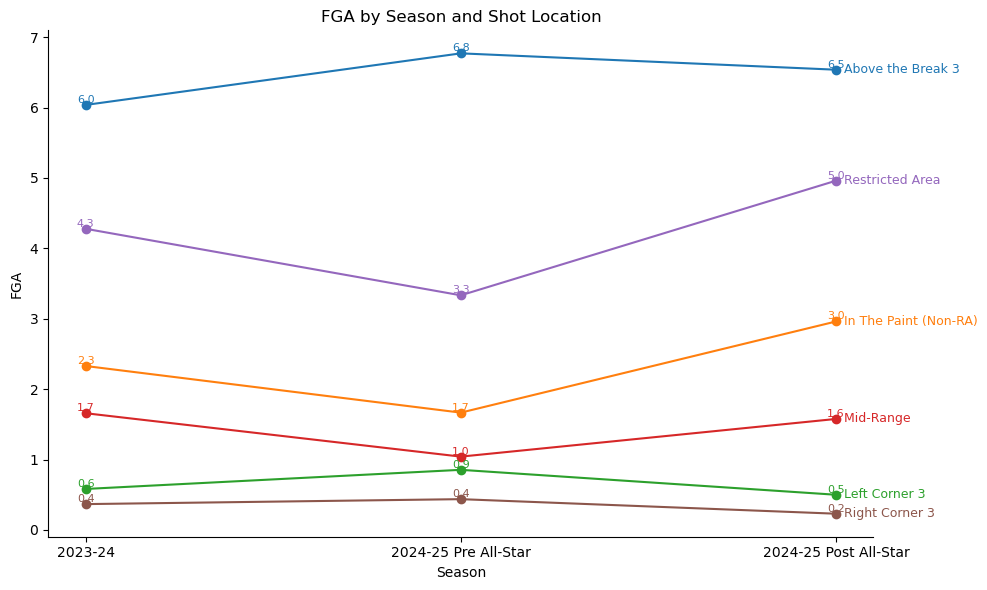

In [534]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each line manually to add labels
for column in shot_summary_FGA.columns:
    color = shot_area_colors.get(column, 'black')
    line, = ax.plot(shot_summary_FGA.index, shot_summary_FGA[column], marker='o', label=column)
    
    # Add a label to each marker (with matching color)
    for x, y in zip(shot_summary_FGA.index, shot_summary_FGA[column]):
        ax.text(x, y, f'{y:.1f}', color=line.get_color(), ha='center', va='bottom', fontsize=8)
    
    # Add shot location label to the end of the line graph
    last_x = shot_summary_FGA.index[-1]
    last_y = shot_summary_FGA[column].iloc[-1]
    ax.text(last_x, last_y, f'  {column}', va='center', fontsize=9, color=line.get_color())

# Remove gridlines
ax.grid(False)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optional: Keep only x and y axis lines
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Labels
ax.set_title('FGA by Season and Shot Location')
ax.set_xlabel('Season')
ax.set_ylabel('FGA')
plt.tight_layout()

plt.show()

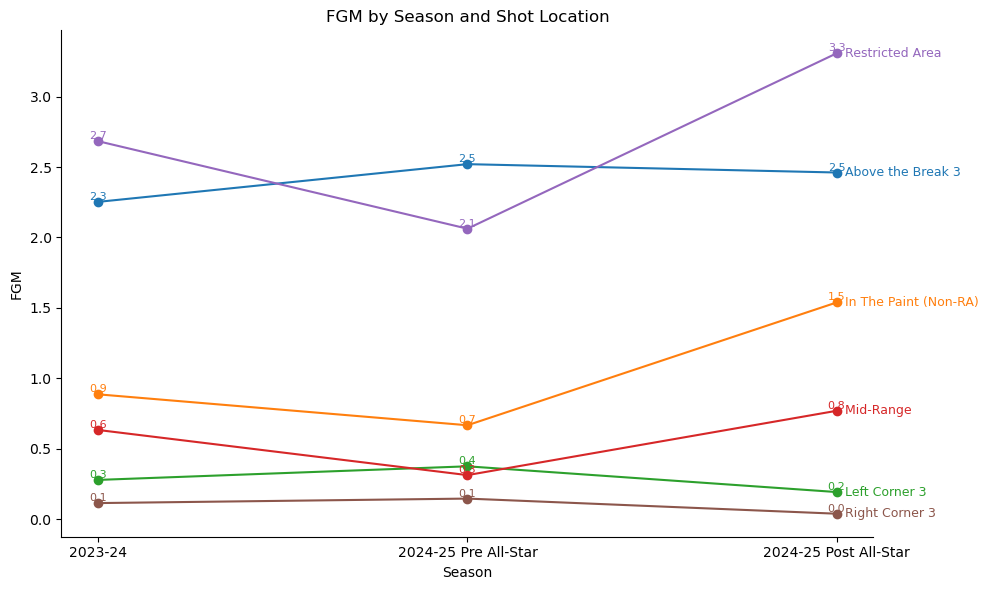

In [536]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each line manually to add labels
for column in shot_summary_FGM.columns:
    color = shot_area_colors.get(column, 'black')
    line, = ax.plot(shot_summary_FGM.index, shot_summary_FGM[column], marker='o', label=column)
    
    # Add a label to each marker (with matching color)
    for x, y in zip(shot_summary_FGM.index, shot_summary_FGM[column]):
        ax.text(x, y, f'{y:.1f}', color=line.get_color(), ha='center', va='bottom', fontsize=8)
    
    # Add shot location label to the end of the line graph
    last_x = shot_summary_FGM.index[-1]
    last_y = shot_summary_FGM[column].iloc[-1]
    ax.text(last_x, last_y, f'  {column}', va='center', fontsize=9, color=line.get_color())

# Remove gridlines
ax.grid(False)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optional: Keep only x and y axis lines
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Labels
ax.set_title('FGM by Season and Shot Location')
ax.set_xlabel('Season')
ax.set_ylabel('FGM')
plt.tight_layout()

plt.show()

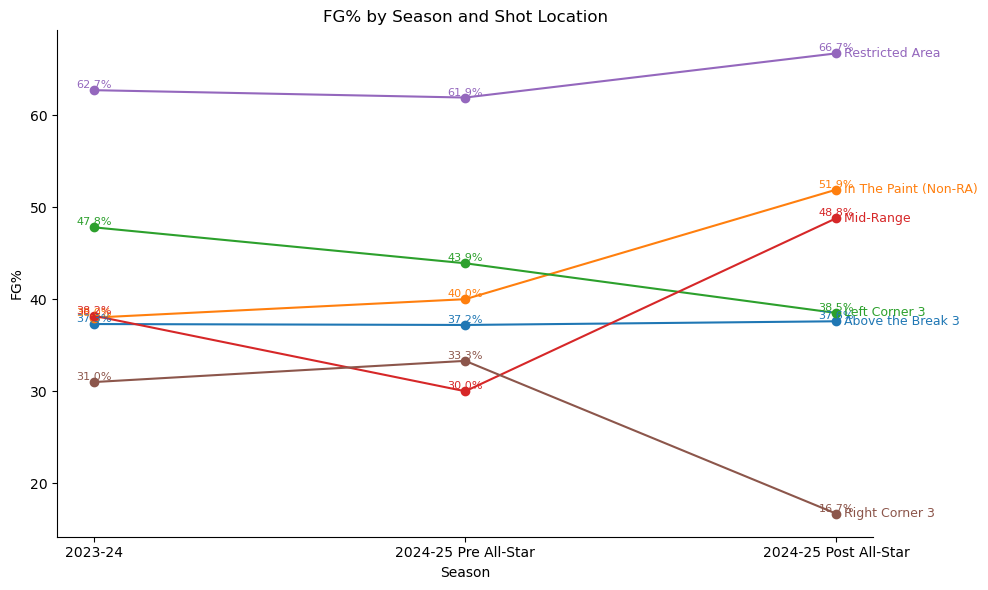

In [538]:
shot_summary_FG_PCT = shot_summary_FG_PCT * 100

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each line manually to add labels
for column in shot_summary_FG_PCT.columns:
    color = shot_area_colors.get(column, 'black')
    line, = ax.plot(shot_summary_FG_PCT.index, shot_summary_FG_PCT[column], marker='o', label=column)
    
    # Add a label to each marker (with matching color)
    for x, y in zip(shot_summary_FG_PCT.index, shot_summary_FG_PCT[column]):
        ax.text(x, y, f'{y:.1f}%', color=line.get_color(), ha='center', va='bottom', fontsize=8)
    
    # Add shot location label to the end of the line graph
    last_x = shot_summary_FG_PCT.index[-1]
    last_y = shot_summary_FG_PCT[column].iloc[-1]
    ax.text(last_x, last_y, f'  {column}', va='center', fontsize=9, color=line.get_color())
    
# Remove gridlines
ax.grid(False)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optional: Keep only x and y axis lines
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Labels
ax.set_title('FG% by Season and Shot Location')
ax.set_xlabel('Season')
ax.set_ylabel('FG%')
plt.tight_layout()

plt.show()

#### Horizontal bar chart with percentile ranks for each location

##### *Adjust tables for plotting into bar charts*

In [540]:
shot_summary_FGA_percentiles = shot_summary.pivot(index='Season', columns='GROUP_VALUE', values='FGA_percentile')
shot_summary_FGA_percentiles = shot_summary_FGA_percentiles.reindex([
    '2023-24',
    '2024-25 Pre All-Star',
    '2024-25 Post All-Star'
])
shot_summary_FGA_percentiles

GROUP_VALUE,Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
Season,,,,,,
2023-24,98.321465,83.757206,53.136656,77.534758,94.099695,42.115972
2024-25 Pre All-Star,99.117563,80.956447,66.609735,71.505835,91.830344,49.074865
2024-25 Post All-Star,98.900446,88.915305,49.583952,76.760773,96.508172,33.937593


In [542]:
# Reset index to long format
FGA_percentiles_long = shot_summary_FGA_percentiles.reset_index().melt(id_vars='Season', var_name='Shot Location', value_name='FGA_percentile')
FGA_long = shot_summary_FGA.reset_index().melt(id_vars='Season', var_name='Shot Location', value_name='FGA')

# Merge them
shot_summary_FGA_and_percentiles = pd.merge(FGA_percentiles_long, FGA_long, on=['Season', 'Shot Location'])
shot_summary_FGA_and_percentiles['FGA'] = shot_summary_FGA_and_percentiles['FGA'].astype(float).round(1)
shot_summary_FGA_and_percentiles_24_25 = shot_summary_FGA_and_percentiles[
    shot_summary_FGA_and_percentiles['Season'].isin(['2024-25 Pre All-Star', '2024-25 Post All-Star'])
]
shot_summary_FGA_and_percentiles_24_25

,Season,Shot Location,FGA_percentile,FGA
1,2024-25 Pre All-Star,Above the Break 3,99.117563,6.8
2,2024-25 Post All-Star,Above the Break 3,98.900446,6.5
4,2024-25 Pre All-Star,In The Paint (Non-RA),80.956447,1.7
5,2024-25 Post All-Star,In The Paint (Non-RA),88.915305,3.0
7,2024-25 Pre All-Star,Left Corner 3,66.609735,0.9
8,2024-25 Post All-Star,Left Corner 3,49.583952,0.5
10,2024-25 Pre All-Star,Mid-Range,71.505835,1.0
11,2024-25 Post All-Star,Mid-Range,76.760773,1.6
13,2024-25 Pre All-Star,Restricted Area,91.830344,3.3
14,2024-25 Post All-Star,Restricted Area,96.508172,5.0


In [544]:
# Post All-Star table
shot_summary_FGA_and_percentiles_24_25_2H = shot_summary_FGA_and_percentiles[shot_summary_FGA_and_percentiles['Season'] == '2024-25 Post All-Star']
shot_summary_FGA_and_percentiles_24_25_2H

,Season,Shot Location,FGA_percentile,FGA
2,2024-25 Post All-Star,Above the Break 3,98.900446,6.5
5,2024-25 Post All-Star,In The Paint (Non-RA),88.915305,3.0
8,2024-25 Post All-Star,Left Corner 3,49.583952,0.5
11,2024-25 Post All-Star,Mid-Range,76.760773,1.6
14,2024-25 Post All-Star,Restricted Area,96.508172,5.0
17,2024-25 Post All-Star,Right Corner 3,33.937593,0.2


In [546]:
shot_summary_FGM_percentiles = shot_summary.pivot(index='Season', columns='GROUP_VALUE', values='FGM_percentile')
shot_summary_FGM_percentiles = shot_summary_FGM_percentiles.reindex([
    '2023-24',
    '2024-25 Pre All-Star',
    '2024-25 Post All-Star'
])
shot_summary_FGM_percentiles

GROUP_VALUE,Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
Season,,,,,,
2023-24,95.184808,80.061038,57.578840,74.720244,96.914208,39.437097
2024-25 Pre All-Star,97.011102,78.252206,68.232280,64.076288,95.018503,47.736977
2024-25 Post All-Star,96.523031,90.208024,50.074294,77.622585,98.365527,32.124814


In [548]:
# Reset index to long format
FGM_percentiles_long = shot_summary_FGM_percentiles.reset_index().melt(id_vars='Season', var_name='Shot Location', value_name='FGM_percentile')
FGM_long = shot_summary_FGM.reset_index().melt(id_vars='Season', var_name='Shot Location', value_name='FGM')

# Merge them
shot_summary_FGM_and_percentiles = pd.merge(FGM_percentiles_long, FGM_long, on=['Season', 'Shot Location'])
shot_summary_FGM_and_percentiles['FGM'] = shot_summary_FGM_and_percentiles['FGM'].astype(float).round(1)
shot_summary_FGM_and_percentiles_24_25 = shot_summary_FGM_and_percentiles[
    shot_summary_FGM_and_percentiles['Season'].isin(['2024-25 Pre All-Star', '2024-25 Post All-Star'])
]
shot_summary_FGM_and_percentiles_24_25

,Season,Shot Location,FGM_percentile,FGM
1,2024-25 Pre All-Star,Above the Break 3,97.011102,2.5
2,2024-25 Post All-Star,Above the Break 3,96.523031,2.5
4,2024-25 Pre All-Star,In The Paint (Non-RA),78.252206,0.7
5,2024-25 Post All-Star,In The Paint (Non-RA),90.208024,1.5
7,2024-25 Pre All-Star,Left Corner 3,68.232280,0.4
8,2024-25 Post All-Star,Left Corner 3,50.074294,0.2
10,2024-25 Pre All-Star,Mid-Range,64.076288,0.3
11,2024-25 Post All-Star,Mid-Range,77.622585,0.8
13,2024-25 Pre All-Star,Restricted Area,95.018503,2.1
14,2024-25 Post All-Star,Restricted Area,98.365527,3.3


In [550]:
shot_summary_FG_PCT_percentiles = shot_summary.pivot(index='Season', columns='GROUP_VALUE', values='FG_PCT_percentile')
shot_summary_FG_PCT_percentiles = shot_summary_FG_PCT_percentiles.reindex([
    '2023-24',
    '2024-25 Pre All-Star',
    '2024-25 Post All-Star'
])
shot_summary_FG_PCT_percentiles

GROUP_VALUE,Above the Break 3,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
Season,,,,,,
2023-24,50.796880,53.034927,74.109868,53.713123,88.674127,37.351645
2024-25 Pre All-Star,54.711073,61.400512,68.132650,41.744947,87.660120,46.982636
2024-25 Post All-Star,55.007429,76.463596,56.092125,69.866270,88.231798,33.714710


In [552]:
# Reset index to long format
FG_PCT_percentiles_long = shot_summary_FG_PCT_percentiles.reset_index().melt(id_vars='Season', var_name='Shot Location', value_name='FG_PCT_percentile')
FG_PCT_long = shot_summary_FG_PCT.reset_index().melt(id_vars='Season', var_name='Shot Location', value_name='FG_PCT')

# Merge them
shot_summary_FG_PCT_and_percentiles = pd.merge(FG_PCT_percentiles_long, FG_PCT_long, on=['Season', 'Shot Location'])
shot_summary_FG_PCT_and_percentiles['FG_PCT'] = shot_summary_FG_PCT_and_percentiles['FG_PCT'].astype(float)
shot_summary_FG_PCT_and_percentiles_24_25 = shot_summary_FG_PCT_and_percentiles[
    shot_summary_FG_PCT_and_percentiles['Season'].isin(['2024-25 Pre All-Star', '2024-25 Post All-Star'])
]
shot_summary_FG_PCT_and_percentiles_24_25

,Season,Shot Location,FG_PCT_percentile,FG_PCT
1,2024-25 Pre All-Star,Above the Break 3,54.711073,37.2
2,2024-25 Post All-Star,Above the Break 3,55.007429,37.6
4,2024-25 Pre All-Star,In The Paint (Non-RA),61.400512,40.0
5,2024-25 Post All-Star,In The Paint (Non-RA),76.463596,51.9
7,2024-25 Pre All-Star,Left Corner 3,68.132650,43.9
8,2024-25 Post All-Star,Left Corner 3,56.092125,38.5
10,2024-25 Pre All-Star,Mid-Range,41.744947,30.0
11,2024-25 Post All-Star,Mid-Range,69.866270,48.8
13,2024-25 Pre All-Star,Restricted Area,87.660120,61.9
14,2024-25 Post All-Star,Restricted Area,88.231798,66.7


##### *Create separate bar charts for each season*

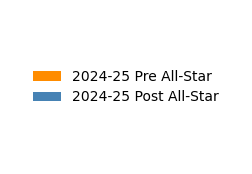

In [588]:
# Create legend
legend_handles = [
    Patch(facecolor='darkorange', label='2024-25 Pre All-Star'),
    Patch(facecolor='steelblue', label='2024-25 Post All-Star')
]

fig_legend = plt.figure(figsize=(3, 2))
fig_legend.legend(handles=legend_handles, loc='center', frameon=False)
plt.axis('off')  # Hide axes
plt.show()

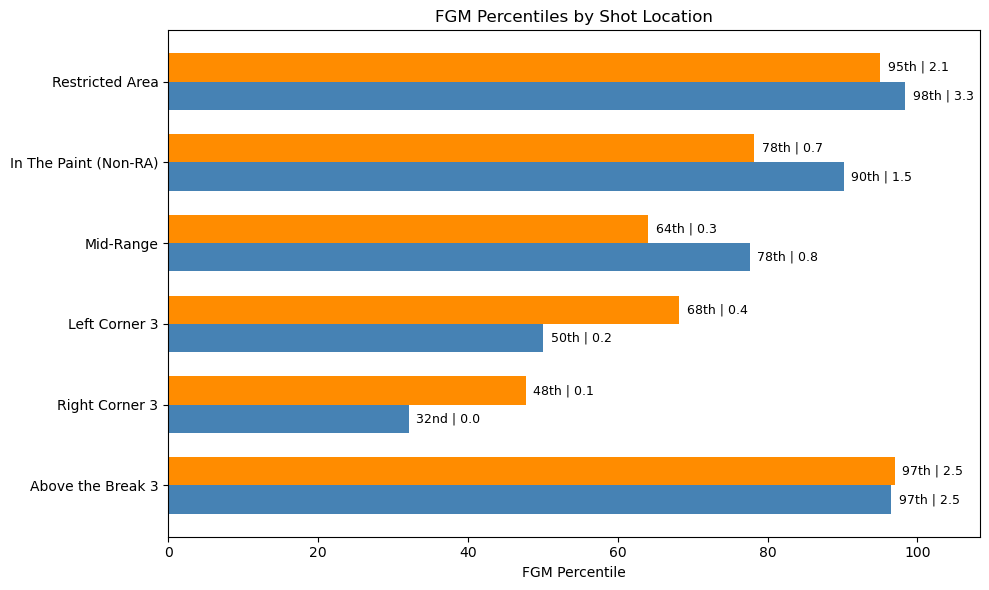

In [590]:
# Set up values in bar charts
category_col = 'Shot Location'
value_col = 'FGM_percentile'
extra_label_col = 'FGM' 
shot_order = ['Above the Break 3', 'Right Corner 3', 'Left Corner 3', 'Mid-Range', 'In The Paint (Non-RA)', 'Restricted Area']

# Re-sort order of shot locations
shot_summary_FGM_and_percentiles_24_25 = shot_summary_FGM_and_percentiles_24_25.copy()
shot_summary_FGM_and_percentiles_24_25[category_col] = pd.Categorical(
    shot_summary_FGM_and_percentiles_24_25[category_col], categories=shot_order, ordered=True
)

# Separate values and percentiles
pivoted_percentiles = shot_summary_FGM_and_percentiles_24_25.pivot(index=category_col, columns='Season', values=value_col)
pivoted_extra = shot_summary_FGM_and_percentiles_24_25.pivot(index=category_col, columns='Season', values=extra_label_col)

# Set up data for bar chart
categories = pivoted_percentiles.index
seasons = pivoted_percentiles.columns
bar_height = 0.35
y = np.arange(len(categories))

# Set up format for bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['steelblue', 'darkorange']

# Plot bars for each season
for i, season in enumerate(seasons):
    offsets = y - bar_height/2 + i * bar_height
    bars = ax.barh(offsets, pivoted_percentiles[season], height=bar_height, label=season, color=colors[i])
    
    # Add labels with percentile suffix
    for j, (val, extra) in enumerate(zip(pivoted_percentiles[season], pivoted_extra[season])):
        label = f"{ordinal(round(val))} | {extra:.1f}"
        ax.text(val + 1, offsets[j], label, va='center', fontsize=9)

# Add title and axis labels
ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.set_xlabel('FGM Percentile')
ax.set_title('FGM Percentiles by Shot Location')

# Adjust figure size
max_val = pivoted_percentiles.max().max()
ax.set_xlim(0, max_val + 10)  # Add 10 as buffer
plt.tight_layout()
plt.show()

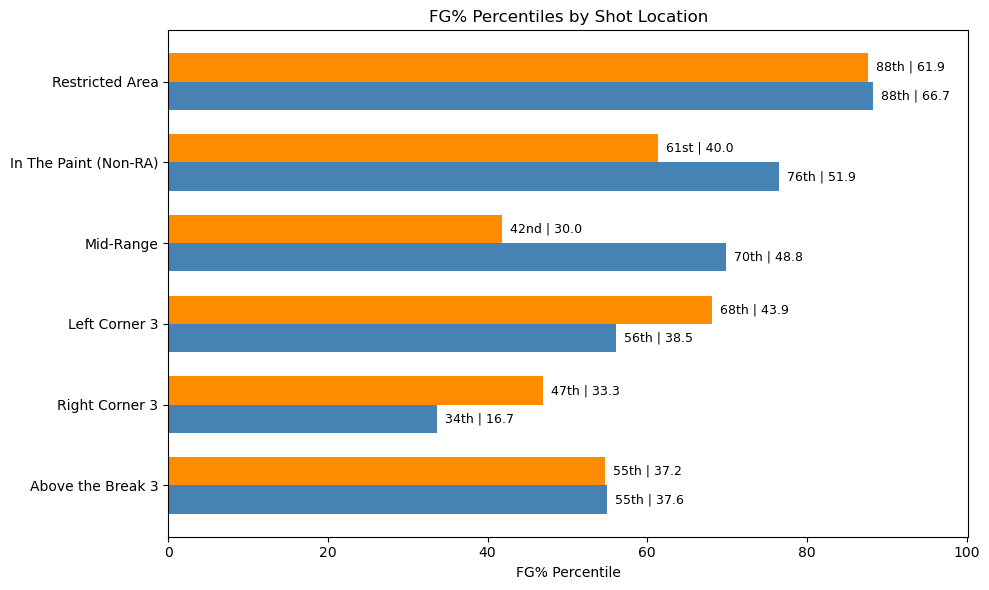

In [592]:
# Set up values in bar charts
category_col = 'Shot Location'
value_col = 'FG_PCT_percentile'
extra_label_col = 'FG_PCT' 
shot_order = ['Above the Break 3', 'Right Corner 3', 'Left Corner 3', 'Mid-Range', 'In The Paint (Non-RA)', 'Restricted Area']

# Re-sort order of shot locations
shot_summary_FG_PCT_and_percentiles_24_25 = shot_summary_FG_PCT_and_percentiles_24_25.copy()
shot_summary_FG_PCT_and_percentiles_24_25[category_col] = pd.Categorical(
    shot_summary_FG_PCT_and_percentiles_24_25[category_col], categories=shot_order, ordered=True
)

# Separate values and percentiles
pivoted_percentiles = shot_summary_FG_PCT_and_percentiles_24_25.pivot(index=category_col, columns='Season', values=value_col)
pivoted_extra = shot_summary_FG_PCT_and_percentiles_24_25.pivot(index=category_col, columns='Season', values=extra_label_col)

# Set up data for bar chart
categories = pivoted_percentiles.index
seasons = pivoted_percentiles.columns
bar_height = 0.35
y = np.arange(len(categories))

# Set up format for bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['steelblue', 'darkorange']

# Plot bars for each season
for i, season in enumerate(seasons):
    offsets = y - bar_height/2 + i * bar_height
    bars = ax.barh(offsets, pivoted_percentiles[season], height=bar_height, label=season, color=colors[i])
    
    # Add labels with percentile suffix
    for j, (val, extra) in enumerate(zip(pivoted_percentiles[season], pivoted_extra[season])):
        label = f"{ordinal(round(val))} | {extra:.1f}"
        ax.text(val + 1, offsets[j], label, va='center', fontsize=9)

# Add title and axis labels
ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.set_xlabel('FG% Percentile')
ax.set_title('FG% Percentiles by Shot Location')

# Adjust figure size
max_val = pivoted_percentiles.max().max()
ax.set_xlim(0, max_val + 12)  # Add 10 as buffer
plt.tight_layout()
plt.show()

##### *Create bar chart for post all-star*

In [556]:
# Add suffix to percentiles
def ordinal(n):
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

In [558]:
# Set up values in bar charts
category_col = 'Shot Location'
shot_order = ['Above the Break 3', 'Right Corner 3', 'Left Corner 3', 'Mid-Range', 'In The Paint (Non-RA)', 'Restricted Area']

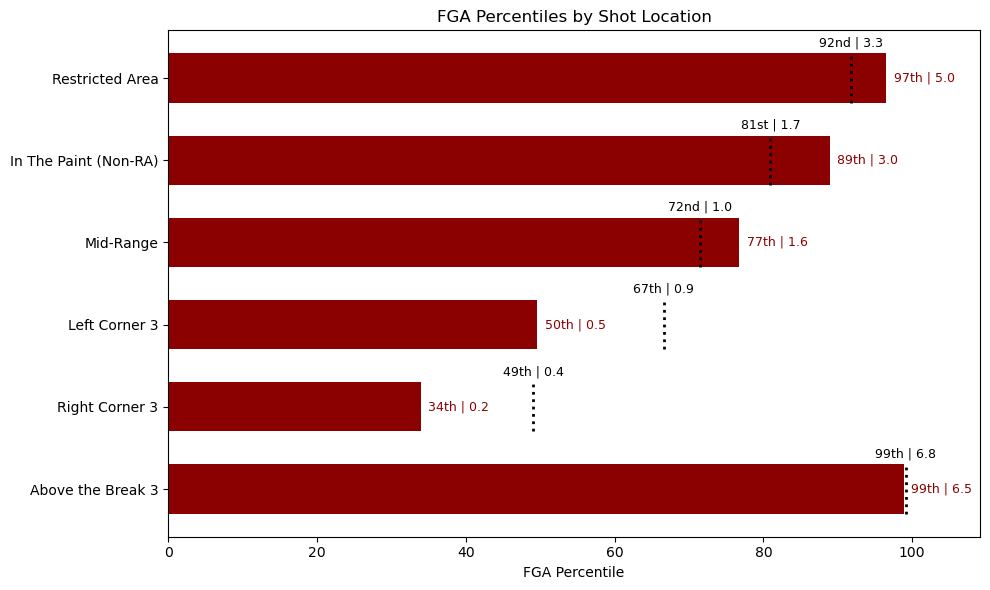

In [560]:
# Re-sort order of shot locations
shot_summary_FGA_and_percentiles_24_25 = shot_summary_FGA_and_percentiles_24_25.copy()
shot_summary_FGA_and_percentiles_24_25[category_col] = pd.Categorical(
    shot_summary_FGA_and_percentiles_24_25[category_col], categories=shot_order, ordered=True
)

# Pivot tables
fga_percentiles = shot_summary_FGA_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FGA_percentile')
fga_values = shot_summary_FGA_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FGA')

bar_values = fga_percentiles['2024-25 Post All-Star']
line_values = fga_percentiles['2024-25 Pre All-Star']
bar_labels = fga_values['2024-25 Post All-Star']
line_labels = fga_values['2024-25 Pre All-Star']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(bar_values))

# Plot bars (post All-Star)
bars = ax.barh(y, bar_values, color='darkred', height=0.6, label='2024-25 Post All-Star')

# Plot refrence lines (pre All-Star)
ax.vlines(line_values, y - 0.3, y + 0.3, color='black', linestyle='dotted', linewidth=2, label='2024-25 Pre All-Star')

# Add Labels for bars (percentile + value)
for i, (val, fga) in enumerate(zip(bar_values, bar_labels)):
    label = f"{(ordinal(round(val)))} | {round(fga, 1)}"
    ax.text(val + 1, y[i], label, va='center', fontsize=9, color='darkred')

# Add labels for reference line
for i, (val, fga) in enumerate(zip(line_values, line_labels)):
    label = f"{(ordinal(round(val)))} | {round(fga, 1)}"
    ax.text(val, y[i] + 0.35, label, va='bottom', ha='center', fontsize=9, color='black')

# Axes and styling
ax.set_yticks(y)
ax.set_yticklabels(bar_values.index)
ax.set_xlabel('FGA Percentile')
ax.set_title('FGA Percentiles by Shot Location')

# Adjust figure size
max_val = shot_summary_FGA_and_percentiles_24_25['FGA_percentile'].max()
ax.set_xlim(0, max_val + 10)

plt.tight_layout()
plt.show()

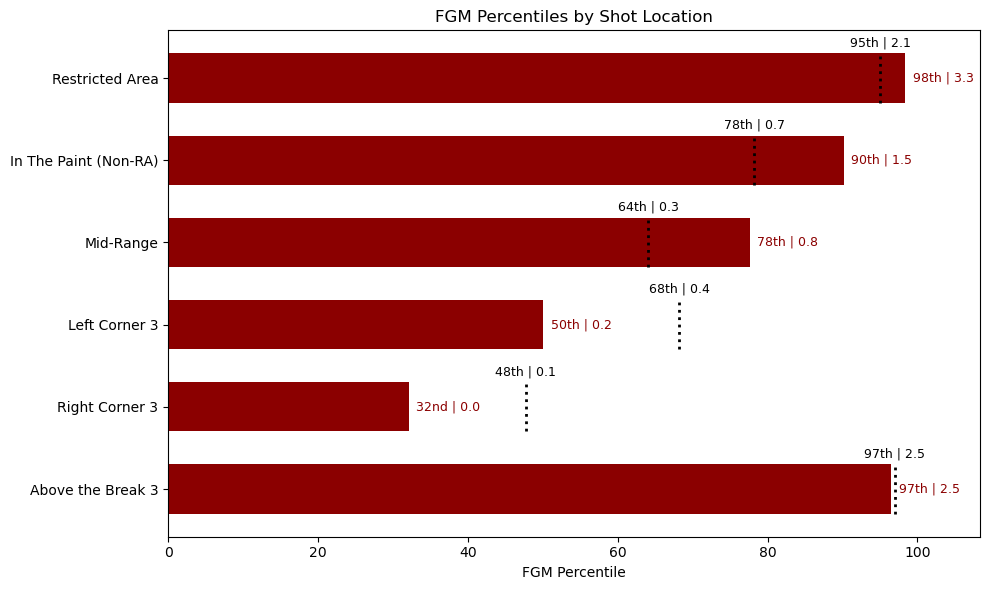

In [562]:
# Re-sort order of shot locations
shot_order = ['Above the Break 3', 'Right Corner 3', 'Left Corner 3', 'Mid-Range', 'In The Paint (Non-RA)', 'Restricted Area']
shot_summary_FGM_and_percentiles_24_25 = shot_summary_FGM_and_percentiles_24_25.copy()
shot_summary_FGM_and_percentiles_24_25[category_col] = pd.Categorical(
    shot_summary_FGM_and_percentiles_24_25[category_col], categories=shot_order, ordered=True
)

# Pivot tables
fgm_percentiles = shot_summary_FGM_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FGM_percentile')
fgm_values = shot_summary_FGM_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FGM')

bar_values = fgm_percentiles['2024-25 Post All-Star']
line_values = fgm_percentiles['2024-25 Pre All-Star']
bar_labels = fgm_values['2024-25 Post All-Star']
line_labels = fgm_values['2024-25 Pre All-Star']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(bar_values))

# Plot bars (post All-Star)
bars = ax.barh(y, bar_values, color='darkred', height=0.6, label='2024-25 Post All-Star')

# Plot refrence lines (pre All-Star)
ax.vlines(line_values, y - 0.3, y + 0.3, color='black', linestyle='dotted', linewidth=2, label='2024-25 Pre All-Star')

# Add Labels for bars (percentile + value)
for i, (val, fgm) in enumerate(zip(bar_values, bar_labels)):
    label = f"{(ordinal(round(val)))} | {round(fgm, 1)}"
    ax.text(val + 1, y[i], label, va='center', fontsize=9, color='darkred')

# Add labels for reference line
for i, (val, fgm) in enumerate(zip(line_values, line_labels)):
    label = f"{(ordinal(round(val)))} | {round(fgm, 1)}"
    ax.text(val, y[i] + 0.35, label, va='bottom', ha='center', fontsize=9, color='black')

# Axes and styling
ax.set_yticks(y)
ax.set_yticklabels(bar_values.index)
ax.set_xlabel('FGM Percentile')
ax.set_title('FGM Percentiles by Shot Location')

# Adjust figure size
max_val = shot_summary_FGM_and_percentiles_24_25['FGM_percentile'].max()
ax.set_xlim(0, max_val + 10)

plt.tight_layout()
plt.show()

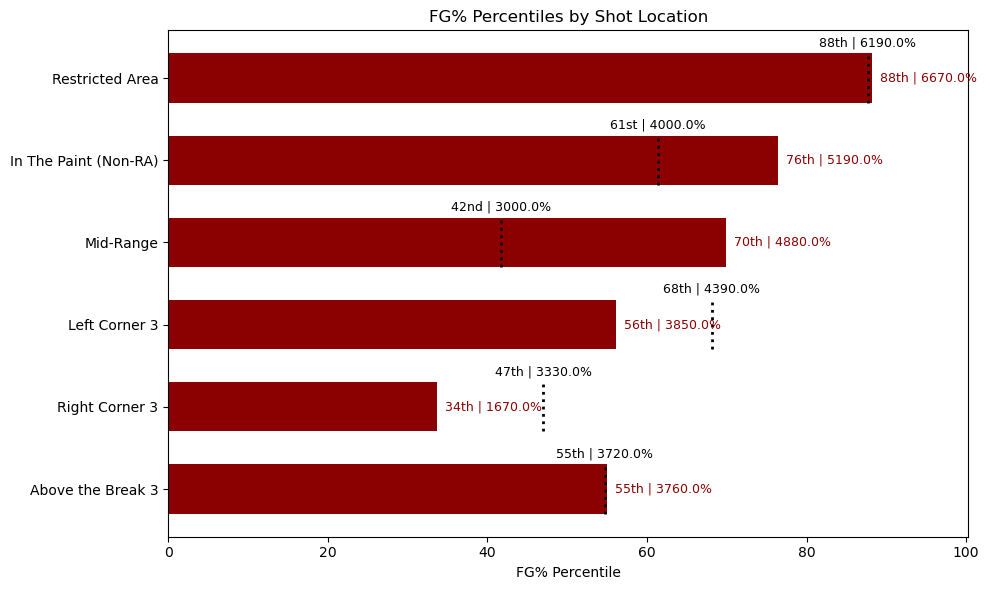

In [564]:
# Re-sort order of shot locations
shot_order = ['Above the Break 3', 'Right Corner 3', 'Left Corner 3', 'Mid-Range', 'In The Paint (Non-RA)', 'Restricted Area']
shot_summary_FG_PCT_and_percentiles_24_25 = shot_summary_FG_PCT_and_percentiles_24_25.copy()
shot_summary_FG_PCT_and_percentiles_24_25[category_col] = pd.Categorical(
    shot_summary_FG_PCT_and_percentiles_24_25[category_col], categories=shot_order, ordered=True
)

# Pivot tables
fg_pct_percentiles = shot_summary_FG_PCT_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FG_PCT_percentile')
fg_pct_values = shot_summary_FG_PCT_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FG_PCT')

bar_values = fg_pct_percentiles['2024-25 Post All-Star']
line_values = fg_pct_percentiles['2024-25 Pre All-Star']
bar_labels = fg_pct_values['2024-25 Post All-Star']
line_labels = fg_pct_values['2024-25 Pre All-Star']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(bar_values))

# Plot bars (post All-Star)
bars = ax.barh(y, bar_values, color='darkred', height=0.6, label='2024-25 Post All-Star')

# Plot refrence lines (pre All-Star)
ax.vlines(line_values, y - 0.3, y + 0.3, color='black', linestyle='dotted', linewidth=2, label='2024-25 Pre All-Star')

# Add Labels for bars (percentile + value)
for i, (val, fg_pct) in enumerate(zip(bar_values, bar_labels)):
    label = f"{(ordinal(round(val)))} | {fg_pct*100}%"
    ax.text(val + 1, y[i], label, va='center', fontsize=9, color='darkred')

# Add labels for reference line
for i, (val, fg_pct) in enumerate(zip(line_values, line_labels)):
    label = f"{(ordinal(round(val)))} | {round(fg_pct*100,1)}%"
    ax.text(val, y[i] + 0.35, label, va='bottom', ha='center', fontsize=9, color='black')

# Axes and styling
ax.set_yticks(y)
ax.set_yticklabels(bar_values.index)
ax.set_xlabel('FG% Percentile')
ax.set_title('FG% Percentiles by Shot Location')

# Adjust figure size
max_val = shot_summary_FG_PCT_and_percentiles_24_25['FG_PCT_percentile'].max()
ax.set_xlim(0, max_val + 12)

plt.tight_layout()
plt.show()

##### *Legend*

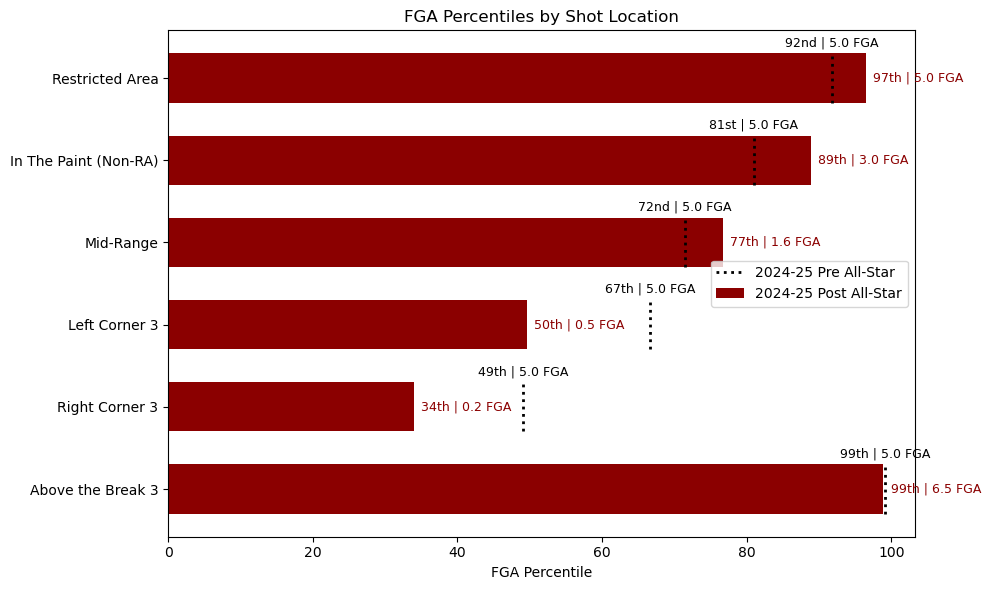

In [566]:
# Re-sort order of shot locations
shot_order = ['Above the Break 3', 'Right Corner 3', 'Left Corner 3', 'Mid-Range', 'In The Paint (Non-RA)', 'Restricted Area']
shot_summary_FG_PCT_and_percentiles_24_25 = shot_summary_FG_PCT_and_percentiles_24_25.copy()
shot_summary_FG_PCT_and_percentiles_24_25[category_col] = pd.Categorical(
    shot_summary_FG_PCT_and_percentiles_24_25[category_col], categories=shot_order, ordered=True
)

# Pivot tables
fga_percentiles = shot_summary_FGA_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FGA_percentile')
fga_values = shot_summary_FGA_and_percentiles_24_25.pivot(index='Shot Location', columns='Season', values='FGA')

bar_values = fga_percentiles['2024-25 Post All-Star']
line_values = fga_percentiles['2024-25 Pre All-Star']
fga_labels = fga_values['2024-25 Post All-Star']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(bar_values))

# Plot bars (post All-Star)
bars = ax.barh(y, bar_values, color='darkred', height=0.6, label='2024-25 Post All-Star')

# Plot refrence lines (pre All-Star)
ax.vlines(line_values, y - 0.3, y + 0.3, color='black', linestyle='dotted', linewidth=2, label='2024-25 Pre All-Star')

# Add Labels for bars (percentile + value)
for i, (val, fga) in enumerate(zip(bar_values, fga_labels)):
    label = f"{(ordinal(round(val)))} | {round(fga, 1)} FGA"
    ax.text(val + 1, y[i], label, va='center', fontsize=9, color='darkred')

# Add labels for reference line
for i, val in enumerate(line_values):
    label = f"{(ordinal(round(val)))} | {round(fga, 1)} FGA"
    ax.text(val, y[i] + 0.35, label, va='bottom', ha='center', fontsize=9, color='black')

# Axes and styling
ax.set_yticks(y)
ax.set_yticklabels(bar_values.index)
ax.set_xlabel('FGA Percentile')
ax.set_title('FGA Percentiles by Shot Location')
ax.set_xlim(0, max_val + 15)  # Add 10 as buffer
plt.tight_layout()
ax.legend(loc='center right')
plt.show()

##### *OLD bar chart (only FGA)*

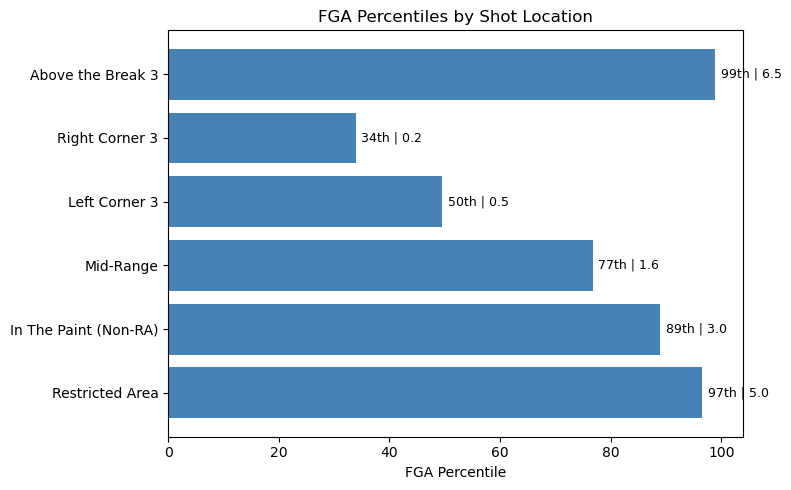

In [568]:
# Set up values in bar charts
category_col = 'Shot Location'
value_col = 'FGA_percentile'
extra_label_col = 'FGA' 
shot_order = ['Restricted Area', 'In The Paint (Non-RA)', 'Mid-Range','Left Corner 3', 'Right Corner 3', 'Above the Break 3']

# Re-sort order of shot locations
shot_summary_FGA_and_percentiles_24_25_2H = shot_summary_FGA_and_percentiles_24_25_2H.copy()
shot_summary_FGA_and_percentiles_24_25_2H[category_col] = pd.Categorical(
    shot_summary_FGA_and_percentiles_24_25_2H[category_col],
    categories=shot_order,
    ordered=True
)
plot_data = shot_summary_FGA_and_percentiles_24_25_2H.sort_values(by=category_col)

# Add suffix to percentiles
def ordinal(n):
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"
plot_data['Label'] = plot_data.apply(
    lambda row: f"{ordinal(round(row[value_col]))} | {row[extra_label_col]:.1f}",
    axis=1
)

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(plot_data[category_col], plot_data[value_col], color='steelblue')

# Add rounded value labels inside or at the end of bars
for bar, label in zip(bars, plot_data['Label']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            label, va='center', fontsize=9)

# Add titles and labels
ax.set_xlabel('FGA Percentile')
ax.set_title('FGA Percentiles by Shot Location')
plt.tight_layout()
plt.show()

#### Shot Charts

##### *Separate shot summary into 3 separate tables based on date range*

In [572]:
# Change format of stats (keep as floats)
shot_summary = Coby_White_shot_summary.copy()

shot_summary['FGA'] = shot_summary['FGA'].astype(float).round(1)
shot_summary['FGM'] = shot_summary['FGM'].astype(float).round(1)
shot_summary['FG_PCT'] = shot_summary['FG_PCT'].astype(float).round(1)

shot_summary

,Season,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,2024-25 2H,Restricted Area,98.692422,3.3,98.365527,5.0,96.508172,0.000000,34.205052,0.000000,...,0.651,91.158990,0.000,34.383358,0.000,45.052006,0.349,40.876672,0.651,90.653789
1,2024-25 1H,Restricted Area,99.459152,2.1,95.018503,3.3,91.830344,0.000000,33.333333,0.000000,...,0.586,89.937375,0.000,33.432963,0.000,43.879875,0.414,40.093937,0.586,89.311130
2,2023-24,Restricted Area,98.541879,2.7,96.914208,4.3,94.099695,0.000000,32.265175,0.000000,...,0.684,93.896236,0.000,32.316039,0.000,42.675483,0.316,30.722279,0.684,93.794507
0,2024-25 2H,In The Paint (Non-RA),99.242199,1.5,90.208024,3.0,88.915305,0.000000,34.205052,0.000000,...,0.750,94.725111,0.000,34.383358,0.000,45.052006,0.250,37.161961,0.750,94.368499
1,2024-25 1H,In The Paint (Non-RA),92.157700,0.7,78.252206,1.7,80.956447,0.000000,33.333333,0.000000,...,0.688,94.278395,0.000,33.432963,0.000,43.879875,0.313,35.482494,0.688,93.936806
2,2023-24,In The Paint (Non-RA),90.013564,0.9,80.061038,2.3,83.757206,0.000000,32.265175,0.000000,...,0.786,97.388945,0.000,32.316039,0.000,42.675483,0.214,27.161750,0.786,97.355036
0,2024-25 2H,Mid-Range,72.228826,0.8,77.622585,1.6,76.760773,0.000000,34.205052,0.000000,...,0.800,95.958395,0.000,34.383358,0.000,45.052006,0.200,35.898960,0.800,95.631501
1,2024-25 1H,Mid-Range,31.041845,0.3,64.076288,1.0,71.505835,0.000000,33.333333,0.000000,...,0.800,96.868773,0.000,33.432963,0.000,43.879875,0.200,32.735554,0.800,96.669513
2,2023-24,Mid-Range,64.632079,0.6,74.720244,1.7,77.534758,0.000000,32.265175,0.000000,...,0.720,95.150899,0.000,32.316039,0.000,42.675483,0.280,29.399797,0.720,95.116989
0,2024-25 2H,Left Corner 3,35.141159,0.2,50.074294,0.5,49.583952,0.192308,79.791976,0.500000,...,0.000,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082


In [574]:
shot_summary['FGA'].dtype

dtype('float64')

In [576]:
shot_summary_23_24_unedited = Coby_White_shot_summary[Coby_White_shot_summary['Season']=='2023-24']
shot_summary_23_24 = shot_summary_23_24_unedited.drop(columns=['Season']).reset_index(drop=True).iloc[:-1]
shot_summary_23_24

,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,FG3A_percentile,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,Restricted Area,98.541879,2.683544,96.914208,4.278481,94.099695,0.000000,32.265175,0.000000,27.636487,...,0.684,93.896236,0.000,32.316039,0.000,42.675483,0.316,30.722279,0.684,93.794507
1,In The Paint (Non-RA),90.013564,0.886076,80.061038,2.329114,83.757206,0.000000,32.265175,0.000000,27.636487,...,0.786,97.388945,0.000,32.316039,0.000,42.675483,0.214,27.161750,0.786,97.355036
2,Mid-Range,64.632079,0.632911,74.720244,1.658228,77.534758,0.000000,32.265175,0.000000,27.636487,...,0.720,95.150899,0.000,32.316039,0.000,42.675483,0.280,29.399797,0.720,95.116989
3,Left Corner 3,27.195660,0.278481,57.578840,0.582278,53.136656,0.278481,84.944049,0.582278,81.858257,...,0.000,32.027806,0.909,73.448627,0.091,91.081723,0.909,68.853849,0.091,55.662937
4,Right Corner 3,27.195660,0.113924,39.437097,0.367089,42.115972,0.113924,73.584266,0.367089,74.533740,...,0.000,32.027806,0.889,72.329603,0.111,92.200746,0.889,67.565276,0.111,56.951509
5,Above the Break 3,69.023398,2.253165,95.184808,6.037975,98.321465,2.253165,99.084435,6.037975,99.152255,...,0.000,32.027806,0.820,69.972872,0.180,94.557477,0.820,63.462191,0.180,61.054595


In [578]:
shot_summary_24_25_1H_unedited = Coby_White_shot_summary[Coby_White_shot_summary['Season']=='2024-25 1H']
shot_summary_24_25_1H = shot_summary_24_25_1H_unedited.drop(columns=['Season']).reset_index(drop=True).iloc[:-1]
shot_summary_24_25_1H

,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,FG3A_percentile,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,Restricted Area,99.459152,2.062500,95.018503,3.333333,91.830344,0.000000,33.333333,0.000000,28.835753,...,0.586,89.937375,0.000,33.432963,0.000,43.879875,0.414,40.093937,0.586,89.311130
1,In The Paint (Non-RA),92.157700,0.666667,78.252206,1.666667,80.956447,0.000000,33.333333,0.000000,28.835753,...,0.688,94.278395,0.000,33.432963,0.000,43.879875,0.313,35.482494,0.688,93.936806
2,Mid-Range,31.041845,0.312500,64.076288,1.041667,71.505835,0.000000,33.333333,0.000000,28.835753,...,0.800,96.868773,0.000,33.432963,0.000,43.879875,0.200,32.735554,0.800,96.669513
3,Left Corner 3,31.041845,0.375000,68.232280,0.854167,66.609735,0.375000,89.965841,0.854167,88.158269,...,0.000,33.731853,0.944,77.099345,0.056,89.567321,0.944,72.331341,0.056,57.073726
4,Right Corner 3,31.041845,0.145833,47.736977,0.437500,49.074865,0.145833,77.597495,0.437500,77.497865,...,0.000,33.731853,1.000,89.467691,0.000,43.879875,1.000,87.119271,0.000,27.597495
5,Above the Break 3,77.284372,2.520833,97.011102,6.770833,99.117563,2.520833,99.430686,6.770833,99.402220,...,0.000,33.731853,0.760,70.367208,0.240,96.299459,0.760,60.375747,0.240,69.029320


In [580]:
shot_summary_24_25_2H_unedited = Coby_White_shot_summary[Coby_White_shot_summary['Season']=='2024-25 2H']
shot_summary_24_25_2H = shot_summary_24_25_2H_unedited.drop(columns=['Season']).reset_index(drop=True).iloc[:-1]
shot_summary_24_25_2H

,GROUP_VALUE,BLKA_percentile,FGM,FGM_percentile,FGA,FGA_percentile,FG3M,FG3M_percentile,FG3A,FG3A_percentile,...,PCT_UAST_2PM,PCT_UAST_2PM_percentile,PCT_AST_3PM,PCT_AST_3PM_percentile,PCT_UAST_3PM,PCT_UAST_3PM_percentile,PCT_AST_FGM,PCT_AST_FGM_percentile,PCT_UAST_FGM,PCT_UAST_FGM_percentile
0,Restricted Area,98.692422,3.307692,98.365527,4.961538,96.508172,0.000000,34.205052,0.000000,30.208024,...,0.651,91.158990,0.000,34.383358,0.000,45.052006,0.349,40.876672,0.651,90.653789
1,In The Paint (Non-RA),99.242199,1.538462,90.208024,2.961538,88.915305,0.000000,34.205052,0.000000,30.208024,...,0.750,94.725111,0.000,34.383358,0.000,45.052006,0.250,37.161961,0.750,94.368499
2,Mid-Range,72.228826,0.769231,77.622585,1.576923,76.760773,0.000000,34.205052,0.000000,30.208024,...,0.800,95.958395,0.000,34.383358,0.000,45.052006,0.200,35.898960,0.800,95.631501
3,Left Corner 3,35.141159,0.192308,50.074294,0.500000,49.583952,0.192308,79.791976,0.500000,78.662704,...,0.000,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082
4,Right Corner 3,35.141159,0.038462,32.124814,0.230769,33.937593,0.038462,68.751857,0.230769,69.420505,...,0.000,34.413076,1.000,89.167905,0.000,45.052006,1.000,86.315007,0.000,29.465082
5,Above the Break 3,79.390788,2.461538,96.523031,6.538462,98.900446,2.461538,99.435364,6.538462,99.346211,...,0.000,34.413076,0.656,70.965825,0.344,97.444279,0.656,56.433878,0.344,75.096582


##### *Create shot charts*

<function matplotlib.pyplot.show(close=None, block=None)>

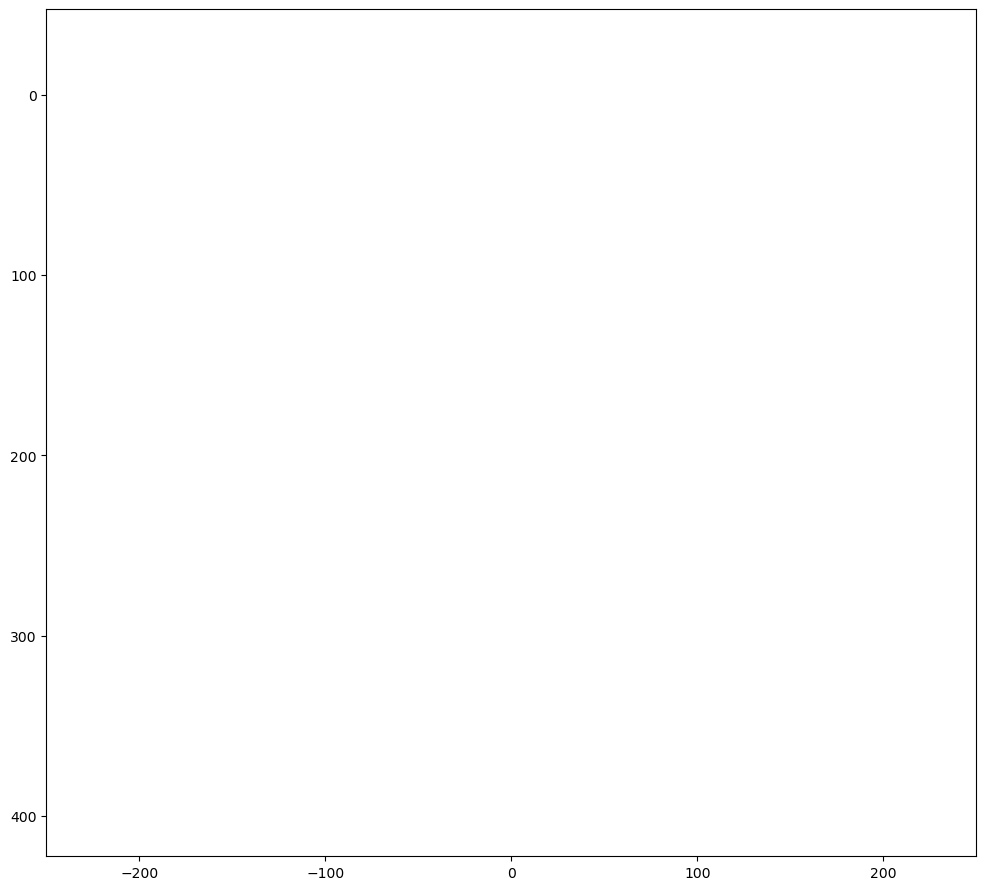

In [582]:
plt.figure(figsize = (12,11))
plt.xlim(-250,250)
plt.ylim(422.5,-47.5)
plt.show

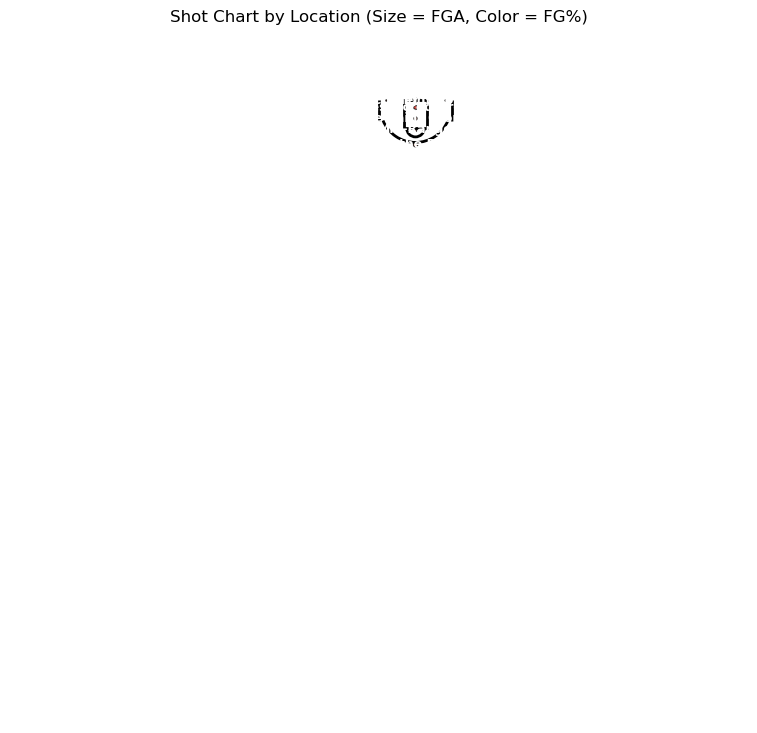

In [584]:
# Set up each shot location
shot_locations = {
    'Restricted Area': (25, 5),
    'In The Paint (Non-RA)': (25, 12),
    'Mid-Range': (25, 20),
    'Left Corner 3': (5, 0),
    'Right Corner 3': (45, 0),
    'Above the Break 3': (25, 30)
}

# Create foundation plot with NBA halfcourt
fig, ax = plt.subplots(figsize=(10, 9))
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)
ax.set_facecolor('white')
ax.set_aspect('equal')
ax.set_title('Shot Chart by Location (Size = FGA, Color = FG%)')

# Plot each shot location on court
for GROUP_VALUE, shot in shot_summary_24_25_2H.iterrows():
    x, y = shot_locations[shot['GROUP_VALUE']]
    FGA = shot['FGA']
    FG_pct = shot['FG_PCT']
    
    size = FGA * 1.5
    color = plt.cm.Reds(FG_pct)

    ax.scatter(x, y, s=size, color=color, edgecolors='black', alpha=0.8)
    ax.text(x, y, shot['GROUP_VALUE'], ha='center', va='center', fontsize=9, color='white', weight='bold')

# Draw the court outline (half-court)
from matplotlib.patches import Circle, Rectangle, Arc

# Hoop
hoop = Circle((25, 0), radius=0.75, linewidth=2, color='black', fill=False)
# Backboard
backboard = Rectangle((22, -1), 6, 0.1, linewidth=2, color='black')
# Paint
paint = Rectangle((17, 0), 16, 19, linewidth=2, color='black', fill=False)
# Free throw arc
free_throw = Arc((25, 19), 12, 12, theta1=0, theta2=180, linewidth=2, color='black')
# 3pt arc
three_arc = Arc((25, 5), 47.5, 47.5, theta1=22, theta2=158, linewidth=2, color='black')
# Corners
left_corner = Rectangle((0, 0), 0.1, 14, linewidth=2, color='black')
right_corner = Rectangle((50, 0), -0.1, 14, linewidth=2, color='black')

court_elements = [hoop, backboard, paint, free_throw, three_arc, left_corner, right_corner]
for elem in court_elements:
    ax.add_patch(elem)

plt.axis('off')
plt.show()